# import library

In [1]:
# 基本ライブラリ
import numpy as np
import pandas as pd
from pathlib import Path
from datetime import timedelta
from functools import reduce
from tqdm import tqdm
import seaborn as sns
import gc
import warnings
import datetime
from matplotlib import pyplot as plt
%matplotlib inline
import math
from pandas_profiling import ProfileReport
import os
from matplotlib_venn import venn2 


# 機械学習系
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
# import lightgbm as lgbm
import optuna.integration.lightgbm as lgbm
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor as rfr

# 設定
warnings.simplefilter('ignore')
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100

In [2]:
target_column = 'y'

# pandas_profile
reporting = False

# pair_plot
plotting_pair = False

# すべてのカテゴリ×すべての数値　箱ひげ
all_box_plotting = False

# カテゴリデータごとの相関係数
category_corr_coef = False

# read data

In [3]:
input_path = '../input/'
output_path = '../output/'

In [4]:
train = pd.read_csv(input_path + 'train.csv')
test = pd.read_csv(input_path + 'test.csv')

print(len(train.columns.tolist()))
print(len(test.columns.tolist()))

29
28


In [5]:
print(train.shape)
train.head()

(55583, 29)


,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y
0,0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,My place is meant for family and a few friends...,2016-07-27,t,f,NaN,2016-07-13,f,2016-07-27,33.788931,-118.154761,The Penthouse,NaN,1,Apartment,60.0,Private room,NaN,90804,138.0
1,1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,This is a new listing for a lovely guest bedro...,2016-09-12,t,t,100%,2015-12-30,f,2017-03-31,38.934810,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0
2,2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,We're looking forward to your stay at our apt....,2016-06-15,t,f,100%,2016-05-21,t,2017-08-13,40.695118,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN,65.0
3,3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,BEST CITY VIEWS - - ROOF DECK W/ BBQ & WiFi - ...,2014-03-15,t,t,100%,2012-06-19,t,2017-09-03,37.796728,-122.411906,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95.0,Private room,NaN,94133,166.0
4,4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,Charming Apartment on the upper west side of M...,2015-08-05,t,t,100%,2015-03-25,f,2017-09-10,40.785050,-73.974691,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,165.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55583 entries, 0 to 55582
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      55583 non-null  int64  
 1   accommodates            55583 non-null  int64  
 2   amenities               55583 non-null  object 
 3   bathrooms               55436 non-null  float64
 4   bed_type                55583 non-null  object 
 5   bedrooms                55512 non-null  float64
 6   beds                    55487 non-null  float64
 7   cancellation_policy     55583 non-null  object 
 8   city                    55583 non-null  object 
 9   cleaning_fee            55583 non-null  object 
 10  description             55583 non-null  object 
 11  first_review            43675 non-null  object 
 12  host_has_profile_pic    55435 non-null  object 
 13  host_identity_verified  55435 non-null  object 
 14  host_response_rate      41879 non-null

In [7]:
train.nunique()

id                        55583
accommodates                 16
amenities                 51031
bathrooms                    17
bed_type                      5
bedrooms                     11
beds                         18
cancellation_policy           5
city                          6
cleaning_fee                  2
description               55221
first_review               2446
host_has_profile_pic          2
host_identity_verified        2
host_response_rate           78
host_since                 3047
instant_bookable              2
last_review                1298
latitude                  55583
longitude                 55583
name                      55152
neighbourhood               607
number_of_reviews           351
property_type                34
review_scores_rating         53
room_type                     3
thumbnail_url             49431
zipcode                     737
y                           714
dtype: int64

In [8]:
train.isnull().sum()

id                            0
accommodates                  0
amenities                     0
bathrooms                   147
bed_type                      0
bedrooms                     71
beds                         96
cancellation_policy           0
city                          0
cleaning_fee                  0
description                   0
first_review              11908
host_has_profile_pic        148
host_identity_verified      148
host_response_rate        13704
host_since                  148
instant_bookable              0
last_review               11880
latitude                      0
longitude                     0
name                          0
neighbourhood              5160
number_of_reviews             0
property_type                 0
review_scores_rating      12556
room_type                     0
thumbnail_url              6145
zipcode                     716
y                             0
dtype: int64

In [9]:
if reporting:
    report = ProfileReport(train)
    report.to_file(os.path.join(output_path, 'train_report.html'))

# EDA

In [10]:
# 数値カラムとカテゴリーカラムを判定する
num_dtypes = [
    'int8', 'int16', 'int32', 'int64', 
    'uint8', 'uint16', 'uint32', 'uint64', 
    'float16', 'float32', 'float64'
]

complex_dtypes = [
    'complex64',
    'complex128'
]

num_columns = []
cate_columns = []

for column_name in train.columns:
    if train[column_name].dtypes in complex_dtypes:
        print('complex_columnの前処理を実施')
    elif train[column_name].dtypes in num_dtypes:
        num_columns.append(column_name)
    else:
        cate_columns.append(column_name)

print('num_columns')
print(num_columns)
print('------------------------------')
print('cate_columns')
print(cate_columns)

num_columns
['id', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating', 'y']
------------------------------
cate_columns
['amenities', 'bed_type', 'cancellation_policy', 'city', 'cleaning_fee', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'instant_bookable', 'last_review', 'name', 'neighbourhood', 'property_type', 'room_type', 'thumbnail_url', 'zipcode']


## describe

In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,55583.0,27791.000000,16045.574343,0.000000,13895.500000,27791.000000,41686.500000,55582.000000
accommodates,55583.0,3.152906,2.153001,1.000000,2.000000,2.000000,4.000000,16.000000
bathrooms,55436.0,1.236426,0.583074,0.000000,1.000000,1.000000,1.000000,8.000000
bedrooms,55512.0,1.265312,0.849319,0.000000,1.000000,1.000000,1.000000,10.000000
beds,55487.0,1.711770,1.257822,0.000000,1.000000,1.000000,2.000000,18.000000
latitude,55583.0,38.450812,3.080869,33.338905,34.128205,40.663312,40.746146,42.390437
longitude,55583.0,-92.342406,21.687844,-122.511500,-118.341876,-76.995602,-73.954703,-70.999166
number_of_reviews,55583.0,20.937283,37.951889,0.000000,1.000000,6.000000,23.000000,605.000000
review_scores_rating,43027.0,94.077928,7.802154,20.000000,92.000000,96.000000,100.000000,100.000000
y,55583.0,160.163647,168.087140,1.000000,74.000000,111.000000,185.000000,1999.000000


## ベン図によるtrain-testの偏り確認

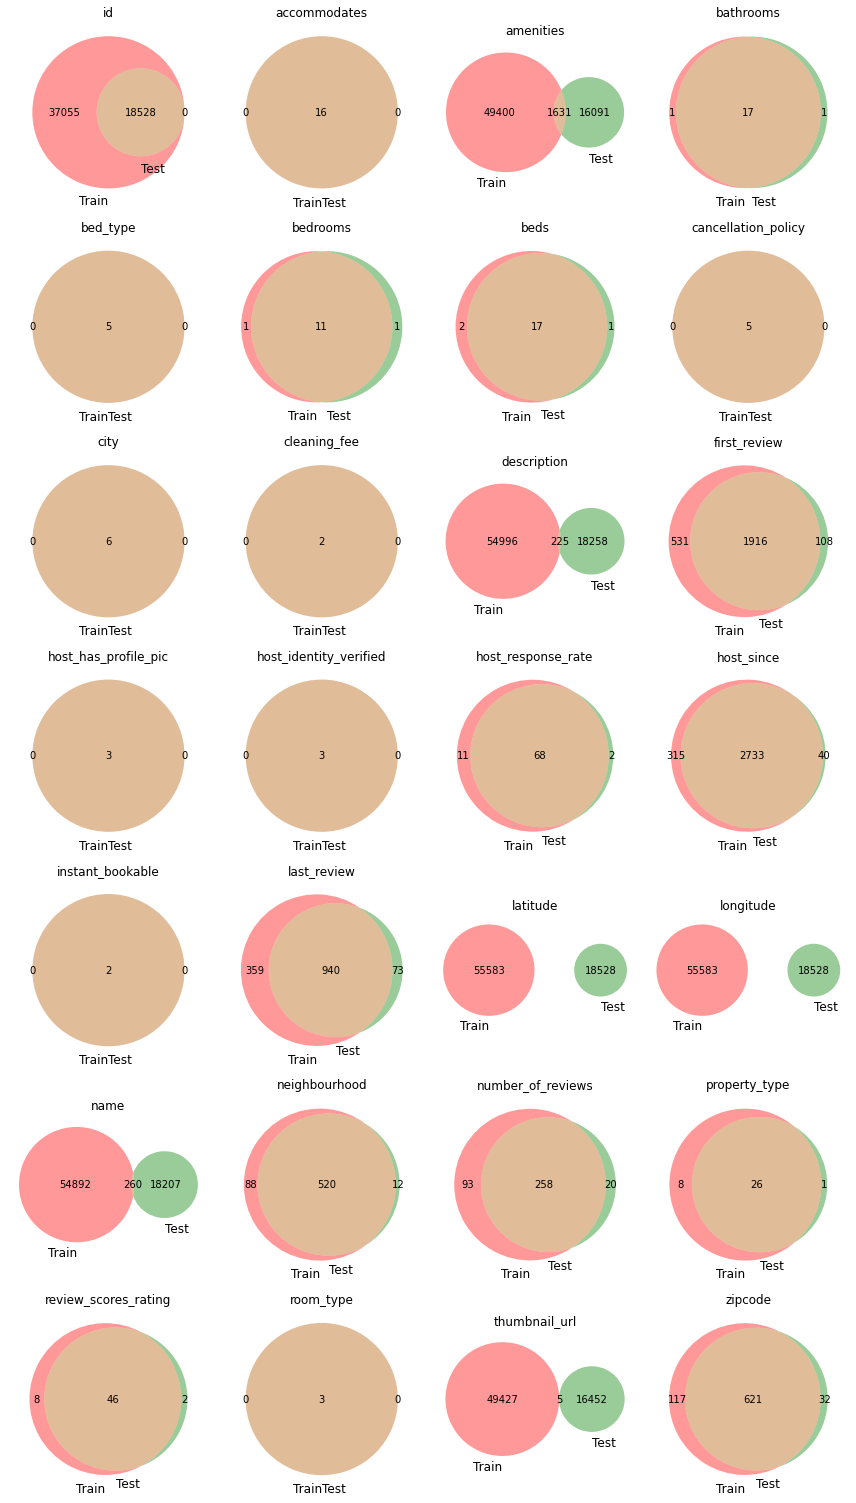

In [12]:
columns = test.columns
n_figs = len(columns)
n_cols = 4
n_rows = math.ceil(n_figs / n_cols)

fig, axes = plt.subplots(figsize=(n_cols * 3, n_rows * 3), ncols=n_cols, nrows=n_rows)

for c, ax in zip(columns, axes.ravel()):
    venn2(
        subsets=(set(train[c].unique()), set(test[c].unique())),
        set_labels=('Train', 'Test'),
        ax=ax
    )
    ax.set_title(c)

fig.tight_layout()

## 散布図確認 

In [13]:
if plotting_pair:
    sns.pairplot(train)

## ヒストグラム

In [14]:
# 数値データ用ヒストグラム
def num_vis(data):
    data.hist(figsize=(5, 4), color='darkblue', alpha=.7)
    mean = data.mean()
    median = data.median()
    ymax = pd.cut(data, 10).value_counts().max()
    plt.vlines(x=mean, ymin=0, ymax=ymax, colors='red', linestyles='--', lw=.7)# 平均値の直線追加
    plt.annotate('Mean: {}'.format(round(mean, 2)),xy=(mean, ymax), color='red')
    plt.vlines(x=median, ymin=0, ymax=ymax, colors='orange', linestyles='--', lw=.7)# 中央値の直線追加
    plt.annotate('Median: {}'.format(round(median, 2)),xy=(mean, ymax*0.8), color='orange')
    plt.title(data.name)
    plt.show()

# カテゴリデータ用カウントプロット
def cut_vis(data):
    t = data.value_counts()
    t.plot.bar(figsize=(5, 4), color='indianred', alpha=.7)
    for i in range(len(t)):
        plt.annotate(t[i], xy=(i, t[i]/2), ha='center')#haでannotatioinのテキストを中央寄せ
    plt.title(data.name)   
    plt.show()


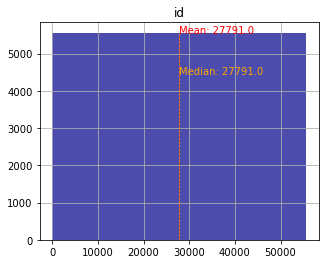

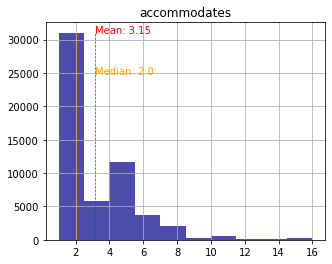

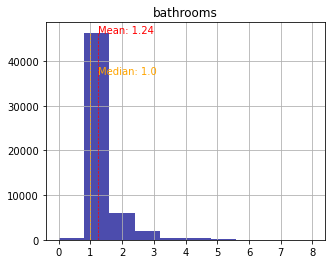

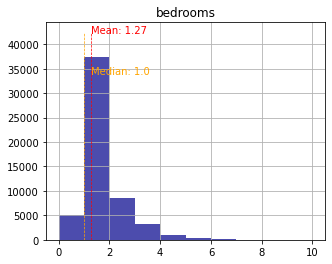

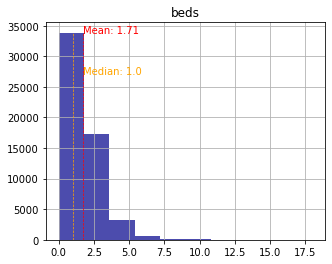

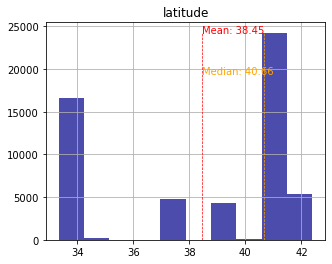

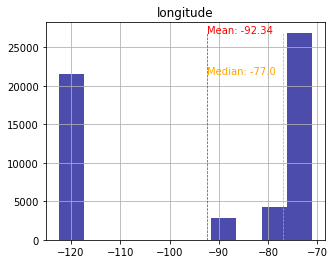

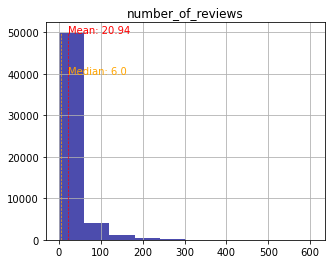

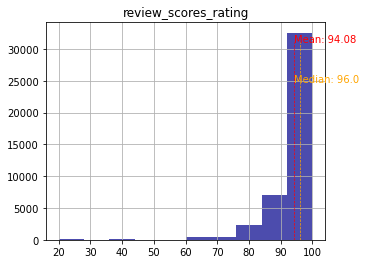

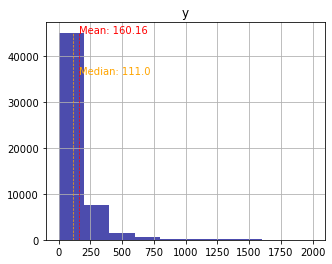

In [15]:
# 数値ヒストグラム
for column_name in num_columns:
    num_vis(train[column_name])

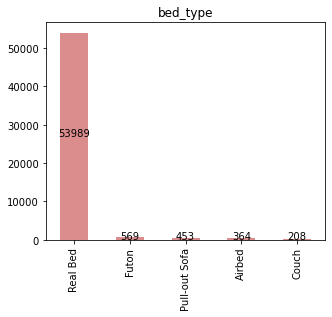

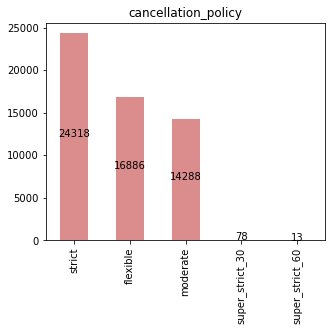

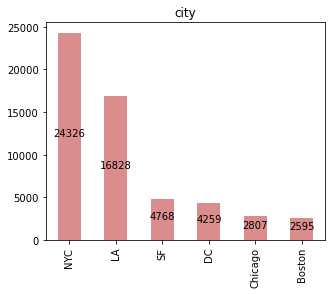

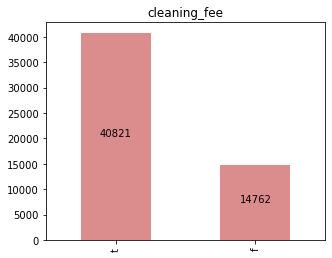

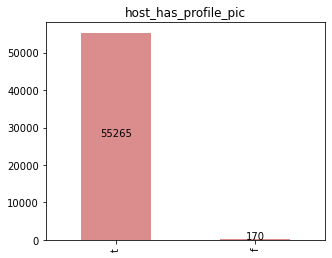

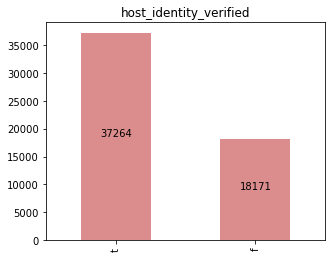

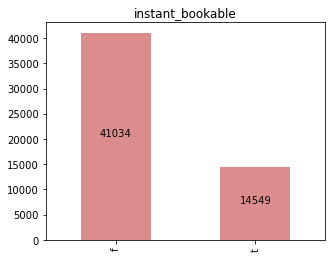

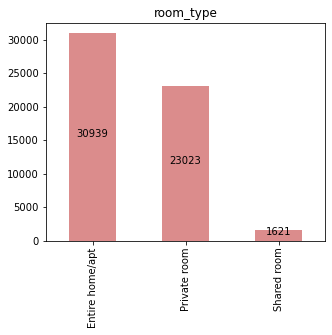

In [16]:
# カテゴリーカウントヒストグラム
for column_name in cate_columns:
    if train[column_name].nunique() < 10:
        cut_vis(train[column_name]) 

## 箱ひげ図

In [17]:
# すべてのカテゴリ×すべての数値データで箱ひげ
if all_box_plotting:

    for x in cate_columns:

        i = 1
        plt.subplots_adjust(wspace=0.2, hspace=0.4)
        plt.figure(figsize=(20, 20))
        vertical_num = math.ceil(len(num_columns)/3)        

        for y in num_columns:

            if train[x].nunique() < 10:

                try:
                    plt.subplot(vertical_num, 3, i)
                    sns.boxplot(data=train, x=x, y=y)
                    i += 1

                except:
                   pass


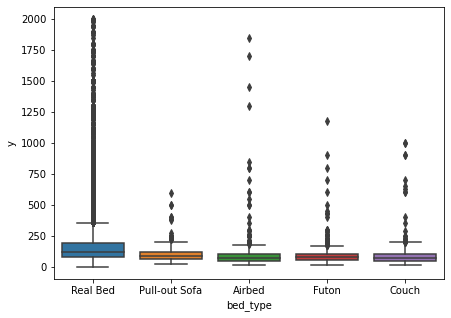

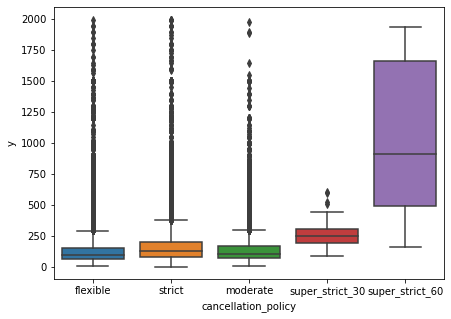

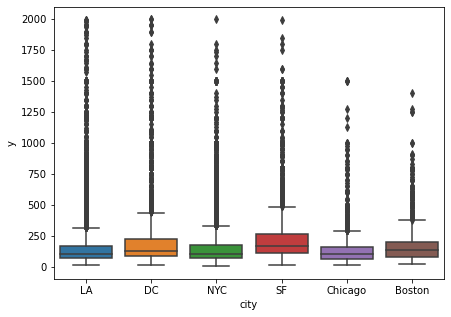

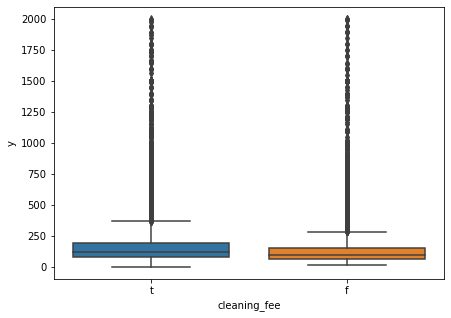

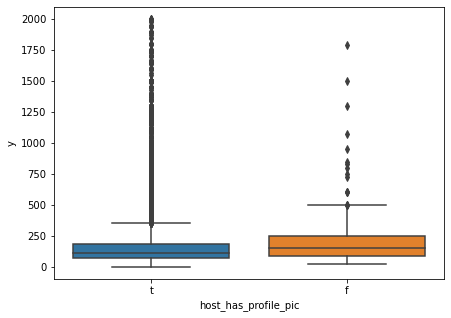

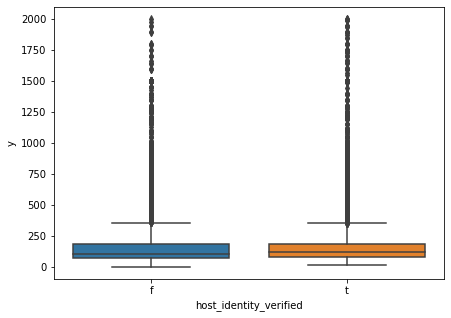

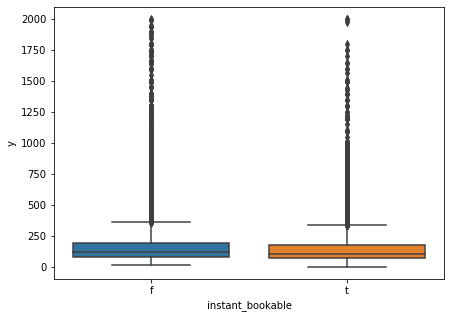

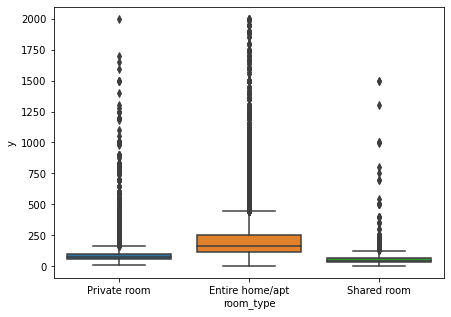

In [18]:
# 目的変数とすべてのカテゴリデータで箱ひげ
for x in cate_columns:
    
    i = 1
    vertical_num = math.ceil(len(num_columns)/3)        
        
    if train[x].nunique() < 10:

        try:
            plt.figure(figsize=(7, 5))
            sns.boxplot(data=train, x = x, y= target_column)
            i += 1

        except:
           pass


## 相関係数

<AxesSubplot:>

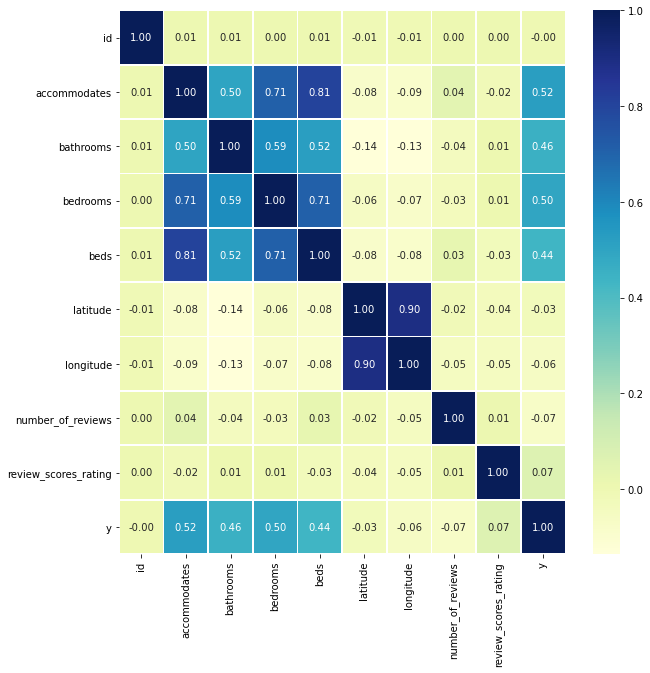

In [19]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr(), fmt="1.2f", annot=True, lw=0.7, cmap='YlGnBu')

In [20]:
# カテゴリーデータどうしの相関係数
if category_corr_coef:
    plt.figure(figsize=(20, 7))
    plt.subplots_adjust(wspace=0.1, hspace=0.4)
    i = 1
    for label_1 in cate_columns: 
        for label_2 in cate_columns:
            if train[label_1].nunique() < 10:
                try:
                    plt.subplot(math.ceil(len(cate_columns)/3), 3,i)
                    sns.heatmap(pd.crosstab(train[label_1], train[label_2]), fmt="1.1f", annot=True, lw=0.7, cmap='Blues')
                    i += 1
                except:
                    pass

# preprocessing

In [21]:
# train_testは一気に処理したいので結合
train['0train_1test_flag'] = 0
test['0train_1test_flag'] = 1
train_test = pd.concat([train.copy(),test.copy()])
train_test.head()

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y,0train_1test_flag
0,0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,My place is meant for family and a few friends...,2016-07-27,t,f,NaN,2016-07-13,f,2016-07-27,33.788931,-118.154761,The Penthouse,NaN,1,Apartment,60.0,Private room,NaN,90804,138.0,0
1,1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,This is a new listing for a lovely guest bedro...,2016-09-12,t,t,100%,2015-12-30,f,2017-03-31,38.934810,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0,0
2,2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,We're looking forward to your stay at our apt....,2016-06-15,t,f,100%,2016-05-21,t,2017-08-13,40.695118,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN,65.0,0
3,3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,BEST CITY VIEWS - - ROOF DECK W/ BBQ & WiFi - ...,2014-03-15,t,t,100%,2012-06-19,t,2017-09-03,37.796728,-122.411906,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95.0,Private room,NaN,94133,166.0,0
4,4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,Charming Apartment on the upper west side of M...,2015-08-05,t,t,100%,2015-03-25,f,2017-09-10,40.785050,-73.974691,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,165.0,0


In [22]:
train_test.columns.tolist()

['id',
 'accommodates',
 'amenities',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'cancellation_policy',
 'city',
 'cleaning_fee',
 'description',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'instant_bookable',
 'last_review',
 'latitude',
 'longitude',
 'name',
 'neighbourhood',
 'number_of_reviews',
 'property_type',
 'review_scores_rating',
 'room_type',
 'thumbnail_url',
 'zipcode',
 'y',
 '0train_1test_flag']

In [23]:
# 明らかに要らないカラムを削除

train_test_cols = [
#     'id',
    'accommodates',
    'amenities',
    'bathrooms',
    'bed_type',
    'bedrooms',
    'beds',
    'cancellation_policy',
    'city',
    'cleaning_fee',
    'description',
    'first_review',
    'host_has_profile_pic',
    'host_identity_verified',
    'host_response_rate',
    'host_since',
    'instant_bookable',
    'last_review',
    'latitude',
    'longitude',
#     'name',
    'neighbourhood',
    'number_of_reviews',
    'property_type',
    'review_scores_rating',
    'room_type',
    'thumbnail_url',
    'zipcode',
    'y',
    '0train_1test_flag'
]

train_test = train_test[train_test_cols]

## amenity
1. amenityカラムの文字数をカラムとして追加
2. amenityカラムに入っている物を01で入れたい→人気度を反映するため、列にどれだけ入っていたかをdictに保管し反映してカラム追加
3. 2のsum列を追加して、人気度合計を算出

In [24]:
# 文字数カラムを生成
train_test['amenities_count'] = train_test['amenities'].apply(lambda x: len(x))

In [25]:
# 人気度的なデータを生成
amenities_list = set()
amenities_dict = dict()

for i in range(len(train_test)):
    print(i)
    for amenity in train_test['amenities'].iloc[i].split(','):
        amenity = amenity.replace('{', '')
        amenity = amenity.replace('}', '')  
        amenity = amenity.replace('"', '')
        amenity = amenity.replace(':', '')
        amenity = amenity.replace(' ', '')
        amenity = amenity.replace('　', '')
        
        
        if amenity != '':
            amenities_list.add(str(amenity))
            try:
                amenities_dict[amenity] += 1
            except:
                amenities_dict[amenity] = 0
print(amenities_dict)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155


4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263


5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906
5907
5908
5909
5910
5911
5912
5913
5914
5915
5916
5917
5918
5919
5920
5921
5922
5923
5924
5925
5926
5927
5928
5929
5930
5931
5932
5933
5934
5935
5936
5937
5938
5939
5940
5941
5942
5943
5944
5945
5946
5947
5948
5949
5950
5951
5952
5953
5954
5955
5956
5957
5958
5959
5960
5961
5962
5963
5964
5965
5966
5967
5968
5969
5970
5971
5972
5973
5974
5975
5976
5977
5978
5979
5980
5981
5982
5983
5984
5985
5986
5987
5988
5989
5990
5991
5992
5993
5994
5995
5996
5997
5998
5999
6000
6001
6002
6003
6004
6005
6006
6007
6008
6009
6010
6011
6012
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6058
6059
6060
6061
6062
6063
6064
6065
6066
6067


7955
7956
7957
7958
7959
7960
7961
7962
7963
7964
7965
7966
7967
7968
7969
7970
7971
7972
7973
7974
7975
7976
7977
7978
7979
7980
7981
7982
7983
7984
7985
7986
7987
7988
7989
7990
7991
7992
7993
7994
7995
7996
7997
7998
7999
8000
8001
8002
8003
8004
8005
8006
8007
8008
8009
8010
8011
8012
8013
8014
8015
8016
8017
8018
8019
8020
8021
8022
8023
8024
8025
8026
8027
8028
8029
8030
8031
8032
8033
8034
8035
8036
8037
8038
8039
8040
8041
8042
8043
8044
8045
8046
8047
8048
8049
8050
8051
8052
8053
8054
8055
8056
8057
8058
8059
8060
8061
8062
8063
8064
8065
8066
8067
8068
8069
8070
8071
8072
8073
8074
8075
8076
8077
8078
8079
8080
8081
8082
8083
8084
8085
8086
8087
8088
8089
8090
8091
8092
8093
8094
8095
8096
8097
8098
8099
8100
8101
8102
8103
8104
8105
8106
8107
8108
8109
8110
8111
8112
8113
8114
8115
8116
8117
8118
8119
8120
8121
8122
8123
8124
8125
8126
8127
8128
8129
8130
8131
8132
8133
8134
8135
8136
8137
8138
8139
8140
8141
8142
8143
8144
8145
8146
8147
8148
8149
8150
8151
8152
8153
8154


10009
10010
10011
10012
10013
10014
10015
10016
10017
10018
10019
10020
10021
10022
10023
10024
10025
10026
10027
10028
10029
10030
10031
10032
10033
10034
10035
10036
10037
10038
10039
10040
10041
10042
10043
10044
10045
10046
10047
10048
10049
10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
1017

11842
11843
11844
11845
11846
11847
11848
11849
11850
11851
11852
11853
11854
11855
11856
11857
11858
11859
11860
11861
11862
11863
11864
11865
11866
11867
11868
11869
11870
11871
11872
11873
11874
11875
11876
11877
11878
11879
11880
11881
11882
11883
11884
11885
11886
11887
11888
11889
11890
11891
11892
11893
11894
11895
11896
11897
11898
11899
11900
11901
11902
11903
11904
11905
11906
11907
11908
11909
11910
11911
11912
11913
11914
11915
11916
11917
11918
11919
11920
11921
11922
11923
11924
11925
11926
11927
11928
11929
11930
11931
11932
11933
11934
11935
11936
11937
11938
11939
11940
11941
11942
11943
11944
11945
11946
11947
11948
11949
11950
11951
11952
11953
11954
11955
11956
11957
11958
11959
11960
11961
11962
11963
11964
11965
11966
11967
11968
11969
11970
11971
11972
11973
11974
11975
11976
11977
11978
11979
11980
11981
11982
11983
11984
11985
11986
11987
11988
11989
11990
11991
11992
11993
11994
11995
11996
11997
11998
11999
12000
12001
12002
12003
12004
12005
12006
12007
1200

13984
13985
13986
13987
13988
13989
13990
13991
13992
13993
13994
13995
13996
13997
13998
13999
14000
14001
14002
14003
14004
14005
14006
14007
14008
14009
14010
14011
14012
14013
14014
14015
14016
14017
14018
14019
14020
14021
14022
14023
14024
14025
14026
14027
14028
14029
14030
14031
14032
14033
14034
14035
14036
14037
14038
14039
14040
14041
14042
14043
14044
14045
14046
14047
14048
14049
14050
14051
14052
14053
14054
14055
14056
14057
14058
14059
14060
14061
14062
14063
14064
14065
14066
14067
14068
14069
14070
14071
14072
14073
14074
14075
14076
14077
14078
14079
14080
14081
14082
14083
14084
14085
14086
14087
14088
14089
14090
14091
14092
14093
14094
14095
14096
14097
14098
14099
14100
14101
14102
14103
14104
14105
14106
14107
14108
14109
14110
14111
14112
14113
14114
14115
14116
14117
14118
14119
14120
14121
14122
14123
14124
14125
14126
14127
14128
14129
14130
14131
14132
14133
14134
14135
14136
14137
14138
14139
14140
14141
14142
14143
14144
14145
14146
14147
14148
14149
1415

15850
15851
15852
15853
15854
15855
15856
15857
15858
15859
15860
15861
15862
15863
15864
15865
15866
15867
15868
15869
15870
15871
15872
15873
15874
15875
15876
15877
15878
15879
15880
15881
15882
15883
15884
15885
15886
15887
15888
15889
15890
15891
15892
15893
15894
15895
15896
15897
15898
15899
15900
15901
15902
15903
15904
15905
15906
15907
15908
15909
15910
15911
15912
15913
15914
15915
15916
15917
15918
15919
15920
15921
15922
15923
15924
15925
15926
15927
15928
15929
15930
15931
15932
15933
15934
15935
15936
15937
15938
15939
15940
15941
15942
15943
15944
15945
15946
15947
15948
15949
15950
15951
15952
15953
15954
15955
15956
15957
15958
15959
15960
15961
15962
15963
15964
15965
15966
15967
15968
15969
15970
15971
15972
15973
15974
15975
15976
15977
15978
15979
15980
15981
15982
15983
15984
15985
15986
15987
15988
15989
15990
15991
15992
15993
15994
15995
15996
15997
15998
15999
16000
16001
16002
16003
16004
16005
16006
16007
16008
16009
16010
16011
16012
16013
16014
16015
1601

17978
17979
17980
17981
17982
17983
17984
17985
17986
17987
17988
17989
17990
17991
17992
17993
17994
17995
17996
17997
17998
17999
18000
18001
18002
18003
18004
18005
18006
18007
18008
18009
18010
18011
18012
18013
18014
18015
18016
18017
18018
18019
18020
18021
18022
18023
18024
18025
18026
18027
18028
18029
18030
18031
18032
18033
18034
18035
18036
18037
18038
18039
18040
18041
18042
18043
18044
18045
18046
18047
18048
18049
18050
18051
18052
18053
18054
18055
18056
18057
18058
18059
18060
18061
18062
18063
18064
18065
18066
18067
18068
18069
18070
18071
18072
18073
18074
18075
18076
18077
18078
18079
18080
18081
18082
18083
18084
18085
18086
18087
18088
18089
18090
18091
18092
18093
18094
18095
18096
18097
18098
18099
18100
18101
18102
18103
18104
18105
18106
18107
18108
18109
18110
18111
18112
18113
18114
18115
18116
18117
18118
18119
18120
18121
18122
18123
18124
18125
18126
18127
18128
18129
18130
18131
18132
18133
18134
18135
18136
18137
18138
18139
18140
18141
18142
18143
1814

19884
19885
19886
19887
19888
19889
19890
19891
19892
19893
19894
19895
19896
19897
19898
19899
19900
19901
19902
19903
19904
19905
19906
19907
19908
19909
19910
19911
19912
19913
19914
19915
19916
19917
19918
19919
19920
19921
19922
19923
19924
19925
19926
19927
19928
19929
19930
19931
19932
19933
19934
19935
19936
19937
19938
19939
19940
19941
19942
19943
19944
19945
19946
19947
19948
19949
19950
19951
19952
19953
19954
19955
19956
19957
19958
19959
19960
19961
19962
19963
19964
19965
19966
19967
19968
19969
19970
19971
19972
19973
19974
19975
19976
19977
19978
19979
19980
19981
19982
19983
19984
19985
19986
19987
19988
19989
19990
19991
19992
19993
19994
19995
19996
19997
19998
19999
20000
20001
20002
20003
20004
20005
20006
20007
20008
20009
20010
20011
20012
20013
20014
20015
20016
20017
20018
20019
20020
20021
20022
20023
20024
20025
20026
20027
20028
20029
20030
20031
20032
20033
20034
20035
20036
20037
20038
20039
20040
20041
20042
20043
20044
20045
20046
20047
20048
20049
2005

22089
22090
22091
22092
22093
22094
22095
22096
22097
22098
22099
22100
22101
22102
22103
22104
22105
22106
22107
22108
22109
22110
22111
22112
22113
22114
22115
22116
22117
22118
22119
22120
22121
22122
22123
22124
22125
22126
22127
22128
22129
22130
22131
22132
22133
22134
22135
22136
22137
22138
22139
22140
22141
22142
22143
22144
22145
22146
22147
22148
22149
22150
22151
22152
22153
22154
22155
22156
22157
22158
22159
22160
22161
22162
22163
22164
22165
22166
22167
22168
22169
22170
22171
22172
22173
22174
22175
22176
22177
22178
22179
22180
22181
22182
22183
22184
22185
22186
22187
22188
22189
22190
22191
22192
22193
22194
22195
22196
22197
22198
22199
22200
22201
22202
22203
22204
22205
22206
22207
22208
22209
22210
22211
22212
22213
22214
22215
22216
22217
22218
22219
22220
22221
22222
22223
22224
22225
22226
22227
22228
22229
22230
22231
22232
22233
22234
22235
22236
22237
22238
22239
22240
22241
22242
22243
22244
22245
22246
22247
22248
22249
22250
22251
22252
22253
22254
2225

24145
24146
24147
24148
24149
24150
24151
24152
24153
24154
24155
24156
24157
24158
24159
24160
24161
24162
24163
24164
24165
24166
24167
24168
24169
24170
24171
24172
24173
24174
24175
24176
24177
24178
24179
24180
24181
24182
24183
24184
24185
24186
24187
24188
24189
24190
24191
24192
24193
24194
24195
24196
24197
24198
24199
24200
24201
24202
24203
24204
24205
24206
24207
24208
24209
24210
24211
24212
24213
24214
24215
24216
24217
24218
24219
24220
24221
24222
24223
24224
24225
24226
24227
24228
24229
24230
24231
24232
24233
24234
24235
24236
24237
24238
24239
24240
24241
24242
24243
24244
24245
24246
24247
24248
24249
24250
24251
24252
24253
24254
24255
24256
24257
24258
24259
24260
24261
24262
24263
24264
24265
24266
24267
24268
24269
24270
24271
24272
24273
24274
24275
24276
24277
24278
24279
24280
24281
24282
24283
24284
24285
24286
24287
24288
24289
24290
24291
24292
24293
24294
24295
24296
24297
24298
24299
24300
24301
24302
24303
24304
24305
24306
24307
24308
24309
24310
2431

26163
26164
26165
26166
26167
26168
26169
26170
26171
26172
26173
26174
26175
26176
26177
26178
26179
26180
26181
26182
26183
26184
26185
26186
26187
26188
26189
26190
26191
26192
26193
26194
26195
26196
26197
26198
26199
26200
26201
26202
26203
26204
26205
26206
26207
26208
26209
26210
26211
26212
26213
26214
26215
26216
26217
26218
26219
26220
26221
26222
26223
26224
26225
26226
26227
26228
26229
26230
26231
26232
26233
26234
26235
26236
26237
26238
26239
26240
26241
26242
26243
26244
26245
26246
26247
26248
26249
26250
26251
26252
26253
26254
26255
26256
26257
26258
26259
26260
26261
26262
26263
26264
26265
26266
26267
26268
26269
26270
26271
26272
26273
26274
26275
26276
26277
26278
26279
26280
26281
26282
26283
26284
26285
26286
26287
26288
26289
26290
26291
26292
26293
26294
26295
26296
26297
26298
26299
26300
26301
26302
26303
26304
26305
26306
26307
26308
26309
26310
26311
26312
26313
26314
26315
26316
26317
26318
26319
26320
26321
26322
26323
26324
26325
26326
26327
26328
2632

28005
28006
28007
28008
28009
28010
28011
28012
28013
28014
28015
28016
28017
28018
28019
28020
28021
28022
28023
28024
28025
28026
28027
28028
28029
28030
28031
28032
28033
28034
28035
28036
28037
28038
28039
28040
28041
28042
28043
28044
28045
28046
28047
28048
28049
28050
28051
28052
28053
28054
28055
28056
28057
28058
28059
28060
28061
28062
28063
28064
28065
28066
28067
28068
28069
28070
28071
28072
28073
28074
28075
28076
28077
28078
28079
28080
28081
28082
28083
28084
28085
28086
28087
28088
28089
28090
28091
28092
28093
28094
28095
28096
28097
28098
28099
28100
28101
28102
28103
28104
28105
28106
28107
28108
28109
28110
28111
28112
28113
28114
28115
28116
28117
28118
28119
28120
28121
28122
28123
28124
28125
28126
28127
28128
28129
28130
28131
28132
28133
28134
28135
28136
28137
28138
28139
28140
28141
28142
28143
28144
28145
28146
28147
28148
28149
28150
28151
28152
28153
28154
28155
28156
28157
28158
28159
28160
28161
28162
28163
28164
28165
28166
28167
28168
28169
28170
2817

30126
30127
30128
30129
30130
30131
30132
30133
30134
30135
30136
30137
30138
30139
30140
30141
30142
30143
30144
30145
30146
30147
30148
30149
30150
30151
30152
30153
30154
30155
30156
30157
30158
30159
30160
30161
30162
30163
30164
30165
30166
30167
30168
30169
30170
30171
30172
30173
30174
30175
30176
30177
30178
30179
30180
30181
30182
30183
30184
30185
30186
30187
30188
30189
30190
30191
30192
30193
30194
30195
30196
30197
30198
30199
30200
30201
30202
30203
30204
30205
30206
30207
30208
30209
30210
30211
30212
30213
30214
30215
30216
30217
30218
30219
30220
30221
30222
30223
30224
30225
30226
30227
30228
30229
30230
30231
30232
30233
30234
30235
30236
30237
30238
30239
30240
30241
30242
30243
30244
30245
30246
30247
30248
30249
30250
30251
30252
30253
30254
30255
30256
30257
30258
30259
30260
30261
30262
30263
30264
30265
30266
30267
30268
30269
30270
30271
30272
30273
30274
30275
30276
30277
30278
30279
30280
30281
30282
30283
30284
30285
30286
30287
30288
30289
30290
30291
3029

31958
31959
31960
31961
31962
31963
31964
31965
31966
31967
31968
31969
31970
31971
31972
31973
31974
31975
31976
31977
31978
31979
31980
31981
31982
31983
31984
31985
31986
31987
31988
31989
31990
31991
31992
31993
31994
31995
31996
31997
31998
31999
32000
32001
32002
32003
32004
32005
32006
32007
32008
32009
32010
32011
32012
32013
32014
32015
32016
32017
32018
32019
32020
32021
32022
32023
32024
32025
32026
32027
32028
32029
32030
32031
32032
32033
32034
32035
32036
32037
32038
32039
32040
32041
32042
32043
32044
32045
32046
32047
32048
32049
32050
32051
32052
32053
32054
32055
32056
32057
32058
32059
32060
32061
32062
32063
32064
32065
32066
32067
32068
32069
32070
32071
32072
32073
32074
32075
32076
32077
32078
32079
32080
32081
32082
32083
32084
32085
32086
32087
32088
32089
32090
32091
32092
32093
32094
32095
32096
32097
32098
32099
32100
32101
32102
32103
32104
32105
32106
32107
32108
32109
32110
32111
32112
32113
32114
32115
32116
32117
32118
32119
32120
32121
32122
32123
3212

34070
34071
34072
34073
34074
34075
34076
34077
34078
34079
34080
34081
34082
34083
34084
34085
34086
34087
34088
34089
34090
34091
34092
34093
34094
34095
34096
34097
34098
34099
34100
34101
34102
34103
34104
34105
34106
34107
34108
34109
34110
34111
34112
34113
34114
34115
34116
34117
34118
34119
34120
34121
34122
34123
34124
34125
34126
34127
34128
34129
34130
34131
34132
34133
34134
34135
34136
34137
34138
34139
34140
34141
34142
34143
34144
34145
34146
34147
34148
34149
34150
34151
34152
34153
34154
34155
34156
34157
34158
34159
34160
34161
34162
34163
34164
34165
34166
34167
34168
34169
34170
34171
34172
34173
34174
34175
34176
34177
34178
34179
34180
34181
34182
34183
34184
34185
34186
34187
34188
34189
34190
34191
34192
34193
34194
34195
34196
34197
34198
34199
34200
34201
34202
34203
34204
34205
34206
34207
34208
34209
34210
34211
34212
34213
34214
34215
34216
34217
34218
34219
34220
34221
34222
34223
34224
34225
34226
34227
34228
34229
34230
34231
34232
34233
34234
34235
3423

35802
35803
35804
35805
35806
35807
35808
35809
35810
35811
35812
35813
35814
35815
35816
35817
35818
35819
35820
35821
35822
35823
35824
35825
35826
35827
35828
35829
35830
35831
35832
35833
35834
35835
35836
35837
35838
35839
35840
35841
35842
35843
35844
35845
35846
35847
35848
35849
35850
35851
35852
35853
35854
35855
35856
35857
35858
35859
35860
35861
35862
35863
35864
35865
35866
35867
35868
35869
35870
35871
35872
35873
35874
35875
35876
35877
35878
35879
35880
35881
35882
35883
35884
35885
35886
35887
35888
35889
35890
35891
35892
35893
35894
35895
35896
35897
35898
35899
35900
35901
35902
35903
35904
35905
35906
35907
35908
35909
35910
35911
35912
35913
35914
35915
35916
35917
35918
35919
35920
35921
35922
35923
35924
35925
35926
35927
35928
35929
35930
35931
35932
35933
35934
35935
35936
35937
35938
35939
35940
35941
35942
35943
35944
35945
35946
35947
35948
35949
35950
35951
35952
35953
35954
35955
35956
35957
35958
35959
35960
35961
35962
35963
35964
35965
35966
35967
3596

38043
38044
38045
38046
38047
38048
38049
38050
38051
38052
38053
38054
38055
38056
38057
38058
38059
38060
38061
38062
38063
38064
38065
38066
38067
38068
38069
38070
38071
38072
38073
38074
38075
38076
38077
38078
38079
38080
38081
38082
38083
38084
38085
38086
38087
38088
38089
38090
38091
38092
38093
38094
38095
38096
38097
38098
38099
38100
38101
38102
38103
38104
38105
38106
38107
38108
38109
38110
38111
38112
38113
38114
38115
38116
38117
38118
38119
38120
38121
38122
38123
38124
38125
38126
38127
38128
38129
38130
38131
38132
38133
38134
38135
38136
38137
38138
38139
38140
38141
38142
38143
38144
38145
38146
38147
38148
38149
38150
38151
38152
38153
38154
38155
38156
38157
38158
38159
38160
38161
38162
38163
38164
38165
38166
38167
38168
38169
38170
38171
38172
38173
38174
38175
38176
38177
38178
38179
38180
38181
38182
38183
38184
38185
38186
38187
38188
38189
38190
38191
38192
38193
38194
38195
38196
38197
38198
38199
38200
38201
38202
38203
38204
38205
38206
38207
38208
3820

39749
39750
39751
39752
39753
39754
39755
39756
39757
39758
39759
39760
39761
39762
39763
39764
39765
39766
39767
39768
39769
39770
39771
39772
39773
39774
39775
39776
39777
39778
39779
39780
39781
39782
39783
39784
39785
39786
39787
39788
39789
39790
39791
39792
39793
39794
39795
39796
39797
39798
39799
39800
39801
39802
39803
39804
39805
39806
39807
39808
39809
39810
39811
39812
39813
39814
39815
39816
39817
39818
39819
39820
39821
39822
39823
39824
39825
39826
39827
39828
39829
39830
39831
39832
39833
39834
39835
39836
39837
39838
39839
39840
39841
39842
39843
39844
39845
39846
39847
39848
39849
39850
39851
39852
39853
39854
39855
39856
39857
39858
39859
39860
39861
39862
39863
39864
39865
39866
39867
39868
39869
39870
39871
39872
39873
39874
39875
39876
39877
39878
39879
39880
39881
39882
39883
39884
39885
39886
39887
39888
39889
39890
39891
39892
39893
39894
39895
39896
39897
39898
39899
39900
39901
39902
39903
39904
39905
39906
39907
39908
39909
39910
39911
39912
39913
39914
3991

41709
41710
41711
41712
41713
41714
41715
41716
41717
41718
41719
41720
41721
41722
41723
41724
41725
41726
41727
41728
41729
41730
41731
41732
41733
41734
41735
41736
41737
41738
41739
41740
41741
41742
41743
41744
41745
41746
41747
41748
41749
41750
41751
41752
41753
41754
41755
41756
41757
41758
41759
41760
41761
41762
41763
41764
41765
41766
41767
41768
41769
41770
41771
41772
41773
41774
41775
41776
41777
41778
41779
41780
41781
41782
41783
41784
41785
41786
41787
41788
41789
41790
41791
41792
41793
41794
41795
41796
41797
41798
41799
41800
41801
41802
41803
41804
41805
41806
41807
41808
41809
41810
41811
41812
41813
41814
41815
41816
41817
41818
41819
41820
41821
41822
41823
41824
41825
41826
41827
41828
41829
41830
41831
41832
41833
41834
41835
41836
41837
41838
41839
41840
41841
41842
41843
41844
41845
41846
41847
41848
41849
41850
41851
41852
41853
41854
41855
41856
41857
41858
41859
41860
41861
41862
41863
41864
41865
41866
41867
41868
41869
41870
41871
41872
41873
41874
4187

43410
43411
43412
43413
43414
43415
43416
43417
43418
43419
43420
43421
43422
43423
43424
43425
43426
43427
43428
43429
43430
43431
43432
43433
43434
43435
43436
43437
43438
43439
43440
43441
43442
43443
43444
43445
43446
43447
43448
43449
43450
43451
43452
43453
43454
43455
43456
43457
43458
43459
43460
43461
43462
43463
43464
43465
43466
43467
43468
43469
43470
43471
43472
43473
43474
43475
43476
43477
43478
43479
43480
43481
43482
43483
43484
43485
43486
43487
43488
43489
43490
43491
43492
43493
43494
43495
43496
43497
43498
43499
43500
43501
43502
43503
43504
43505
43506
43507
43508
43509
43510
43511
43512
43513
43514
43515
43516
43517
43518
43519
43520
43521
43522
43523
43524
43525
43526
43527
43528
43529
43530
43531
43532
43533
43534
43535
43536
43537
43538
43539
43540
43541
43542
43543
43544
43545
43546
43547
43548
43549
43550
43551
43552
43553
43554
43555
43556
43557
43558
43559
43560
43561
43562
43563
43564
43565
43566
43567
43568
43569
43570
43571
43572
43573
43574
43575
4357

45327
45328
45329
45330
45331
45332
45333
45334
45335
45336
45337
45338
45339
45340
45341
45342
45343
45344
45345
45346
45347
45348
45349
45350
45351
45352
45353
45354
45355
45356
45357
45358
45359
45360
45361
45362
45363
45364
45365
45366
45367
45368
45369
45370
45371
45372
45373
45374
45375
45376
45377
45378
45379
45380
45381
45382
45383
45384
45385
45386
45387
45388
45389
45390
45391
45392
45393
45394
45395
45396
45397
45398
45399
45400
45401
45402
45403
45404
45405
45406
45407
45408
45409
45410
45411
45412
45413
45414
45415
45416
45417
45418
45419
45420
45421
45422
45423
45424
45425
45426
45427
45428
45429
45430
45431
45432
45433
45434
45435
45436
45437
45438
45439
45440
45441
45442
45443
45444
45445
45446
45447
45448
45449
45450
45451
45452
45453
45454
45455
45456
45457
45458
45459
45460
45461
45462
45463
45464
45465
45466
45467
45468
45469
45470
45471
45472
45473
45474
45475
45476
45477
45478
45479
45480
45481
45482
45483
45484
45485
45486
45487
45488
45489
45490
45491
45492
4549

47247
47248
47249
47250
47251
47252
47253
47254
47255
47256
47257
47258
47259
47260
47261
47262
47263
47264
47265
47266
47267
47268
47269
47270
47271
47272
47273
47274
47275
47276
47277
47278
47279
47280
47281
47282
47283
47284
47285
47286
47287
47288
47289
47290
47291
47292
47293
47294
47295
47296
47297
47298
47299
47300
47301
47302
47303
47304
47305
47306
47307
47308
47309
47310
47311
47312
47313
47314
47315
47316
47317
47318
47319
47320
47321
47322
47323
47324
47325
47326
47327
47328
47329
47330
47331
47332
47333
47334
47335
47336
47337
47338
47339
47340
47341
47342
47343
47344
47345
47346
47347
47348
47349
47350
47351
47352
47353
47354
47355
47356
47357
47358
47359
47360
47361
47362
47363
47364
47365
47366
47367
47368
47369
47370
47371
47372
47373
47374
47375
47376
47377
47378
47379
47380
47381
47382
47383
47384
47385
47386
47387
47388
47389
47390
47391
47392
47393
47394
47395
47396
47397
47398
47399
47400
47401
47402
47403
47404
47405
47406
47407
47408
47409
47410
47411
47412
4741

49246
49247
49248
49249
49250
49251
49252
49253
49254
49255
49256
49257
49258
49259
49260
49261
49262
49263
49264
49265
49266
49267
49268
49269
49270
49271
49272
49273
49274
49275
49276
49277
49278
49279
49280
49281
49282
49283
49284
49285
49286
49287
49288
49289
49290
49291
49292
49293
49294
49295
49296
49297
49298
49299
49300
49301
49302
49303
49304
49305
49306
49307
49308
49309
49310
49311
49312
49313
49314
49315
49316
49317
49318
49319
49320
49321
49322
49323
49324
49325
49326
49327
49328
49329
49330
49331
49332
49333
49334
49335
49336
49337
49338
49339
49340
49341
49342
49343
49344
49345
49346
49347
49348
49349
49350
49351
49352
49353
49354
49355
49356
49357
49358
49359
49360
49361
49362
49363
49364
49365
49366
49367
49368
49369
49370
49371
49372
49373
49374
49375
49376
49377
49378
49379
49380
49381
49382
49383
49384
49385
49386
49387
49388
49389
49390
49391
49392
49393
49394
49395
49396
49397
49398
49399
49400
49401
49402
49403
49404
49405
49406
49407
49408
49409
49410
49411
4941

50954
50955
50956
50957
50958
50959
50960
50961
50962
50963
50964
50965
50966
50967
50968
50969
50970
50971
50972
50973
50974
50975
50976
50977
50978
50979
50980
50981
50982
50983
50984
50985
50986
50987
50988
50989
50990
50991
50992
50993
50994
50995
50996
50997
50998
50999
51000
51001
51002
51003
51004
51005
51006
51007
51008
51009
51010
51011
51012
51013
51014
51015
51016
51017
51018
51019
51020
51021
51022
51023
51024
51025
51026
51027
51028
51029
51030
51031
51032
51033
51034
51035
51036
51037
51038
51039
51040
51041
51042
51043
51044
51045
51046
51047
51048
51049
51050
51051
51052
51053
51054
51055
51056
51057
51058
51059
51060
51061
51062
51063
51064
51065
51066
51067
51068
51069
51070
51071
51072
51073
51074
51075
51076
51077
51078
51079
51080
51081
51082
51083
51084
51085
51086
51087
51088
51089
51090
51091
51092
51093
51094
51095
51096
51097
51098
51099
51100
51101
51102
51103
51104
51105
51106
51107
51108
51109
51110
51111
51112
51113
51114
51115
51116
51117
51118
51119
5112

53103
53104
53105
53106
53107
53108
53109
53110
53111
53112
53113
53114
53115
53116
53117
53118
53119
53120
53121
53122
53123
53124
53125
53126
53127
53128
53129
53130
53131
53132
53133
53134
53135
53136
53137
53138
53139
53140
53141
53142
53143
53144
53145
53146
53147
53148
53149
53150
53151
53152
53153
53154
53155
53156
53157
53158
53159
53160
53161
53162
53163
53164
53165
53166
53167
53168
53169
53170
53171
53172
53173
53174
53175
53176
53177
53178
53179
53180
53181
53182
53183
53184
53185
53186
53187
53188
53189
53190
53191
53192
53193
53194
53195
53196
53197
53198
53199
53200
53201
53202
53203
53204
53205
53206
53207
53208
53209
53210
53211
53212
53213
53214
53215
53216
53217
53218
53219
53220
53221
53222
53223
53224
53225
53226
53227
53228
53229
53230
53231
53232
53233
53234
53235
53236
53237
53238
53239
53240
53241
53242
53243
53244
53245
53246
53247
53248
53249
53250
53251
53252
53253
53254
53255
53256
53257
53258
53259
53260
53261
53262
53263
53264
53265
53266
53267
53268
5326

54995
54996
54997
54998
54999
55000
55001
55002
55003
55004
55005
55006
55007
55008
55009
55010
55011
55012
55013
55014
55015
55016
55017
55018
55019
55020
55021
55022
55023
55024
55025
55026
55027
55028
55029
55030
55031
55032
55033
55034
55035
55036
55037
55038
55039
55040
55041
55042
55043
55044
55045
55046
55047
55048
55049
55050
55051
55052
55053
55054
55055
55056
55057
55058
55059
55060
55061
55062
55063
55064
55065
55066
55067
55068
55069
55070
55071
55072
55073
55074
55075
55076
55077
55078
55079
55080
55081
55082
55083
55084
55085
55086
55087
55088
55089
55090
55091
55092
55093
55094
55095
55096
55097
55098
55099
55100
55101
55102
55103
55104
55105
55106
55107
55108
55109
55110
55111
55112
55113
55114
55115
55116
55117
55118
55119
55120
55121
55122
55123
55124
55125
55126
55127
55128
55129
55130
55131
55132
55133
55134
55135
55136
55137
55138
55139
55140
55141
55142
55143
55144
55145
55146
55147
55148
55149
55150
55151
55152
55153
55154
55155
55156
55157
55158
55159
55160
5516

57244
57245
57246
57247
57248
57249
57250
57251
57252
57253
57254
57255
57256
57257
57258
57259
57260
57261
57262
57263
57264
57265
57266
57267
57268
57269
57270
57271
57272
57273
57274
57275
57276
57277
57278
57279
57280
57281
57282
57283
57284
57285
57286
57287
57288
57289
57290
57291
57292
57293
57294
57295
57296
57297
57298
57299
57300
57301
57302
57303
57304
57305
57306
57307
57308
57309
57310
57311
57312
57313
57314
57315
57316
57317
57318
57319
57320
57321
57322
57323
57324
57325
57326
57327
57328
57329
57330
57331
57332
57333
57334
57335
57336
57337
57338
57339
57340
57341
57342
57343
57344
57345
57346
57347
57348
57349
57350
57351
57352
57353
57354
57355
57356
57357
57358
57359
57360
57361
57362
57363
57364
57365
57366
57367
57368
57369
57370
57371
57372
57373
57374
57375
57376
57377
57378
57379
57380
57381
57382
57383
57384
57385
57386
57387
57388
57389
57390
57391
57392
57393
57394
57395
57396
57397
57398
57399
57400
57401
57402
57403
57404
57405
57406
57407
57408
57409
5741

59091
59092
59093
59094
59095
59096
59097
59098
59099
59100
59101
59102
59103
59104
59105
59106
59107
59108
59109
59110
59111
59112
59113
59114
59115
59116
59117
59118
59119
59120
59121
59122
59123
59124
59125
59126
59127
59128
59129
59130
59131
59132
59133
59134
59135
59136
59137
59138
59139
59140
59141
59142
59143
59144
59145
59146
59147
59148
59149
59150
59151
59152
59153
59154
59155
59156
59157
59158
59159
59160
59161
59162
59163
59164
59165
59166
59167
59168
59169
59170
59171
59172
59173
59174
59175
59176
59177
59178
59179
59180
59181
59182
59183
59184
59185
59186
59187
59188
59189
59190
59191
59192
59193
59194
59195
59196
59197
59198
59199
59200
59201
59202
59203
59204
59205
59206
59207
59208
59209
59210
59211
59212
59213
59214
59215
59216
59217
59218
59219
59220
59221
59222
59223
59224
59225
59226
59227
59228
59229
59230
59231
59232
59233
59234
59235
59236
59237
59238
59239
59240
59241
59242
59243
59244
59245
59246
59247
59248
59249
59250
59251
59252
59253
59254
59255
59256
5925

61243
61244
61245
61246
61247
61248
61249
61250
61251
61252
61253
61254
61255
61256
61257
61258
61259
61260
61261
61262
61263
61264
61265
61266
61267
61268
61269
61270
61271
61272
61273
61274
61275
61276
61277
61278
61279
61280
61281
61282
61283
61284
61285
61286
61287
61288
61289
61290
61291
61292
61293
61294
61295
61296
61297
61298
61299
61300
61301
61302
61303
61304
61305
61306
61307
61308
61309
61310
61311
61312
61313
61314
61315
61316
61317
61318
61319
61320
61321
61322
61323
61324
61325
61326
61327
61328
61329
61330
61331
61332
61333
61334
61335
61336
61337
61338
61339
61340
61341
61342
61343
61344
61345
61346
61347
61348
61349
61350
61351
61352
61353
61354
61355
61356
61357
61358
61359
61360
61361
61362
61363
61364
61365
61366
61367
61368
61369
61370
61371
61372
61373
61374
61375
61376
61377
61378
61379
61380
61381
61382
61383
61384
61385
61386
61387
61388
61389
61390
61391
61392
61393
61394
61395
61396
61397
61398
61399
61400
61401
61402
61403
61404
61405
61406
61407
61408
6140

63047
63048
63049
63050
63051
63052
63053
63054
63055
63056
63057
63058
63059
63060
63061
63062
63063
63064
63065
63066
63067
63068
63069
63070
63071
63072
63073
63074
63075
63076
63077
63078
63079
63080
63081
63082
63083
63084
63085
63086
63087
63088
63089
63090
63091
63092
63093
63094
63095
63096
63097
63098
63099
63100
63101
63102
63103
63104
63105
63106
63107
63108
63109
63110
63111
63112
63113
63114
63115
63116
63117
63118
63119
63120
63121
63122
63123
63124
63125
63126
63127
63128
63129
63130
63131
63132
63133
63134
63135
63136
63137
63138
63139
63140
63141
63142
63143
63144
63145
63146
63147
63148
63149
63150
63151
63152
63153
63154
63155
63156
63157
63158
63159
63160
63161
63162
63163
63164
63165
63166
63167
63168
63169
63170
63171
63172
63173
63174
63175
63176
63177
63178
63179
63180
63181
63182
63183
63184
63185
63186
63187
63188
63189
63190
63191
63192
63193
63194
63195
63196
63197
63198
63199
63200
63201
63202
63203
63204
63205
63206
63207
63208
63209
63210
63211
63212
6321

65214
65215
65216
65217
65218
65219
65220
65221
65222
65223
65224
65225
65226
65227
65228
65229
65230
65231
65232
65233
65234
65235
65236
65237
65238
65239
65240
65241
65242
65243
65244
65245
65246
65247
65248
65249
65250
65251
65252
65253
65254
65255
65256
65257
65258
65259
65260
65261
65262
65263
65264
65265
65266
65267
65268
65269
65270
65271
65272
65273
65274
65275
65276
65277
65278
65279
65280
65281
65282
65283
65284
65285
65286
65287
65288
65289
65290
65291
65292
65293
65294
65295
65296
65297
65298
65299
65300
65301
65302
65303
65304
65305
65306
65307
65308
65309
65310
65311
65312
65313
65314
65315
65316
65317
65318
65319
65320
65321
65322
65323
65324
65325
65326
65327
65328
65329
65330
65331
65332
65333
65334
65335
65336
65337
65338
65339
65340
65341
65342
65343
65344
65345
65346
65347
65348
65349
65350
65351
65352
65353
65354
65355
65356
65357
65358
65359
65360
65361
65362
65363
65364
65365
65366
65367
65368
65369
65370
65371
65372
65373
65374
65375
65376
65377
65378
65379
6538

66591
66592
66593
66594
66595
66596
66597
66598
66599
66600
66601
66602
66603
66604
66605
66606
66607
66608
66609
66610
66611
66612
66613
66614
66615
66616
66617
66618
66619
66620
66621
66622
66623
66624
66625
66626
66627
66628
66629
66630
66631
66632
66633
66634
66635
66636
66637
66638
66639
66640
66641
66642
66643
66644
66645
66646
66647
66648
66649
66650
66651
66652
66653
66654
66655
66656
66657
66658
66659
66660
66661
66662
66663
66664
66665
66666
66667
66668
66669
66670
66671
66672
66673
66674
66675
66676
66677
66678
66679
66680
66681
66682
66683
66684
66685
66686
66687
66688
66689
66690
66691
66692
66693
66694
66695
66696
66697
66698
66699
66700
66701
66702
66703
66704
66705
66706
66707
66708
66709
66710
66711
66712
66713
66714
66715
66716
66717
66718
66719
66720
66721
66722
66723
66724
66725
66726
66727
66728
66729
66730
66731
66732
66733
66734
66735
66736
66737
66738
66739
66740
66741
66742
66743
66744
66745
66746
66747
66748
66749
66750
66751
66752
66753
66754
66755
66756
6675

68913
68914
68915
68916
68917
68918
68919
68920
68921
68922
68923
68924
68925
68926
68927
68928
68929
68930
68931
68932
68933
68934
68935
68936
68937
68938
68939
68940
68941
68942
68943
68944
68945
68946
68947
68948
68949
68950
68951
68952
68953
68954
68955
68956
68957
68958
68959
68960
68961
68962
68963
68964
68965
68966
68967
68968
68969
68970
68971
68972
68973
68974
68975
68976
68977
68978
68979
68980
68981
68982
68983
68984
68985
68986
68987
68988
68989
68990
68991
68992
68993
68994
68995
68996
68997
68998
68999
69000
69001
69002
69003
69004
69005
69006
69007
69008
69009
69010
69011
69012
69013
69014
69015
69016
69017
69018
69019
69020
69021
69022
69023
69024
69025
69026
69027
69028
69029
69030
69031
69032
69033
69034
69035
69036
69037
69038
69039
69040
69041
69042
69043
69044
69045
69046
69047
69048
69049
69050
69051
69052
69053
69054
69055
69056
69057
69058
69059
69060
69061
69062
69063
69064
69065
69066
69067
69068
69069
69070
69071
69072
69073
69074
69075
69076
69077
69078
6907

70756
70757
70758
70759
70760
70761
70762
70763
70764
70765
70766
70767
70768
70769
70770
70771
70772
70773
70774
70775
70776
70777
70778
70779
70780
70781
70782
70783
70784
70785
70786
70787
70788
70789
70790
70791
70792
70793
70794
70795
70796
70797
70798
70799
70800
70801
70802
70803
70804
70805
70806
70807
70808
70809
70810
70811
70812
70813
70814
70815
70816
70817
70818
70819
70820
70821
70822
70823
70824
70825
70826
70827
70828
70829
70830
70831
70832
70833
70834
70835
70836
70837
70838
70839
70840
70841
70842
70843
70844
70845
70846
70847
70848
70849
70850
70851
70852
70853
70854
70855
70856
70857
70858
70859
70860
70861
70862
70863
70864
70865
70866
70867
70868
70869
70870
70871
70872
70873
70874
70875
70876
70877
70878
70879
70880
70881
70882
70883
70884
70885
70886
70887
70888
70889
70890
70891
70892
70893
70894
70895
70896
70897
70898
70899
70900
70901
70902
70903
70904
70905
70906
70907
70908
70909
70910
70911
70912
70913
70914
70915
70916
70917
70918
70919
70920
70921
7092

72737
72738
72739
72740
72741
72742
72743
72744
72745
72746
72747
72748
72749
72750
72751
72752
72753
72754
72755
72756
72757
72758
72759
72760
72761
72762
72763
72764
72765
72766
72767
72768
72769
72770
72771
72772
72773
72774
72775
72776
72777
72778
72779
72780
72781
72782
72783
72784
72785
72786
72787
72788
72789
72790
72791
72792
72793
72794
72795
72796
72797
72798
72799
72800
72801
72802
72803
72804
72805
72806
72807
72808
72809
72810
72811
72812
72813
72814
72815
72816
72817
72818
72819
72820
72821
72822
72823
72824
72825
72826
72827
72828
72829
72830
72831
72832
72833
72834
72835
72836
72837
72838
72839
72840
72841
72842
72843
72844
72845
72846
72847
72848
72849
72850
72851
72852
72853
72854
72855
72856
72857
72858
72859
72860
72861
72862
72863
72864
72865
72866
72867
72868
72869
72870
72871
72872
72873
72874
72875
72876
72877
72878
72879
72880
72881
72882
72883
72884
72885
72886
72887
72888
72889
72890
72891
72892
72893
72894
72895
72896
72897
72898
72899
72900
72901
72902
7290

In [26]:
# カラムを作成。初期値0
for amenity in amenities_list:
    train_test[amenity] = 0

In [27]:
# 人気度的なデータを生成
for i in range(len(train_test)):
    print(i)
    for amenity in train_test['amenities'].iloc[i].split(','):
        amenity = amenity.replace('{', '')
        amenity = amenity.replace('}', '')  
        amenity = amenity.replace('"', '')
        amenity = amenity.replace(':', '')
        amenity = amenity.replace(' ', '')
        amenity = amenity.replace('　', '')
        
        if amenity != '':
            train_test[amenity].iloc[i] = amenities_dict[amenity]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091


3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758


5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452


6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135


8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703
8704
8705
8706
8707
8708
8709
8710
8711
8712
8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778
8779
8780


10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
10284
10285
10286
10287
10288
10289
10290
10291
10292
10293
10294
10295
10296
10297
10298
10299
10300
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10313
10314
10315
10316
10317
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10328
10329
10330
10331
10332
10333
10334
10335
10336
10337
10338
10339
10340
10341
10342
10343
10344
10345
10346
10347
10348
10349
1035

11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
11598
11599
11600
11601
11602
11603
11604
11605
11606
11607
11608
11609
11610
11611
11612
11613
11614
11615
11616
11617
11618
11619
11620
11621
11622
11623
11624
11625
11626
11627
11628
11629
11630
11631
11632
11633
11634
11635
11636
11637
11638
11639
11640
11641
11642
11643
11644
11645
11646
11647
11648
11649
11650
11651
11652
11653
11654
11655
11656
11657
11658
11659
11660
11661
11662
11663
11664
11665
11666
11667
11668
11669
11670
11671
11672
11673
11674
11675
11676
11677
11678
11679
11680
11681
11682
11683
11684
11685
11686
11687
11688
11689
11690
11691
11692
11693
11694
11695
11696
11697
11698
11699
11700
11701
11702
11703
11704
11705
11706
11707
11708
11709
11710
11711
11712
11713
11714
11715
11716
11717
11718
11719
11720
11721
11722
11723
11724
11725
1172

12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979
12980
12981
12982
12983
12984
12985
12986
12987
12988
12989
12990
12991
12992
12993
12994
12995
12996
12997
12998
12999
13000
13001
13002
13003
13004
13005
13006
13007
13008
13009
13010
13011
13012
13013
13014
13015
13016
13017
13018
13019
13020
13021
13022
13023
13024
13025
13026
13027
13028
13029
13030
13031
13032
13033
13034
13035
13036
13037
13038
13039
13040
13041
13042
13043
13044
13045
13046
13047
13048
13049
13050
13051
13052
13053
13054
13055
13056
13057
13058
13059
13060
13061
13062
13063
13064
13065
13066
13067
13068
13069
13070
13071
13072
13073
13074
13075
13076
13077
13078
13079
13080
13081
13082
13083
13084
13085
13086
13087
13088
13089
13090
13091
13092
13093
13094
13095
13096
13097
13098
13099
13100
13101
13102
13103
13104
13105
13106
13107
13108
13109
13110
13111
1311

14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
14350
14351
14352
14353
14354
14355
14356
14357
14358
14359
14360
14361
14362
14363
14364
14365
14366
14367
14368
14369
14370
14371
14372
14373
14374
14375
14376
14377
14378
14379
14380
14381
14382
14383
14384
14385
14386
14387
14388
14389
14390
14391
14392
14393
14394
14395
14396
14397
14398
14399
14400
14401
14402
14403
14404
14405
14406
14407
14408
14409
14410
14411
14412
14413
14414
14415
14416
14417
14418
14419
14420
14421
14422
14423
14424
14425
14426
14427
14428
14429
14430
14431
14432
14433
14434
14435
14436
14437
14438
14439
14440
14441
14442
14443
14444
14445
14446
14447
14448
14449
14450
14451
14452
14453
14454
14455
14456
14457
14458
14459
14460
14461
14462
14463
14464
14465
14466
14467
14468
14469
14470
14471
14472
14473
14474
14475
14476
14477
14478
14479
14480
14481
1448

15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
15707
15708
15709
15710
15711
15712
15713
15714
15715
15716
15717
15718
15719
15720
15721
15722
15723
15724
15725
15726
15727
15728
15729
15730
15731
15732
15733
15734
15735
15736
15737
15738
15739
15740
15741
15742
15743
15744
15745
15746
15747
15748
15749
15750
15751
15752
15753
15754
15755
15756
15757
15758
15759
15760
15761
15762
15763
15764
15765
15766
15767
15768
15769
15770
15771
15772
15773
15774
15775
15776
15777
15778
15779
15780
15781
15782
15783
15784
15785
15786
15787
15788
15789
15790
15791
15792
15793
15794
15795
15796
15797
15798
15799
15800
15801
15802
15803
15804
15805
15806
15807
15808
15809
15810
15811
15812
15813
15814
15815
15816
15817
15818
15819
15820
15821
15822
15823
15824
15825
15826
15827
15828
15829
15830
15831
15832
15833
15834
15835
15836
15837
15838
15839
15840
15841
15842
15843
15844
15845
15846
15847
15848
15849
15850
15851
15852
15853
15854
15855
15856
1585

17090
17091
17092
17093
17094
17095
17096
17097
17098
17099
17100
17101
17102
17103
17104
17105
17106
17107
17108
17109
17110
17111
17112
17113
17114
17115
17116
17117
17118
17119
17120
17121
17122
17123
17124
17125
17126
17127
17128
17129
17130
17131
17132
17133
17134
17135
17136
17137
17138
17139
17140
17141
17142
17143
17144
17145
17146
17147
17148
17149
17150
17151
17152
17153
17154
17155
17156
17157
17158
17159
17160
17161
17162
17163
17164
17165
17166
17167
17168
17169
17170
17171
17172
17173
17174
17175
17176
17177
17178
17179
17180
17181
17182
17183
17184
17185
17186
17187
17188
17189
17190
17191
17192
17193
17194
17195
17196
17197
17198
17199
17200
17201
17202
17203
17204
17205
17206
17207
17208
17209
17210
17211
17212
17213
17214
17215
17216
17217
17218
17219
17220
17221
17222
17223
17224
17225
17226
17227
17228
17229
17230
17231
17232
17233
17234
17235
17236
17237
17238
17239
17240
17241
17242
17243
17244
17245
17246
17247
17248
17249
17250
17251
17252
17253
17254
17255
1725

18515
18516
18517
18518
18519
18520
18521
18522
18523
18524
18525
18526
18527
18528
18529
18530
18531
18532
18533
18534
18535
18536
18537
18538
18539
18540
18541
18542
18543
18544
18545
18546
18547
18548
18549
18550
18551
18552
18553
18554
18555
18556
18557
18558
18559
18560
18561
18562
18563
18564
18565
18566
18567
18568
18569
18570
18571
18572
18573
18574
18575
18576
18577
18578
18579
18580
18581
18582
18583
18584
18585
18586
18587
18588
18589
18590
18591
18592
18593
18594
18595
18596
18597
18598
18599
18600
18601
18602
18603
18604
18605
18606
18607
18608
18609
18610
18611
18612
18613
18614
18615
18616
18617
18618
18619
18620
18621
18622
18623
18624
18625
18626
18627
18628
18629
18630
18631
18632
18633
18634
18635
18636
18637
18638
18639
18640
18641
18642
18643
18644
18645
18646
18647
18648
18649
18650
18651
18652
18653
18654
18655
18656
18657
18658
18659
18660
18661
18662
18663
18664
18665
18666
18667
18668
18669
18670
18671
18672
18673
18674
18675
18676
18677
18678
18679
18680
1868

19893
19894
19895
19896
19897
19898
19899
19900
19901
19902
19903
19904
19905
19906
19907
19908
19909
19910
19911
19912
19913
19914
19915
19916
19917
19918
19919
19920
19921
19922
19923
19924
19925
19926
19927
19928
19929
19930
19931
19932
19933
19934
19935
19936
19937
19938
19939
19940
19941
19942
19943
19944
19945
19946
19947
19948
19949
19950
19951
19952
19953
19954
19955
19956
19957
19958
19959
19960
19961
19962
19963
19964
19965
19966
19967
19968
19969
19970
19971
19972
19973
19974
19975
19976
19977
19978
19979
19980
19981
19982
19983
19984
19985
19986
19987
19988
19989
19990
19991
19992
19993
19994
19995
19996
19997
19998
19999
20000
20001
20002
20003
20004
20005
20006
20007
20008
20009
20010
20011
20012
20013
20014
20015
20016
20017
20018
20019
20020
20021
20022
20023
20024
20025
20026
20027
20028
20029
20030
20031
20032
20033
20034
20035
20036
20037
20038
20039
20040
20041
20042
20043
20044
20045
20046
20047
20048
20049
20050
20051
20052
20053
20054
20055
20056
20057
20058
2005

21308
21309
21310
21311
21312
21313
21314
21315
21316
21317
21318
21319
21320
21321
21322
21323
21324
21325
21326
21327
21328
21329
21330
21331
21332
21333
21334
21335
21336
21337
21338
21339
21340
21341
21342
21343
21344
21345
21346
21347
21348
21349
21350
21351
21352
21353
21354
21355
21356
21357
21358
21359
21360
21361
21362
21363
21364
21365
21366
21367
21368
21369
21370
21371
21372
21373
21374
21375
21376
21377
21378
21379
21380
21381
21382
21383
21384
21385
21386
21387
21388
21389
21390
21391
21392
21393
21394
21395
21396
21397
21398
21399
21400
21401
21402
21403
21404
21405
21406
21407
21408
21409
21410
21411
21412
21413
21414
21415
21416
21417
21418
21419
21420
21421
21422
21423
21424
21425
21426
21427
21428
21429
21430
21431
21432
21433
21434
21435
21436
21437
21438
21439
21440
21441
21442
21443
21444
21445
21446
21447
21448
21449
21450
21451
21452
21453
21454
21455
21456
21457
21458
21459
21460
21461
21462
21463
21464
21465
21466
21467
21468
21469
21470
21471
21472
21473
2147

22709
22710
22711
22712
22713
22714
22715
22716
22717
22718
22719
22720
22721
22722
22723
22724
22725
22726
22727
22728
22729
22730
22731
22732
22733
22734
22735
22736
22737
22738
22739
22740
22741
22742
22743
22744
22745
22746
22747
22748
22749
22750
22751
22752
22753
22754
22755
22756
22757
22758
22759
22760
22761
22762
22763
22764
22765
22766
22767
22768
22769
22770
22771
22772
22773
22774
22775
22776
22777
22778
22779
22780
22781
22782
22783
22784
22785
22786
22787
22788
22789
22790
22791
22792
22793
22794
22795
22796
22797
22798
22799
22800
22801
22802
22803
22804
22805
22806
22807
22808
22809
22810
22811
22812
22813
22814
22815
22816
22817
22818
22819
22820
22821
22822
22823
22824
22825
22826
22827
22828
22829
22830
22831
22832
22833
22834
22835
22836
22837
22838
22839
22840
22841
22842
22843
22844
22845
22846
22847
22848
22849
22850
22851
22852
22853
22854
22855
22856
22857
22858
22859
22860
22861
22862
22863
22864
22865
22866
22867
22868
22869
22870
22871
22872
22873
22874
2287

24096
24097
24098
24099
24100
24101
24102
24103
24104
24105
24106
24107
24108
24109
24110
24111
24112
24113
24114
24115
24116
24117
24118
24119
24120
24121
24122
24123
24124
24125
24126
24127
24128
24129
24130
24131
24132
24133
24134
24135
24136
24137
24138
24139
24140
24141
24142
24143
24144
24145
24146
24147
24148
24149
24150
24151
24152
24153
24154
24155
24156
24157
24158
24159
24160
24161
24162
24163
24164
24165
24166
24167
24168
24169
24170
24171
24172
24173
24174
24175
24176
24177
24178
24179
24180
24181
24182
24183
24184
24185
24186
24187
24188
24189
24190
24191
24192
24193
24194
24195
24196
24197
24198
24199
24200
24201
24202
24203
24204
24205
24206
24207
24208
24209
24210
24211
24212
24213
24214
24215
24216
24217
24218
24219
24220
24221
24222
24223
24224
24225
24226
24227
24228
24229
24230
24231
24232
24233
24234
24235
24236
24237
24238
24239
24240
24241
24242
24243
24244
24245
24246
24247
24248
24249
24250
24251
24252
24253
24254
24255
24256
24257
24258
24259
24260
24261
2426

25500
25501
25502
25503
25504
25505
25506
25507
25508
25509
25510
25511
25512
25513
25514
25515
25516
25517
25518
25519
25520
25521
25522
25523
25524
25525
25526
25527
25528
25529
25530
25531
25532
25533
25534
25535
25536
25537
25538
25539
25540
25541
25542
25543
25544
25545
25546
25547
25548
25549
25550
25551
25552
25553
25554
25555
25556
25557
25558
25559
25560
25561
25562
25563
25564
25565
25566
25567
25568
25569
25570
25571
25572
25573
25574
25575
25576
25577
25578
25579
25580
25581
25582
25583
25584
25585
25586
25587
25588
25589
25590
25591
25592
25593
25594
25595
25596
25597
25598
25599
25600
25601
25602
25603
25604
25605
25606
25607
25608
25609
25610
25611
25612
25613
25614
25615
25616
25617
25618
25619
25620
25621
25622
25623
25624
25625
25626
25627
25628
25629
25630
25631
25632
25633
25634
25635
25636
25637
25638
25639
25640
25641
25642
25643
25644
25645
25646
25647
25648
25649
25650
25651
25652
25653
25654
25655
25656
25657
25658
25659
25660
25661
25662
25663
25664
25665
2566

26931
26932
26933
26934
26935
26936
26937
26938
26939
26940
26941
26942
26943
26944
26945
26946
26947
26948
26949
26950
26951
26952
26953
26954
26955
26956
26957
26958
26959
26960
26961
26962
26963
26964
26965
26966
26967
26968
26969
26970
26971
26972
26973
26974
26975
26976
26977
26978
26979
26980
26981
26982
26983
26984
26985
26986
26987
26988
26989
26990
26991
26992
26993
26994
26995
26996
26997
26998
26999
27000
27001
27002
27003
27004
27005
27006
27007
27008
27009
27010
27011
27012
27013
27014
27015
27016
27017
27018
27019
27020
27021
27022
27023
27024
27025
27026
27027
27028
27029
27030
27031
27032
27033
27034
27035
27036
27037
27038
27039
27040
27041
27042
27043
27044
27045
27046
27047
27048
27049
27050
27051
27052
27053
27054
27055
27056
27057
27058
27059
27060
27061
27062
27063
27064
27065
27066
27067
27068
27069
27070
27071
27072
27073
27074
27075
27076
27077
27078
27079
27080
27081
27082
27083
27084
27085
27086
27087
27088
27089
27090
27091
27092
27093
27094
27095
27096
2709

28319
28320
28321
28322
28323
28324
28325
28326
28327
28328
28329
28330
28331
28332
28333
28334
28335
28336
28337
28338
28339
28340
28341
28342
28343
28344
28345
28346
28347
28348
28349
28350
28351
28352
28353
28354
28355
28356
28357
28358
28359
28360
28361
28362
28363
28364
28365
28366
28367
28368
28369
28370
28371
28372
28373
28374
28375
28376
28377
28378
28379
28380
28381
28382
28383
28384
28385
28386
28387
28388
28389
28390
28391
28392
28393
28394
28395
28396
28397
28398
28399
28400
28401
28402
28403
28404
28405
28406
28407
28408
28409
28410
28411
28412
28413
28414
28415
28416
28417
28418
28419
28420
28421
28422
28423
28424
28425
28426
28427
28428
28429
28430
28431
28432
28433
28434
28435
28436
28437
28438
28439
28440
28441
28442
28443
28444
28445
28446
28447
28448
28449
28450
28451
28452
28453
28454
28455
28456
28457
28458
28459
28460
28461
28462
28463
28464
28465
28466
28467
28468
28469
28470
28471
28472
28473
28474
28475
28476
28477
28478
28479
28480
28481
28482
28483
28484
2848

29737
29738
29739
29740
29741
29742
29743
29744
29745
29746
29747
29748
29749
29750
29751
29752
29753
29754
29755
29756
29757
29758
29759
29760
29761
29762
29763
29764
29765
29766
29767
29768
29769
29770
29771
29772
29773
29774
29775
29776
29777
29778
29779
29780
29781
29782
29783
29784
29785
29786
29787
29788
29789
29790
29791
29792
29793
29794
29795
29796
29797
29798
29799
29800
29801
29802
29803
29804
29805
29806
29807
29808
29809
29810
29811
29812
29813
29814
29815
29816
29817
29818
29819
29820
29821
29822
29823
29824
29825
29826
29827
29828
29829
29830
29831
29832
29833
29834
29835
29836
29837
29838
29839
29840
29841
29842
29843
29844
29845
29846
29847
29848
29849
29850
29851
29852
29853
29854
29855
29856
29857
29858
29859
29860
29861
29862
29863
29864
29865
29866
29867
29868
29869
29870
29871
29872
29873
29874
29875
29876
29877
29878
29879
29880
29881
29882
29883
29884
29885
29886
29887
29888
29889
29890
29891
29892
29893
29894
29895
29896
29897
29898
29899
29900
29901
29902
2990

31110
31111
31112
31113
31114
31115
31116
31117
31118
31119
31120
31121
31122
31123
31124
31125
31126
31127
31128
31129
31130
31131
31132
31133
31134
31135
31136
31137
31138
31139
31140
31141
31142
31143
31144
31145
31146
31147
31148
31149
31150
31151
31152
31153
31154
31155
31156
31157
31158
31159
31160
31161
31162
31163
31164
31165
31166
31167
31168
31169
31170
31171
31172
31173
31174
31175
31176
31177
31178
31179
31180
31181
31182
31183
31184
31185
31186
31187
31188
31189
31190
31191
31192
31193
31194
31195
31196
31197
31198
31199
31200
31201
31202
31203
31204
31205
31206
31207
31208
31209
31210
31211
31212
31213
31214
31215
31216
31217
31218
31219
31220
31221
31222
31223
31224
31225
31226
31227
31228
31229
31230
31231
31232
31233
31234
31235
31236
31237
31238
31239
31240
31241
31242
31243
31244
31245
31246
31247
31248
31249
31250
31251
31252
31253
31254
31255
31256
31257
31258
31259
31260
31261
31262
31263
31264
31265
31266
31267
31268
31269
31270
31271
31272
31273
31274
31275
3127

32509
32510
32511
32512
32513
32514
32515
32516
32517
32518
32519
32520
32521
32522
32523
32524
32525
32526
32527
32528
32529
32530
32531
32532
32533
32534
32535
32536
32537
32538
32539
32540
32541
32542
32543
32544
32545
32546
32547
32548
32549
32550
32551
32552
32553
32554
32555
32556
32557
32558
32559
32560
32561
32562
32563
32564
32565
32566
32567
32568
32569
32570
32571
32572
32573
32574
32575
32576
32577
32578
32579
32580
32581
32582
32583
32584
32585
32586
32587
32588
32589
32590
32591
32592
32593
32594
32595
32596
32597
32598
32599
32600
32601
32602
32603
32604
32605
32606
32607
32608
32609
32610
32611
32612
32613
32614
32615
32616
32617
32618
32619
32620
32621
32622
32623
32624
32625
32626
32627
32628
32629
32630
32631
32632
32633
32634
32635
32636
32637
32638
32639
32640
32641
32642
32643
32644
32645
32646
32647
32648
32649
32650
32651
32652
32653
32654
32655
32656
32657
32658
32659
32660
32661
32662
32663
32664
32665
32666
32667
32668
32669
32670
32671
32672
32673
32674
3267

33887
33888
33889
33890
33891
33892
33893
33894
33895
33896
33897
33898
33899
33900
33901
33902
33903
33904
33905
33906
33907
33908
33909
33910
33911
33912
33913
33914
33915
33916
33917
33918
33919
33920
33921
33922
33923
33924
33925
33926
33927
33928
33929
33930
33931
33932
33933
33934
33935
33936
33937
33938
33939
33940
33941
33942
33943
33944
33945
33946
33947
33948
33949
33950
33951
33952
33953
33954
33955
33956
33957
33958
33959
33960
33961
33962
33963
33964
33965
33966
33967
33968
33969
33970
33971
33972
33973
33974
33975
33976
33977
33978
33979
33980
33981
33982
33983
33984
33985
33986
33987
33988
33989
33990
33991
33992
33993
33994
33995
33996
33997
33998
33999
34000
34001
34002
34003
34004
34005
34006
34007
34008
34009
34010
34011
34012
34013
34014
34015
34016
34017
34018
34019
34020
34021
34022
34023
34024
34025
34026
34027
34028
34029
34030
34031
34032
34033
34034
34035
34036
34037
34038
34039
34040
34041
34042
34043
34044
34045
34046
34047
34048
34049
34050
34051
34052
3405

35290
35291
35292
35293
35294
35295
35296
35297
35298
35299
35300
35301
35302
35303
35304
35305
35306
35307
35308
35309
35310
35311
35312
35313
35314
35315
35316
35317
35318
35319
35320
35321
35322
35323
35324
35325
35326
35327
35328
35329
35330
35331
35332
35333
35334
35335
35336
35337
35338
35339
35340
35341
35342
35343
35344
35345
35346
35347
35348
35349
35350
35351
35352
35353
35354
35355
35356
35357
35358
35359
35360
35361
35362
35363
35364
35365
35366
35367
35368
35369
35370
35371
35372
35373
35374
35375
35376
35377
35378
35379
35380
35381
35382
35383
35384
35385
35386
35387
35388
35389
35390
35391
35392
35393
35394
35395
35396
35397
35398
35399
35400
35401
35402
35403
35404
35405
35406
35407
35408
35409
35410
35411
35412
35413
35414
35415
35416
35417
35418
35419
35420
35421
35422
35423
35424
35425
35426
35427
35428
35429
35430
35431
35432
35433
35434
35435
35436
35437
35438
35439
35440
35441
35442
35443
35444
35445
35446
35447
35448
35449
35450
35451
35452
35453
35454
35455
3545

36694
36695
36696
36697
36698
36699
36700
36701
36702
36703
36704
36705
36706
36707
36708
36709
36710
36711
36712
36713
36714
36715
36716
36717
36718
36719
36720
36721
36722
36723
36724
36725
36726
36727
36728
36729
36730
36731
36732
36733
36734
36735
36736
36737
36738
36739
36740
36741
36742
36743
36744
36745
36746
36747
36748
36749
36750
36751
36752
36753
36754
36755
36756
36757
36758
36759
36760
36761
36762
36763
36764
36765
36766
36767
36768
36769
36770
36771
36772
36773
36774
36775
36776
36777
36778
36779
36780
36781
36782
36783
36784
36785
36786
36787
36788
36789
36790
36791
36792
36793
36794
36795
36796
36797
36798
36799
36800
36801
36802
36803
36804
36805
36806
36807
36808
36809
36810
36811
36812
36813
36814
36815
36816
36817
36818
36819
36820
36821
36822
36823
36824
36825
36826
36827
36828
36829
36830
36831
36832
36833
36834
36835
36836
36837
36838
36839
36840
36841
36842
36843
36844
36845
36846
36847
36848
36849
36850
36851
36852
36853
36854
36855
36856
36857
36858
36859
3686

38088
38089
38090
38091
38092
38093
38094
38095
38096
38097
38098
38099
38100
38101
38102
38103
38104
38105
38106
38107
38108
38109
38110
38111
38112
38113
38114
38115
38116
38117
38118
38119
38120
38121
38122
38123
38124
38125
38126
38127
38128
38129
38130
38131
38132
38133
38134
38135
38136
38137
38138
38139
38140
38141
38142
38143
38144
38145
38146
38147
38148
38149
38150
38151
38152
38153
38154
38155
38156
38157
38158
38159
38160
38161
38162
38163
38164
38165
38166
38167
38168
38169
38170
38171
38172
38173
38174
38175
38176
38177
38178
38179
38180
38181
38182
38183
38184
38185
38186
38187
38188
38189
38190
38191
38192
38193
38194
38195
38196
38197
38198
38199
38200
38201
38202
38203
38204
38205
38206
38207
38208
38209
38210
38211
38212
38213
38214
38215
38216
38217
38218
38219
38220
38221
38222
38223
38224
38225
38226
38227
38228
38229
38230
38231
38232
38233
38234
38235
38236
38237
38238
38239
38240
38241
38242
38243
38244
38245
38246
38247
38248
38249
38250
38251
38252
38253
3825

39524
39525
39526
39527
39528
39529
39530
39531
39532
39533
39534
39535
39536
39537
39538
39539
39540
39541
39542
39543
39544
39545
39546
39547
39548
39549
39550
39551
39552
39553
39554
39555
39556
39557
39558
39559
39560
39561
39562
39563
39564
39565
39566
39567
39568
39569
39570
39571
39572
39573
39574
39575
39576
39577
39578
39579
39580
39581
39582
39583
39584
39585
39586
39587
39588
39589
39590
39591
39592
39593
39594
39595
39596
39597
39598
39599
39600
39601
39602
39603
39604
39605
39606
39607
39608
39609
39610
39611
39612
39613
39614
39615
39616
39617
39618
39619
39620
39621
39622
39623
39624
39625
39626
39627
39628
39629
39630
39631
39632
39633
39634
39635
39636
39637
39638
39639
39640
39641
39642
39643
39644
39645
39646
39647
39648
39649
39650
39651
39652
39653
39654
39655
39656
39657
39658
39659
39660
39661
39662
39663
39664
39665
39666
39667
39668
39669
39670
39671
39672
39673
39674
39675
39676
39677
39678
39679
39680
39681
39682
39683
39684
39685
39686
39687
39688
39689
3969

40933
40934
40935
40936
40937
40938
40939
40940
40941
40942
40943
40944
40945
40946
40947
40948
40949
40950
40951
40952
40953
40954
40955
40956
40957
40958
40959
40960
40961
40962
40963
40964
40965
40966
40967
40968
40969
40970
40971
40972
40973
40974
40975
40976
40977
40978
40979
40980
40981
40982
40983
40984
40985
40986
40987
40988
40989
40990
40991
40992
40993
40994
40995
40996
40997
40998
40999
41000
41001
41002
41003
41004
41005
41006
41007
41008
41009
41010
41011
41012
41013
41014
41015
41016
41017
41018
41019
41020
41021
41022
41023
41024
41025
41026
41027
41028
41029
41030
41031
41032
41033
41034
41035
41036
41037
41038
41039
41040
41041
41042
41043
41044
41045
41046
41047
41048
41049
41050
41051
41052
41053
41054
41055
41056
41057
41058
41059
41060
41061
41062
41063
41064
41065
41066
41067
41068
41069
41070
41071
41072
41073
41074
41075
41076
41077
41078
41079
41080
41081
41082
41083
41084
41085
41086
41087
41088
41089
41090
41091
41092
41093
41094
41095
41096
41097
41098
4109

42346
42347
42348
42349
42350
42351
42352
42353
42354
42355
42356
42357
42358
42359
42360
42361
42362
42363
42364
42365
42366
42367
42368
42369
42370
42371
42372
42373
42374
42375
42376
42377
42378
42379
42380
42381
42382
42383
42384
42385
42386
42387
42388
42389
42390
42391
42392
42393
42394
42395
42396
42397
42398
42399
42400
42401
42402
42403
42404
42405
42406
42407
42408
42409
42410
42411
42412
42413
42414
42415
42416
42417
42418
42419
42420
42421
42422
42423
42424
42425
42426
42427
42428
42429
42430
42431
42432
42433
42434
42435
42436
42437
42438
42439
42440
42441
42442
42443
42444
42445
42446
42447
42448
42449
42450
42451
42452
42453
42454
42455
42456
42457
42458
42459
42460
42461
42462
42463
42464
42465
42466
42467
42468
42469
42470
42471
42472
42473
42474
42475
42476
42477
42478
42479
42480
42481
42482
42483
42484
42485
42486
42487
42488
42489
42490
42491
42492
42493
42494
42495
42496
42497
42498
42499
42500
42501
42502
42503
42504
42505
42506
42507
42508
42509
42510
42511
4251

43733
43734
43735
43736
43737
43738
43739
43740
43741
43742
43743
43744
43745
43746
43747
43748
43749
43750
43751
43752
43753
43754
43755
43756
43757
43758
43759
43760
43761
43762
43763
43764
43765
43766
43767
43768
43769
43770
43771
43772
43773
43774
43775
43776
43777
43778
43779
43780
43781
43782
43783
43784
43785
43786
43787
43788
43789
43790
43791
43792
43793
43794
43795
43796
43797
43798
43799
43800
43801
43802
43803
43804
43805
43806
43807
43808
43809
43810
43811
43812
43813
43814
43815
43816
43817
43818
43819
43820
43821
43822
43823
43824
43825
43826
43827
43828
43829
43830
43831
43832
43833
43834
43835
43836
43837
43838
43839
43840
43841
43842
43843
43844
43845
43846
43847
43848
43849
43850
43851
43852
43853
43854
43855
43856
43857
43858
43859
43860
43861
43862
43863
43864
43865
43866
43867
43868
43869
43870
43871
43872
43873
43874
43875
43876
43877
43878
43879
43880
43881
43882
43883
43884
43885
43886
43887
43888
43889
43890
43891
43892
43893
43894
43895
43896
43897
43898
4389

45154
45155
45156
45157
45158
45159
45160
45161
45162
45163
45164
45165
45166
45167
45168
45169
45170
45171
45172
45173
45174
45175
45176
45177
45178
45179
45180
45181
45182
45183
45184
45185
45186
45187
45188
45189
45190
45191
45192
45193
45194
45195
45196
45197
45198
45199
45200
45201
45202
45203
45204
45205
45206
45207
45208
45209
45210
45211
45212
45213
45214
45215
45216
45217
45218
45219
45220
45221
45222
45223
45224
45225
45226
45227
45228
45229
45230
45231
45232
45233
45234
45235
45236
45237
45238
45239
45240
45241
45242
45243
45244
45245
45246
45247
45248
45249
45250
45251
45252
45253
45254
45255
45256
45257
45258
45259
45260
45261
45262
45263
45264
45265
45266
45267
45268
45269
45270
45271
45272
45273
45274
45275
45276
45277
45278
45279
45280
45281
45282
45283
45284
45285
45286
45287
45288
45289
45290
45291
45292
45293
45294
45295
45296
45297
45298
45299
45300
45301
45302
45303
45304
45305
45306
45307
45308
45309
45310
45311
45312
45313
45314
45315
45316
45317
45318
45319
4532

46529
46530
46531
46532
46533
46534
46535
46536
46537
46538
46539
46540
46541
46542
46543
46544
46545
46546
46547
46548
46549
46550
46551
46552
46553
46554
46555
46556
46557
46558
46559
46560
46561
46562
46563
46564
46565
46566
46567
46568
46569
46570
46571
46572
46573
46574
46575
46576
46577
46578
46579
46580
46581
46582
46583
46584
46585
46586
46587
46588
46589
46590
46591
46592
46593
46594
46595
46596
46597
46598
46599
46600
46601
46602
46603
46604
46605
46606
46607
46608
46609
46610
46611
46612
46613
46614
46615
46616
46617
46618
46619
46620
46621
46622
46623
46624
46625
46626
46627
46628
46629
46630
46631
46632
46633
46634
46635
46636
46637
46638
46639
46640
46641
46642
46643
46644
46645
46646
46647
46648
46649
46650
46651
46652
46653
46654
46655
46656
46657
46658
46659
46660
46661
46662
46663
46664
46665
46666
46667
46668
46669
46670
46671
46672
46673
46674
46675
46676
46677
46678
46679
46680
46681
46682
46683
46684
46685
46686
46687
46688
46689
46690
46691
46692
46693
46694
4669

47939
47940
47941
47942
47943
47944
47945
47946
47947
47948
47949
47950
47951
47952
47953
47954
47955
47956
47957
47958
47959
47960
47961
47962
47963
47964
47965
47966
47967
47968
47969
47970
47971
47972
47973
47974
47975
47976
47977
47978
47979
47980
47981
47982
47983
47984
47985
47986
47987
47988
47989
47990
47991
47992
47993
47994
47995
47996
47997
47998
47999
48000
48001
48002
48003
48004
48005
48006
48007
48008
48009
48010
48011
48012
48013
48014
48015
48016
48017
48018
48019
48020
48021
48022
48023
48024
48025
48026
48027
48028
48029
48030
48031
48032
48033
48034
48035
48036
48037
48038
48039
48040
48041
48042
48043
48044
48045
48046
48047
48048
48049
48050
48051
48052
48053
48054
48055
48056
48057
48058
48059
48060
48061
48062
48063
48064
48065
48066
48067
48068
48069
48070
48071
48072
48073
48074
48075
48076
48077
48078
48079
48080
48081
48082
48083
48084
48085
48086
48087
48088
48089
48090
48091
48092
48093
48094
48095
48096
48097
48098
48099
48100
48101
48102
48103
48104
4810

49330
49331
49332
49333
49334
49335
49336
49337
49338
49339
49340
49341
49342
49343
49344
49345
49346
49347
49348
49349
49350
49351
49352
49353
49354
49355
49356
49357
49358
49359
49360
49361
49362
49363
49364
49365
49366
49367
49368
49369
49370
49371
49372
49373
49374
49375
49376
49377
49378
49379
49380
49381
49382
49383
49384
49385
49386
49387
49388
49389
49390
49391
49392
49393
49394
49395
49396
49397
49398
49399
49400
49401
49402
49403
49404
49405
49406
49407
49408
49409
49410
49411
49412
49413
49414
49415
49416
49417
49418
49419
49420
49421
49422
49423
49424
49425
49426
49427
49428
49429
49430
49431
49432
49433
49434
49435
49436
49437
49438
49439
49440
49441
49442
49443
49444
49445
49446
49447
49448
49449
49450
49451
49452
49453
49454
49455
49456
49457
49458
49459
49460
49461
49462
49463
49464
49465
49466
49467
49468
49469
49470
49471
49472
49473
49474
49475
49476
49477
49478
49479
49480
49481
49482
49483
49484
49485
49486
49487
49488
49489
49490
49491
49492
49493
49494
49495
4949

50698
50699
50700
50701
50702
50703
50704
50705
50706
50707
50708
50709
50710
50711
50712
50713
50714
50715
50716
50717
50718
50719
50720
50721
50722
50723
50724
50725
50726
50727
50728
50729
50730
50731
50732
50733
50734
50735
50736
50737
50738
50739
50740
50741
50742
50743
50744
50745
50746
50747
50748
50749
50750
50751
50752
50753
50754
50755
50756
50757
50758
50759
50760
50761
50762
50763
50764
50765
50766
50767
50768
50769
50770
50771
50772
50773
50774
50775
50776
50777
50778
50779
50780
50781
50782
50783
50784
50785
50786
50787
50788
50789
50790
50791
50792
50793
50794
50795
50796
50797
50798
50799
50800
50801
50802
50803
50804
50805
50806
50807
50808
50809
50810
50811
50812
50813
50814
50815
50816
50817
50818
50819
50820
50821
50822
50823
50824
50825
50826
50827
50828
50829
50830
50831
50832
50833
50834
50835
50836
50837
50838
50839
50840
50841
50842
50843
50844
50845
50846
50847
50848
50849
50850
50851
50852
50853
50854
50855
50856
50857
50858
50859
50860
50861
50862
50863
5086

52071
52072
52073
52074
52075
52076
52077
52078
52079
52080
52081
52082
52083
52084
52085
52086
52087
52088
52089
52090
52091
52092
52093
52094
52095
52096
52097
52098
52099
52100
52101
52102
52103
52104
52105
52106
52107
52108
52109
52110
52111
52112
52113
52114
52115
52116
52117
52118
52119
52120
52121
52122
52123
52124
52125
52126
52127
52128
52129
52130
52131
52132
52133
52134
52135
52136
52137
52138
52139
52140
52141
52142
52143
52144
52145
52146
52147
52148
52149
52150
52151
52152
52153
52154
52155
52156
52157
52158
52159
52160
52161
52162
52163
52164
52165
52166
52167
52168
52169
52170
52171
52172
52173
52174
52175
52176
52177
52178
52179
52180
52181
52182
52183
52184
52185
52186
52187
52188
52189
52190
52191
52192
52193
52194
52195
52196
52197
52198
52199
52200
52201
52202
52203
52204
52205
52206
52207
52208
52209
52210
52211
52212
52213
52214
52215
52216
52217
52218
52219
52220
52221
52222
52223
52224
52225
52226
52227
52228
52229
52230
52231
52232
52233
52234
52235
52236
5223

53467
53468
53469
53470
53471
53472
53473
53474
53475
53476
53477
53478
53479
53480
53481
53482
53483
53484
53485
53486
53487
53488
53489
53490
53491
53492
53493
53494
53495
53496
53497
53498
53499
53500
53501
53502
53503
53504
53505
53506
53507
53508
53509
53510
53511
53512
53513
53514
53515
53516
53517
53518
53519
53520
53521
53522
53523
53524
53525
53526
53527
53528
53529
53530
53531
53532
53533
53534
53535
53536
53537
53538
53539
53540
53541
53542
53543
53544
53545
53546
53547
53548
53549
53550
53551
53552
53553
53554
53555
53556
53557
53558
53559
53560
53561
53562
53563
53564
53565
53566
53567
53568
53569
53570
53571
53572
53573
53574
53575
53576
53577
53578
53579
53580
53581
53582
53583
53584
53585
53586
53587
53588
53589
53590
53591
53592
53593
53594
53595
53596
53597
53598
53599
53600
53601
53602
53603
53604
53605
53606
53607
53608
53609
53610
53611
53612
53613
53614
53615
53616
53617
53618
53619
53620
53621
53622
53623
53624
53625
53626
53627
53628
53629
53630
53631
53632
5363

54856
54857
54858
54859
54860
54861
54862
54863
54864
54865
54866
54867
54868
54869
54870
54871
54872
54873
54874
54875
54876
54877
54878
54879
54880
54881
54882
54883
54884
54885
54886
54887
54888
54889
54890
54891
54892
54893
54894
54895
54896
54897
54898
54899
54900
54901
54902
54903
54904
54905
54906
54907
54908
54909
54910
54911
54912
54913
54914
54915
54916
54917
54918
54919
54920
54921
54922
54923
54924
54925
54926
54927
54928
54929
54930
54931
54932
54933
54934
54935
54936
54937
54938
54939
54940
54941
54942
54943
54944
54945
54946
54947
54948
54949
54950
54951
54952
54953
54954
54955
54956
54957
54958
54959
54960
54961
54962
54963
54964
54965
54966
54967
54968
54969
54970
54971
54972
54973
54974
54975
54976
54977
54978
54979
54980
54981
54982
54983
54984
54985
54986
54987
54988
54989
54990
54991
54992
54993
54994
54995
54996
54997
54998
54999
55000
55001
55002
55003
55004
55005
55006
55007
55008
55009
55010
55011
55012
55013
55014
55015
55016
55017
55018
55019
55020
55021
5502

56231
56232
56233
56234
56235
56236
56237
56238
56239
56240
56241
56242
56243
56244
56245
56246
56247
56248
56249
56250
56251
56252
56253
56254
56255
56256
56257
56258
56259
56260
56261
56262
56263
56264
56265
56266
56267
56268
56269
56270
56271
56272
56273
56274
56275
56276
56277
56278
56279
56280
56281
56282
56283
56284
56285
56286
56287
56288
56289
56290
56291
56292
56293
56294
56295
56296
56297
56298
56299
56300
56301
56302
56303
56304
56305
56306
56307
56308
56309
56310
56311
56312
56313
56314
56315
56316
56317
56318
56319
56320
56321
56322
56323
56324
56325
56326
56327
56328
56329
56330
56331
56332
56333
56334
56335
56336
56337
56338
56339
56340
56341
56342
56343
56344
56345
56346
56347
56348
56349
56350
56351
56352
56353
56354
56355
56356
56357
56358
56359
56360
56361
56362
56363
56364
56365
56366
56367
56368
56369
56370
56371
56372
56373
56374
56375
56376
56377
56378
56379
56380
56381
56382
56383
56384
56385
56386
56387
56388
56389
56390
56391
56392
56393
56394
56395
56396
5639

57634
57635
57636
57637
57638
57639
57640
57641
57642
57643
57644
57645
57646
57647
57648
57649
57650
57651
57652
57653
57654
57655
57656
57657
57658
57659
57660
57661
57662
57663
57664
57665
57666
57667
57668
57669
57670
57671
57672
57673
57674
57675
57676
57677
57678
57679
57680
57681
57682
57683
57684
57685
57686
57687
57688
57689
57690
57691
57692
57693
57694
57695
57696
57697
57698
57699
57700
57701
57702
57703
57704
57705
57706
57707
57708
57709
57710
57711
57712
57713
57714
57715
57716
57717
57718
57719
57720
57721
57722
57723
57724
57725
57726
57727
57728
57729
57730
57731
57732
57733
57734
57735
57736
57737
57738
57739
57740
57741
57742
57743
57744
57745
57746
57747
57748
57749
57750
57751
57752
57753
57754
57755
57756
57757
57758
57759
57760
57761
57762
57763
57764
57765
57766
57767
57768
57769
57770
57771
57772
57773
57774
57775
57776
57777
57778
57779
57780
57781
57782
57783
57784
57785
57786
57787
57788
57789
57790
57791
57792
57793
57794
57795
57796
57797
57798
57799
5780

59031
59032
59033
59034
59035
59036
59037
59038
59039
59040
59041
59042
59043
59044
59045
59046
59047
59048
59049
59050
59051
59052
59053
59054
59055
59056
59057
59058
59059
59060
59061
59062
59063
59064
59065
59066
59067
59068
59069
59070
59071
59072
59073
59074
59075
59076
59077
59078
59079
59080
59081
59082
59083
59084
59085
59086
59087
59088
59089
59090
59091
59092
59093
59094
59095
59096
59097
59098
59099
59100
59101
59102
59103
59104
59105
59106
59107
59108
59109
59110
59111
59112
59113
59114
59115
59116
59117
59118
59119
59120
59121
59122
59123
59124
59125
59126
59127
59128
59129
59130
59131
59132
59133
59134
59135
59136
59137
59138
59139
59140
59141
59142
59143
59144
59145
59146
59147
59148
59149
59150
59151
59152
59153
59154
59155
59156
59157
59158
59159
59160
59161
59162
59163
59164
59165
59166
59167
59168
59169
59170
59171
59172
59173
59174
59175
59176
59177
59178
59179
59180
59181
59182
59183
59184
59185
59186
59187
59188
59189
59190
59191
59192
59193
59194
59195
59196
5919

60438
60439
60440
60441
60442
60443
60444
60445
60446
60447
60448
60449
60450
60451
60452
60453
60454
60455
60456
60457
60458
60459
60460
60461
60462
60463
60464
60465
60466
60467
60468
60469
60470
60471
60472
60473
60474
60475
60476
60477
60478
60479
60480
60481
60482
60483
60484
60485
60486
60487
60488
60489
60490
60491
60492
60493
60494
60495
60496
60497
60498
60499
60500
60501
60502
60503
60504
60505
60506
60507
60508
60509
60510
60511
60512
60513
60514
60515
60516
60517
60518
60519
60520
60521
60522
60523
60524
60525
60526
60527
60528
60529
60530
60531
60532
60533
60534
60535
60536
60537
60538
60539
60540
60541
60542
60543
60544
60545
60546
60547
60548
60549
60550
60551
60552
60553
60554
60555
60556
60557
60558
60559
60560
60561
60562
60563
60564
60565
60566
60567
60568
60569
60570
60571
60572
60573
60574
60575
60576
60577
60578
60579
60580
60581
60582
60583
60584
60585
60586
60587
60588
60589
60590
60591
60592
60593
60594
60595
60596
60597
60598
60599
60600
60601
60602
60603
6060

61831
61832
61833
61834
61835
61836
61837
61838
61839
61840
61841
61842
61843
61844
61845
61846
61847
61848
61849
61850
61851
61852
61853
61854
61855
61856
61857
61858
61859
61860
61861
61862
61863
61864
61865
61866
61867
61868
61869
61870
61871
61872
61873
61874
61875
61876
61877
61878
61879
61880
61881
61882
61883
61884
61885
61886
61887
61888
61889
61890
61891
61892
61893
61894
61895
61896
61897
61898
61899
61900
61901
61902
61903
61904
61905
61906
61907
61908
61909
61910
61911
61912
61913
61914
61915
61916
61917
61918
61919
61920
61921
61922
61923
61924
61925
61926
61927
61928
61929
61930
61931
61932
61933
61934
61935
61936
61937
61938
61939
61940
61941
61942
61943
61944
61945
61946
61947
61948
61949
61950
61951
61952
61953
61954
61955
61956
61957
61958
61959
61960
61961
61962
61963
61964
61965
61966
61967
61968
61969
61970
61971
61972
61973
61974
61975
61976
61977
61978
61979
61980
61981
61982
61983
61984
61985
61986
61987
61988
61989
61990
61991
61992
61993
61994
61995
61996
6199

63222
63223
63224
63225
63226
63227
63228
63229
63230
63231
63232
63233
63234
63235
63236
63237
63238
63239
63240
63241
63242
63243
63244
63245
63246
63247
63248
63249
63250
63251
63252
63253
63254
63255
63256
63257
63258
63259
63260
63261
63262
63263
63264
63265
63266
63267
63268
63269
63270
63271
63272
63273
63274
63275
63276
63277
63278
63279
63280
63281
63282
63283
63284
63285
63286
63287
63288
63289
63290
63291
63292
63293
63294
63295
63296
63297
63298
63299
63300
63301
63302
63303
63304
63305
63306
63307
63308
63309
63310
63311
63312
63313
63314
63315
63316
63317
63318
63319
63320
63321
63322
63323
63324
63325
63326
63327
63328
63329
63330
63331
63332
63333
63334
63335
63336
63337
63338
63339
63340
63341
63342
63343
63344
63345
63346
63347
63348
63349
63350
63351
63352
63353
63354
63355
63356
63357
63358
63359
63360
63361
63362
63363
63364
63365
63366
63367
63368
63369
63370
63371
63372
63373
63374
63375
63376
63377
63378
63379
63380
63381
63382
63383
63384
63385
63386
63387
6338

64613
64614
64615
64616
64617
64618
64619
64620
64621
64622
64623
64624
64625
64626
64627
64628
64629
64630
64631
64632
64633
64634
64635
64636
64637
64638
64639
64640
64641
64642
64643
64644
64645
64646
64647
64648
64649
64650
64651
64652
64653
64654
64655
64656
64657
64658
64659
64660
64661
64662
64663
64664
64665
64666
64667
64668
64669
64670
64671
64672
64673
64674
64675
64676
64677
64678
64679
64680
64681
64682
64683
64684
64685
64686
64687
64688
64689
64690
64691
64692
64693
64694
64695
64696
64697
64698
64699
64700
64701
64702
64703
64704
64705
64706
64707
64708
64709
64710
64711
64712
64713
64714
64715
64716
64717
64718
64719
64720
64721
64722
64723
64724
64725
64726
64727
64728
64729
64730
64731
64732
64733
64734
64735
64736
64737
64738
64739
64740
64741
64742
64743
64744
64745
64746
64747
64748
64749
64750
64751
64752
64753
64754
64755
64756
64757
64758
64759
64760
64761
64762
64763
64764
64765
64766
64767
64768
64769
64770
64771
64772
64773
64774
64775
64776
64777
64778
6477

65986
65987
65988
65989
65990
65991
65992
65993
65994
65995
65996
65997
65998
65999
66000
66001
66002
66003
66004
66005
66006
66007
66008
66009
66010
66011
66012
66013
66014
66015
66016
66017
66018
66019
66020
66021
66022
66023
66024
66025
66026
66027
66028
66029
66030
66031
66032
66033
66034
66035
66036
66037
66038
66039
66040
66041
66042
66043
66044
66045
66046
66047
66048
66049
66050
66051
66052
66053
66054
66055
66056
66057
66058
66059
66060
66061
66062
66063
66064
66065
66066
66067
66068
66069
66070
66071
66072
66073
66074
66075
66076
66077
66078
66079
66080
66081
66082
66083
66084
66085
66086
66087
66088
66089
66090
66091
66092
66093
66094
66095
66096
66097
66098
66099
66100
66101
66102
66103
66104
66105
66106
66107
66108
66109
66110
66111
66112
66113
66114
66115
66116
66117
66118
66119
66120
66121
66122
66123
66124
66125
66126
66127
66128
66129
66130
66131
66132
66133
66134
66135
66136
66137
66138
66139
66140
66141
66142
66143
66144
66145
66146
66147
66148
66149
66150
66151
6615

67364
67365
67366
67367
67368
67369
67370
67371
67372
67373
67374
67375
67376
67377
67378
67379
67380
67381
67382
67383
67384
67385
67386
67387
67388
67389
67390
67391
67392
67393
67394
67395
67396
67397
67398
67399
67400
67401
67402
67403
67404
67405
67406
67407
67408
67409
67410
67411
67412
67413
67414
67415
67416
67417
67418
67419
67420
67421
67422
67423
67424
67425
67426
67427
67428
67429
67430
67431
67432
67433
67434
67435
67436
67437
67438
67439
67440
67441
67442
67443
67444
67445
67446
67447
67448
67449
67450
67451
67452
67453
67454
67455
67456
67457
67458
67459
67460
67461
67462
67463
67464
67465
67466
67467
67468
67469
67470
67471
67472
67473
67474
67475
67476
67477
67478
67479
67480
67481
67482
67483
67484
67485
67486
67487
67488
67489
67490
67491
67492
67493
67494
67495
67496
67497
67498
67499
67500
67501
67502
67503
67504
67505
67506
67507
67508
67509
67510
67511
67512
67513
67514
67515
67516
67517
67518
67519
67520
67521
67522
67523
67524
67525
67526
67527
67528
67529
6753

68741
68742
68743
68744
68745
68746
68747
68748
68749
68750
68751
68752
68753
68754
68755
68756
68757
68758
68759
68760
68761
68762
68763
68764
68765
68766
68767
68768
68769
68770
68771
68772
68773
68774
68775
68776
68777
68778
68779
68780
68781
68782
68783
68784
68785
68786
68787
68788
68789
68790
68791
68792
68793
68794
68795
68796
68797
68798
68799
68800
68801
68802
68803
68804
68805
68806
68807
68808
68809
68810
68811
68812
68813
68814
68815
68816
68817
68818
68819
68820
68821
68822
68823
68824
68825
68826
68827
68828
68829
68830
68831
68832
68833
68834
68835
68836
68837
68838
68839
68840
68841
68842
68843
68844
68845
68846
68847
68848
68849
68850
68851
68852
68853
68854
68855
68856
68857
68858
68859
68860
68861
68862
68863
68864
68865
68866
68867
68868
68869
68870
68871
68872
68873
68874
68875
68876
68877
68878
68879
68880
68881
68882
68883
68884
68885
68886
68887
68888
68889
68890
68891
68892
68893
68894
68895
68896
68897
68898
68899
68900
68901
68902
68903
68904
68905
68906
6890

70119
70120
70121
70122
70123
70124
70125
70126
70127
70128
70129
70130
70131
70132
70133
70134
70135
70136
70137
70138
70139
70140
70141
70142
70143
70144
70145
70146
70147
70148
70149
70150
70151
70152
70153
70154
70155
70156
70157
70158
70159
70160
70161
70162
70163
70164
70165
70166
70167
70168
70169
70170
70171
70172
70173
70174
70175
70176
70177
70178
70179
70180
70181
70182
70183
70184
70185
70186
70187
70188
70189
70190
70191
70192
70193
70194
70195
70196
70197
70198
70199
70200
70201
70202
70203
70204
70205
70206
70207
70208
70209
70210
70211
70212
70213
70214
70215
70216
70217
70218
70219
70220
70221
70222
70223
70224
70225
70226
70227
70228
70229
70230
70231
70232
70233
70234
70235
70236
70237
70238
70239
70240
70241
70242
70243
70244
70245
70246
70247
70248
70249
70250
70251
70252
70253
70254
70255
70256
70257
70258
70259
70260
70261
70262
70263
70264
70265
70266
70267
70268
70269
70270
70271
70272
70273
70274
70275
70276
70277
70278
70279
70280
70281
70282
70283
70284
7028

71537
71538
71539
71540
71541
71542
71543
71544
71545
71546
71547
71548
71549
71550
71551
71552
71553
71554
71555
71556
71557
71558
71559
71560
71561
71562
71563
71564
71565
71566
71567
71568
71569
71570
71571
71572
71573
71574
71575
71576
71577
71578
71579
71580
71581
71582
71583
71584
71585
71586
71587
71588
71589
71590
71591
71592
71593
71594
71595
71596
71597
71598
71599
71600
71601
71602
71603
71604
71605
71606
71607
71608
71609
71610
71611
71612
71613
71614
71615
71616
71617
71618
71619
71620
71621
71622
71623
71624
71625
71626
71627
71628
71629
71630
71631
71632
71633
71634
71635
71636
71637
71638
71639
71640
71641
71642
71643
71644
71645
71646
71647
71648
71649
71650
71651
71652
71653
71654
71655
71656
71657
71658
71659
71660
71661
71662
71663
71664
71665
71666
71667
71668
71669
71670
71671
71672
71673
71674
71675
71676
71677
71678
71679
71680
71681
71682
71683
71684
71685
71686
71687
71688
71689
71690
71691
71692
71693
71694
71695
71696
71697
71698
71699
71700
71701
71702
7170

72954
72955
72956
72957
72958
72959
72960
72961
72962
72963
72964
72965
72966
72967
72968
72969
72970
72971
72972
72973
72974
72975
72976
72977
72978
72979
72980
72981
72982
72983
72984
72985
72986
72987
72988
72989
72990
72991
72992
72993
72994
72995
72996
72997
72998
72999
73000
73001
73002
73003
73004
73005
73006
73007
73008
73009
73010
73011
73012
73013
73014
73015
73016
73017
73018
73019
73020
73021
73022
73023
73024
73025
73026
73027
73028
73029
73030
73031
73032
73033
73034
73035
73036
73037
73038
73039
73040
73041
73042
73043
73044
73045
73046
73047
73048
73049
73050
73051
73052
73053
73054
73055
73056
73057
73058
73059
73060
73061
73062
73063
73064
73065
73066
73067
73068
73069
73070
73071
73072
73073
73074
73075
73076
73077
73078
73079
73080
73081
73082
73083
73084
73085
73086
73087
73088
73089
73090
73091
73092
73093
73094
73095
73096
73097
73098
73099
73100
73101
73102
73103
73104
73105
73106
73107
73108
73109
73110
73111
73112
73113
73114
73115
73116
73117
73118
73119
7312

In [28]:
# 人気度合計カラムを生成
train_test['amenities_sum'] = 0
for amenity in amenities_list:
    train_test['amenities_sum'] += train_test[amenity]

In [29]:
# amenitiesカラム除去
train_test = train_test.drop(columns = 'amenities')
train_test.head()

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y,0train_1test_flag,amenities_count,Washer/Dryer,Smokedetector,Firmmatress,Firmmattress,Outletcovers,Dryer,Grab-railsforshowerandtoilet,Iron,Petsliveonthisproperty,Privatelivingroom,Roll-inshowerwithchair,Children’sdinnerware,DoormanEntry,Kitchen,Lakeaccess,Coffeemaker,Bathtowel,Flatsmoothpathwaytofrontdoor,Shampoo,Skiin/Skiout,Flat,Lockbox,...,Wideentryway,CableTV,Bathtubwithshowerchair,Internet,Wheelchairaccessible,Changingtable,Handorpapertowel,Hottub,Patioorbalcony,Accessible-heightbed,Pool,Pack’nPlay/travelcrib,Room-darkeningshades,Bedlinens,Gym,Laptopfriendlyworkspace,translationmissingen.hosting_amenity_50,Wideclearancetoshowerandtoilet,Stairgates,Buzzer/wirelessintercom,Beachfront,Luggagedropoffallowed,Refrigerator,TV,Hostgreetsyou,Hairdryer,Microwave,Paidparkingoffpremises,Dishwasher,Privateentrance,Crib,Tablecornerguards,Toiletpaper,Stove,Dishesandsilverware,Babysitterrecommendations,Elevatorinbuilding,Family/kidfriendly,Other,Well-litpathtoentrance,Longtermstaysallowed,Elevator,Widedoorway,Cat(s),Smartlock,Gardenorbackyard,Bathtub,Washer,Airconditioning,amenities_sum
0,6,2.0,Real Bed,1.0,4.0,flexible,LA,t,My place is meant for family and a few friends...,2016-07-27,t,f,NaN,2016-07-13,f,2016-07-27,33.788931,-118.154761,NaN,1,Apartment,60.0,Private room,NaN,90804,138.0,0,89,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43168,0,362488
1,2,1.0,Real Bed,1.0,1.0,strict,DC,t,This is a new listing for a lovely guest bedro...,2016-09-12,t,t,100%,2015-12-30,f,2017-03-31,38.934810,-76.978190,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0,0,371,0,61726,0,0,0,42710,0,41686,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,...,0,24252,0,44647,0,0,0,0,0,0,0,0,0,0,0,43702,25290,0,0,0,0,0,0,52457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43168,55209,959128
2,2,2.0,Real Bed,1.0,1.0,strict,NYC,t,We're looking forward to your stay at our apt....,2016-06-15,t,f,100%,2016-05-21,t,2017-08-13,40.695118,-73.926240,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN,65.0,0,470,0,61726,0,0,0,42710,0,41686,0,0,0,0,0,67525,0,0,0,0,49464,0,0,5737,...,0,0,0,44647,0,0,0,0,0,0,0,0,1495,0,0,43702,25290,0,0,17032,0,0,0,52457,0,43329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3760,43168,0,992950
3,2,1.0,Real Bed,1.0,1.0,strict,SF,t,BEST CITY VIEWS - - ROOF DECK W/ BBQ & WiFi - ...,2014-03-15,t,t,100%,2012-06-19,t,2017-09-03,37.796728,-122.411906,Nob Hill,38,Apartment,95.0,Private room,NaN,94133,166.0,0,235,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,...,0,24252,0,44647,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17032,0,0,0,52457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43168,55209,760796
4,2,1.0,Real Bed,1.0,1.0,strict,NYC,t,Charming Apartment on the upper west side of M...,2015-08-05,t,t,100%,2015-03-25,f,2017-09-10,40.785050,-73.974691,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,165.0,0,235,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,...,0,0,0,44647,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17032,0,0,0,52457,0,43329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10819,0,0,0,0,0,43168,55209,829022


## host_response_rate
1. %を除去する処理

In [30]:
# %除去
train_test['host_response_rate'] = train_test['host_response_rate'].str.split('%', expand = True)[0]
train_test['host_response_rate'] = train_test['host_response_rate'].fillna(0)
train_test['host_response_rate'] = train_test['host_response_rate'].astype(int)
train_test.head()

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y,0train_1test_flag,amenities_count,Washer/Dryer,Smokedetector,Firmmatress,Firmmattress,Outletcovers,Dryer,Grab-railsforshowerandtoilet,Iron,Petsliveonthisproperty,Privatelivingroom,Roll-inshowerwithchair,Children’sdinnerware,DoormanEntry,Kitchen,Lakeaccess,Coffeemaker,Bathtowel,Flatsmoothpathwaytofrontdoor,Shampoo,Skiin/Skiout,Flat,Lockbox,...,Wideentryway,CableTV,Bathtubwithshowerchair,Internet,Wheelchairaccessible,Changingtable,Handorpapertowel,Hottub,Patioorbalcony,Accessible-heightbed,Pool,Pack’nPlay/travelcrib,Room-darkeningshades,Bedlinens,Gym,Laptopfriendlyworkspace,translationmissingen.hosting_amenity_50,Wideclearancetoshowerandtoilet,Stairgates,Buzzer/wirelessintercom,Beachfront,Luggagedropoffallowed,Refrigerator,TV,Hostgreetsyou,Hairdryer,Microwave,Paidparkingoffpremises,Dishwasher,Privateentrance,Crib,Tablecornerguards,Toiletpaper,Stove,Dishesandsilverware,Babysitterrecommendations,Elevatorinbuilding,Family/kidfriendly,Other,Well-litpathtoentrance,Longtermstaysallowed,Elevator,Widedoorway,Cat(s),Smartlock,Gardenorbackyard,Bathtub,Washer,Airconditioning,amenities_sum
0,6,2.0,Real Bed,1.0,4.0,flexible,LA,t,My place is meant for family and a few friends...,2016-07-27,t,f,0,2016-07-13,f,2016-07-27,33.788931,-118.154761,NaN,1,Apartment,60.0,Private room,NaN,90804,138.0,0,89,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43168,0,362488
1,2,1.0,Real Bed,1.0,1.0,strict,DC,t,This is a new listing for a lovely guest bedro...,2016-09-12,t,t,100,2015-12-30,f,2017-03-31,38.934810,-76.978190,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0,0,371,0,61726,0,0,0,42710,0,41686,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,...,0,24252,0,44647,0,0,0,0,0,0,0,0,0,0,0,43702,25290,0,0,0,0,0,0,52457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43168,55209,959128
2,2,2.0,Real Bed,1.0,1.0,strict,NYC,t,We're looking forward to your stay at our apt....,2016-06-15,t,f,100,2016-05-21,t,2017-08-13,40.695118,-73.926240,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN,65.0,0,470,0,61726,0,0,0,42710,0,41686,0,0,0,0,0,67525,0,0,0,0,49464,0,0,5737,...,0,0,0,44647,0,0,0,0,0,0,0,0,1495,0,0,43702,25290,0,0,17032,0,0,0,52457,0,43329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3760,43168,0,992950
3,2,1.0,Real Bed,1.0,1.0,strict,SF,t,BEST CITY VIEWS - - ROOF DECK W/ BBQ & WiFi - ...,2014-03-15,t,t,100,2012-06-19,t,2017-09-03,37.796728,-122.411906,Nob Hill,38,Apartment,95.0,Private room,NaN,94133,166.0,0,235,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,...,0,24252,0,44647,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17032,0,0,0,52457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43168,55209,760796
4,2,1.0,Real Bed,1.0,1.0,strict,NYC,t,Charming Apartment on the upper west side of M...,2015-08-05,t,t,100,2015-03-25,f,2017-09-10,40.785050,-73.974691,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,165.0,0,235,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,...,0,0,0,44647,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17032,0,0,0,52457,0,43329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10819,0,0,0,0,0,43168,55209,829022


## zipcode
1. zipcodeは1桁目2桁目などに意味があるらしいので、頭文字1文字などで特徴量生成。

In [31]:
train_test['zipcode'] = train_test['zipcode'].fillna('00000')
train_test['zipcode_head1'] = train_test['zipcode'].apply(lambda x:str(x)[:1])
train_test['zipcode_head2'] = train_test['zipcode'].apply(lambda x:str(x)[:2])
train_test['zipcode_tail3'] = train_test['zipcode'].apply(lambda x:str(x)[2:])
train_test['zipcode_tail4'] = train_test['zipcode'].apply(lambda x:str(x)[1:])
train_test.head()

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y,0train_1test_flag,amenities_count,Washer/Dryer,Smokedetector,Firmmatress,Firmmattress,Outletcovers,Dryer,Grab-railsforshowerandtoilet,Iron,Petsliveonthisproperty,Privatelivingroom,Roll-inshowerwithchair,Children’sdinnerware,DoormanEntry,Kitchen,Lakeaccess,Coffeemaker,Bathtowel,Flatsmoothpathwaytofrontdoor,Shampoo,Skiin/Skiout,Flat,Lockbox,...,Wheelchairaccessible,Changingtable,Handorpapertowel,Hottub,Patioorbalcony,Accessible-heightbed,Pool,Pack’nPlay/travelcrib,Room-darkeningshades,Bedlinens,Gym,Laptopfriendlyworkspace,translationmissingen.hosting_amenity_50,Wideclearancetoshowerandtoilet,Stairgates,Buzzer/wirelessintercom,Beachfront,Luggagedropoffallowed,Refrigerator,TV,Hostgreetsyou,Hairdryer,Microwave,Paidparkingoffpremises,Dishwasher,Privateentrance,Crib,Tablecornerguards,Toiletpaper,Stove,Dishesandsilverware,Babysitterrecommendations,Elevatorinbuilding,Family/kidfriendly,Other,Well-litpathtoentrance,Longtermstaysallowed,Elevator,Widedoorway,Cat(s),Smartlock,Gardenorbackyard,Bathtub,Washer,Airconditioning,amenities_sum,zipcode_head1,zipcode_head2,zipcode_tail3,zipcode_tail4
0,6,2.0,Real Bed,1.0,4.0,flexible,LA,t,My place is meant for family and a few friends...,2016-07-27,t,f,0,2016-07-13,f,2016-07-27,33.788931,-118.154761,NaN,1,Apartment,60.0,Private room,NaN,90804,138.0,0,89,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43168,0,362488,9,90,804,0804
1,2,1.0,Real Bed,1.0,1.0,strict,DC,t,This is a new listing for a lovely guest bedro...,2016-09-12,t,t,100,2015-12-30,f,2017-03-31,38.934810,-76.978190,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0,0,371,0,61726,0,0,0,42710,0,41686,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,43702,25290,0,0,0,0,0,0,52457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43168,55209,959128,2,20,018,0018
2,2,2.0,Real Bed,1.0,1.0,strict,NYC,t,We're looking forward to your stay at our apt....,2016-06-15,t,f,100,2016-05-21,t,2017-08-13,40.695118,-73.926240,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,00000,65.0,0,470,0,61726,0,0,0,42710,0,41686,0,0,0,0,0,67525,0,0,0,0,49464,0,0,5737,...,0,0,0,0,0,0,0,0,1495,0,0,43702,25290,0,0,17032,0,0,0,52457,0,43329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3760,43168,0,992950,0,00,000,0000
3,2,1.0,Real Bed,1.0,1.0,strict,SF,t,BEST CITY VIEWS - - ROOF DECK W/ BBQ & WiFi - ...,2014-03-15,t,t,100,2012-06-19,t,2017-09-03,37.796728,-122.411906,Nob Hill,38,Apartment,95.0,Private room,NaN,94133,166.0,0,235,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17032,0,0,0,52457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43168,55209,760796,9,94,133,4133
4,2,1.0,Real Bed,1.0,1.0,strict,NYC,t,Charming Apartment on the upper west side of M...,2015-08-05,t,t,100,2015-03-25,f,2017-09-10,40.785050,-73.974691,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,165.0,0,235,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17032,0,0,0,52457,0,43329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10819,0,0,0,0,0,43168,55209,829022,1,10,024,0024


## url
1. urlのありなしを判定してカラム生成

In [32]:
train_test['is_url'] = train_test['thumbnail_url'].apply(lambda x:0 if x is np.nan else 1)
train_test = train_test.drop(columns = 'thumbnail_url')
train_test.head()

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,zipcode,y,0train_1test_flag,amenities_count,Washer/Dryer,Smokedetector,Firmmatress,Firmmattress,Outletcovers,Dryer,Grab-railsforshowerandtoilet,Iron,Petsliveonthisproperty,Privatelivingroom,Roll-inshowerwithchair,Children’sdinnerware,DoormanEntry,Kitchen,Lakeaccess,Coffeemaker,Bathtowel,Flatsmoothpathwaytofrontdoor,Shampoo,Skiin/Skiout,Flat,Lockbox,Breakfast,...,Changingtable,Handorpapertowel,Hottub,Patioorbalcony,Accessible-heightbed,Pool,Pack’nPlay/travelcrib,Room-darkeningshades,Bedlinens,Gym,Laptopfriendlyworkspace,translationmissingen.hosting_amenity_50,Wideclearancetoshowerandtoilet,Stairgates,Buzzer/wirelessintercom,Beachfront,Luggagedropoffallowed,Refrigerator,TV,Hostgreetsyou,Hairdryer,Microwave,Paidparkingoffpremises,Dishwasher,Privateentrance,Crib,Tablecornerguards,Toiletpaper,Stove,Dishesandsilverware,Babysitterrecommendations,Elevatorinbuilding,Family/kidfriendly,Other,Well-litpathtoentrance,Longtermstaysallowed,Elevator,Widedoorway,Cat(s),Smartlock,Gardenorbackyard,Bathtub,Washer,Airconditioning,amenities_sum,zipcode_head1,zipcode_head2,zipcode_tail3,zipcode_tail4,is_url
0,6,2.0,Real Bed,1.0,4.0,flexible,LA,t,My place is meant for family and a few friends...,2016-07-27,t,f,0,2016-07-13,f,2016-07-27,33.788931,-118.154761,NaN,1,Apartment,60.0,Private room,90804,138.0,0,89,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43168,0,362488,9,90,804,0804,0
1,2,1.0,Real Bed,1.0,1.0,strict,DC,t,This is a new listing for a lovely guest bedro...,2016-09-12,t,t,100,2015-12-30,f,2017-03-31,38.934810,-76.978190,Brookland,9,House,100.0,Private room,20018,42.0,0,371,0,61726,0,0,0,42710,0,41686,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,43702,25290,0,0,0,0,0,0,52457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43168,55209,959128,2,20,018,0018,1
2,2,2.0,Real Bed,1.0,1.0,strict,NYC,t,We're looking forward to your stay at our apt....,2016-06-15,t,f,100,2016-05-21,t,2017-08-13,40.695118,-73.926240,Bushwick,27,Apartment,83.0,Private room,00000,65.0,0,470,0,61726,0,0,0,42710,0,41686,0,0,0,0,0,67525,0,0,0,0,49464,0,0,5737,0,...,0,0,0,0,0,0,0,1495,0,0,43702,25290,0,0,17032,0,0,0,52457,0,43329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3760,43168,0,992950,0,00,000,0000,1
3,2,1.0,Real Bed,1.0,1.0,strict,SF,t,BEST CITY VIEWS - - ROOF DECK W/ BBQ & WiFi - ...,2014-03-15,t,t,100,2012-06-19,t,2017-09-03,37.796728,-122.411906,Nob Hill,38,Apartment,95.0,Private room,94133,166.0,0,235,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17032,0,0,0,52457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43168,55209,760796,9,94,133,4133,0
4,2,1.0,Real Bed,1.0,1.0,strict,NYC,t,Charming Apartment on the upper west side of M...,2015-08-05,t,t,100,2015-03-25,f,2017-09-10,40.785050,-73.974691,Upper West Side,5,Apartment,100.0,Entire home/apt,10024,165.0,0,235,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17032,0,0,0,52457,0,43329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10819,0,0,0,0,0,43168,55209,829022,1,10,024,0024,1


## description
1. 文字数をカウントして特徴量生成

In [33]:
train_test['description_count'] = train_test['description'].apply(lambda x: len(x))
train_test = train_test.drop(columns = 'description')

## date
1. いくつか特徴量を追加生成。日数の足し引き。

In [34]:
# datetime変換
train_test['first_review'] = pd.to_datetime(train_test['first_review'])
train_test['host_since'] = pd.to_datetime(train_test['host_since'])
train_test['last_review'] = pd.to_datetime(train_test['last_review'])

# 空欄埋め
train_test['first_review'] = train_test['first_review'].fillna(train_test['first_review'].min())
train_test['host_since'] = train_test['host_since'].fillna(train_test['host_since'].min())
train_test['last_review'] = train_test['last_review'].fillna(train_test['last_review'].max())

In [35]:
# first-last
train_test['first_last'] = (
    train_test['last_review'] 
    -train_test['first_review']
).dt.days

# first-lastmax
train_test['first_lastmax'] = (
    train_test['last_review'].max() 
    -train_test['first_review']
).dt.days

# host-last
train_test['host_last'] = (
    train_test['last_review']
    -train_test['host_since']
).dt.days

# host-lastmax
train_test['host_lastmax'] = (
    train_test['last_review'].max()
    -train_test['host_since']
).dt.days

train_test.head()

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,zipcode,y,0train_1test_flag,amenities_count,Washer/Dryer,Smokedetector,Firmmatress,Firmmattress,Outletcovers,Dryer,Grab-railsforshowerandtoilet,Iron,Petsliveonthisproperty,Privatelivingroom,Roll-inshowerwithchair,Children’sdinnerware,DoormanEntry,Kitchen,Lakeaccess,Coffeemaker,Bathtowel,Flatsmoothpathwaytofrontdoor,Shampoo,Skiin/Skiout,Flat,Lockbox,Breakfast,Handsoap,...,Pool,Pack’nPlay/travelcrib,Room-darkeningshades,Bedlinens,Gym,Laptopfriendlyworkspace,translationmissingen.hosting_amenity_50,Wideclearancetoshowerandtoilet,Stairgates,Buzzer/wirelessintercom,Beachfront,Luggagedropoffallowed,Refrigerator,TV,Hostgreetsyou,Hairdryer,Microwave,Paidparkingoffpremises,Dishwasher,Privateentrance,Crib,Tablecornerguards,Toiletpaper,Stove,Dishesandsilverware,Babysitterrecommendations,Elevatorinbuilding,Family/kidfriendly,Other,Well-litpathtoentrance,Longtermstaysallowed,Elevator,Widedoorway,Cat(s),Smartlock,Gardenorbackyard,Bathtub,Washer,Airconditioning,amenities_sum,zipcode_head1,zipcode_head2,zipcode_tail3,zipcode_tail4,is_url,description_count,first_last,first_lastmax,host_last,host_lastmax
0,6,2.0,Real Bed,1.0,4.0,flexible,LA,t,2016-07-27,t,f,0,2016-07-13,f,2016-07-27,33.788931,-118.154761,NaN,1,Apartment,60.0,Private room,90804,138.0,0,89,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,52457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43168,0,362488,9,90,804,0804,0,379,0,435,14,449
1,2,1.0,Real Bed,1.0,1.0,strict,DC,t,2016-09-12,t,t,100,2015-12-30,f,2017-03-31,38.934810,-76.978190,Brookland,9,House,100.0,Private room,20018,42.0,0,371,0,61726,0,0,0,42710,0,41686,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,0,0,...,0,0,0,0,0,43702,25290,0,0,0,0,0,0,52457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43168,55209,959128,2,20,018,0018,1,406,200,388,457,645
2,2,2.0,Real Bed,1.0,1.0,strict,NYC,t,2016-06-15,t,f,100,2016-05-21,t,2017-08-13,40.695118,-73.926240,Bushwick,27,Apartment,83.0,Private room,00000,65.0,0,470,0,61726,0,0,0,42710,0,41686,0,0,0,0,0,67525,0,0,0,0,49464,0,0,5737,0,0,...,0,0,1495,0,0,43702,25290,0,0,17032,0,0,0,52457,0,43329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3760,43168,0,992950,0,00,000,0000,1,467,424,477,449,502
3,2,1.0,Real Bed,1.0,1.0,strict,SF,t,2014-03-15,t,t,100,2012-06-19,t,2017-09-03,37.796728,-122.411906,Nob Hill,38,Apartment,95.0,Private room,94133,166.0,0,235,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17032,0,0,0,52457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43168,55209,760796,9,94,133,4133,0,1000,1268,1300,1902,1934
4,2,1.0,Real Bed,1.0,1.0,strict,NYC,t,2015-08-05,t,t,100,2015-03-25,f,2017-09-10,40.785050,-73.974691,Upper West Side,5,Apartment,100.0,Entire home/apt,10024,165.0,0,235,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17032,0,0,0,52457,0,43329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10819,0,0,0,0,0,43168,55209,829022,1,10,024,0024,1,1000,767,792,900,925


In [36]:
train_test = train_test.drop(columns = ['first_review', 'host_since', 'last_review'])

In [37]:
train_test.head()

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,zipcode,y,0train_1test_flag,amenities_count,Washer/Dryer,Smokedetector,Firmmatress,Firmmattress,Outletcovers,Dryer,Grab-railsforshowerandtoilet,Iron,Petsliveonthisproperty,Privatelivingroom,Roll-inshowerwithchair,Children’sdinnerware,DoormanEntry,Kitchen,Lakeaccess,Coffeemaker,Bathtowel,Flatsmoothpathwaytofrontdoor,Shampoo,Skiin/Skiout,Flat,Lockbox,Breakfast,Handsoap,Gameconsole,Wideclearancetobed,Otherpet(s),...,Pool,Pack’nPlay/travelcrib,Room-darkeningshades,Bedlinens,Gym,Laptopfriendlyworkspace,translationmissingen.hosting_amenity_50,Wideclearancetoshowerandtoilet,Stairgates,Buzzer/wirelessintercom,Beachfront,Luggagedropoffallowed,Refrigerator,TV,Hostgreetsyou,Hairdryer,Microwave,Paidparkingoffpremises,Dishwasher,Privateentrance,Crib,Tablecornerguards,Toiletpaper,Stove,Dishesandsilverware,Babysitterrecommendations,Elevatorinbuilding,Family/kidfriendly,Other,Well-litpathtoentrance,Longtermstaysallowed,Elevator,Widedoorway,Cat(s),Smartlock,Gardenorbackyard,Bathtub,Washer,Airconditioning,amenities_sum,zipcode_head1,zipcode_head2,zipcode_tail3,zipcode_tail4,is_url,description_count,first_last,first_lastmax,host_last,host_lastmax
0,6,2.0,Real Bed,1.0,4.0,flexible,LA,t,t,f,0,f,33.788931,-118.154761,NaN,1,Apartment,60.0,Private room,90804,138.0,0,89,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,52457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43168,0,362488,9,90,804,0804,0,379,0,435,14,449
1,2,1.0,Real Bed,1.0,1.0,strict,DC,t,t,t,100,f,38.934810,-76.978190,Brookland,9,House,100.0,Private room,20018,42.0,0,371,0,61726,0,0,0,42710,0,41686,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,0,0,0,0,0,...,0,0,0,0,0,43702,25290,0,0,0,0,0,0,52457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43168,55209,959128,2,20,018,0018,1,406,200,388,457,645
2,2,2.0,Real Bed,1.0,1.0,strict,NYC,t,t,f,100,t,40.695118,-73.926240,Bushwick,27,Apartment,83.0,Private room,00000,65.0,0,470,0,61726,0,0,0,42710,0,41686,0,0,0,0,0,67525,0,0,0,0,49464,0,0,5737,0,0,0,0,0,...,0,0,1495,0,0,43702,25290,0,0,17032,0,0,0,52457,0,43329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3760,43168,0,992950,0,00,000,0000,1,467,424,477,449,502
3,2,1.0,Real Bed,1.0,1.0,strict,SF,t,t,t,100,t,37.796728,-122.411906,Nob Hill,38,Apartment,95.0,Private room,94133,166.0,0,235,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17032,0,0,0,52457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43168,55209,760796,9,94,133,4133,0,1000,1268,1300,1902,1934
4,2,1.0,Real Bed,1.0,1.0,strict,NYC,t,t,t,100,f,40.785050,-73.974691,Upper West Side,5,Apartment,100.0,Entire home/apt,10024,165.0,0,235,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17032,0,0,0,52457,0,43329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10819,0,0,0,0,0,43168,55209,829022,1,10,024,0024,1,1000,767,792,900,925


## latitude, longitude
1. 標準化を実施
2. アメリカの中心地点で足し引き
importanceを見る限り、この特徴量がかなり大事だった模様！だったがあまり深堀できておらず

In [38]:
# 標準化
for column_spot in ['latitude', 'longitude']:
    train_test['std_' + column_spot] = (train_test[column_spot] - train_test[column_spot].mean()) / train_test[column_spot].std()

# アメリカ中心地で足し引き
train_test['amemid_latitude'] = train_test['latitude'] - 38
train_test['amemid_longitude'] = train_test['longitude'] + 97
train_test.head()

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,zipcode,y,0train_1test_flag,amenities_count,Washer/Dryer,Smokedetector,Firmmatress,Firmmattress,Outletcovers,Dryer,Grab-railsforshowerandtoilet,Iron,Petsliveonthisproperty,Privatelivingroom,Roll-inshowerwithchair,Children’sdinnerware,DoormanEntry,Kitchen,Lakeaccess,Coffeemaker,Bathtowel,Flatsmoothpathwaytofrontdoor,Shampoo,Skiin/Skiout,Flat,Lockbox,Breakfast,Handsoap,Gameconsole,Wideclearancetobed,Otherpet(s),...,Gym,Laptopfriendlyworkspace,translationmissingen.hosting_amenity_50,Wideclearancetoshowerandtoilet,Stairgates,Buzzer/wirelessintercom,Beachfront,Luggagedropoffallowed,Refrigerator,TV,Hostgreetsyou,Hairdryer,Microwave,Paidparkingoffpremises,Dishwasher,Privateentrance,Crib,Tablecornerguards,Toiletpaper,Stove,Dishesandsilverware,Babysitterrecommendations,Elevatorinbuilding,Family/kidfriendly,Other,Well-litpathtoentrance,Longtermstaysallowed,Elevator,Widedoorway,Cat(s),Smartlock,Gardenorbackyard,Bathtub,Washer,Airconditioning,amenities_sum,zipcode_head1,zipcode_head2,zipcode_tail3,zipcode_tail4,is_url,description_count,first_last,first_lastmax,host_last,host_lastmax,std_latitude,std_longitude,amemid_latitude,amemid_longitude
0,6,2.0,Real Bed,1.0,4.0,flexible,LA,t,t,f,0,f,33.788931,-118.154761,NaN,1,Apartment,60.0,Private room,90804,138.0,0,89,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,52457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43168,0,362488,9,90,804,0804,0,379,0,435,14,449,-1.511940,-1.186678,-4.211069,-21.154761
1,2,1.0,Real Bed,1.0,1.0,strict,DC,t,t,t,100,f,38.934810,-76.978190,Brookland,9,House,100.0,Private room,20018,42.0,0,371,0,61726,0,0,0,42710,0,41686,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,0,0,0,0,0,...,0,43702,25290,0,0,0,0,0,0,52457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43168,55209,959128,2,20,018,0018,1,406,200,388,457,645,0.158710,0.710394,0.934810,20.021810
2,2,2.0,Real Bed,1.0,1.0,strict,NYC,t,t,f,100,t,40.695118,-73.926240,Bushwick,27,Apartment,83.0,Private room,00000,65.0,0,470,0,61726,0,0,0,42710,0,41686,0,0,0,0,0,67525,0,0,0,0,49464,0,0,5737,0,0,0,0,0,...,0,43702,25290,0,0,17032,0,0,0,52457,0,43329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3760,43168,0,992950,0,00,000,0000,1,467,424,477,449,502,0.730207,0.851003,2.695118,23.073760
3,2,1.0,Real Bed,1.0,1.0,strict,SF,t,t,t,100,t,37.796728,-122.411906,Nob Hill,38,Apartment,95.0,Private room,94133,166.0,0,235,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,0,0,0,0,0,...,0,0,0,0,0,17032,0,0,0,52457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43168,55209,760796,9,94,133,4133,0,1000,1268,1300,1902,1934,-0.210778,-1.382812,-0.203272,-25.411906
4,2,1.0,Real Bed,1.0,1.0,strict,NYC,t,t,t,100,f,40.785050,-73.974691,Upper West Side,5,Apartment,100.0,Entire home/apt,10024,165.0,0,235,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,0,0,0,0,0,...,0,0,0,0,0,17032,0,0,0,52457,0,43329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10819,0,0,0,0,0,43168,55209,829022,1,10,024,0024,1,1000,767,792,900,925,0.759404,0.848770,2.785050,23.025309


## Addict external_data
1. 人口データを追加
2. 物価データを追加
3. 一人当たりの物価を追加　→　割り算逆でした...

In [39]:
train['city'].unique()

array(['LA', 'DC', 'NYC', 'SF', 'Chicago', 'Boston'], dtype=object)

In [40]:
americacity_df = pd.DataFrame()
americacity_df['city'] = train['city'].unique()
americacity_df['population'] = [3792621, 601723, 8175133, 805235, 2695598, 617594]
americacity_df['cost_dollar'] = [2899, 3055, 3956, 4210, 2495, 3211]
americacity_df['pop_cost'] = americacity_df['population']/americacity_df['cost_dollar']
americacity_df.head(6)

,city,population,cost_dollar,pop_cost
0,LA,3792621,2899,1308.251466
1,DC,601723,3055,196.963339
2,NYC,8175133,3956,2066.514914
3,SF,805235,4210,191.267221
4,Chicago,2695598,2495,1080.400000
5,Boston,617594,3211,192.336967


In [41]:
print(train_test.shape)

train_test = pd.merge(
    train_test,
    americacity_df,
    on = 'city',
    how = 'left'
)

print(train_test.shape)

(74111, 167)
(74111, 170)


## Encoding

### one_hot

In [42]:
dummy_cols = [
    'bed_type',
    'cancellation_policy',
    'city',
    'cleaning_fee',
    'host_has_profile_pic',
    'host_identity_verified',
    'instant_bookable',
    'property_type',
    'room_type'
]

In [43]:
train_test = pd.get_dummies(train_test, columns = dummy_cols)
train_test.head()

,accommodates,bathrooms,bedrooms,beds,host_response_rate,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,y,0train_1test_flag,amenities_count,Washer/Dryer,Smokedetector,Firmmatress,Firmmattress,Outletcovers,Dryer,Grab-railsforshowerandtoilet,Iron,Petsliveonthisproperty,Privatelivingroom,Roll-inshowerwithchair,Children’sdinnerware,DoormanEntry,Kitchen,Lakeaccess,Coffeemaker,Bathtowel,Flatsmoothpathwaytofrontdoor,Shampoo,Skiin/Skiout,Flat,Lockbox,Breakfast,Handsoap,Gameconsole,Wideclearancetobed,Otherpet(s),24-hourcheck-in,Fireplaceguards,Widehallwayclearance,Dog(s),Extrapillowsandblankets,Freeparkingonstreet,Firstaidkit,Oven,Babymonitor,...,city_DC,city_LA,city_NYC,city_SF,cleaning_fee_f,cleaning_fee_t,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,instant_bookable_f,instant_bookable_t,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Parking Space,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,6,2.0,1.0,4.0,0,33.788931,-118.154761,NaN,1,60.0,90804,138.0,0,89,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,1.0,1.0,1.0,100,38.934810,-76.978190,Brookland,9,100.0,20018,42.0,0,371,0,61726,0,0,0,42710,0,41686,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,0,0,0,0,0,19014,0,0,0,0,0,27531,0,0,...,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,2.0,1.0,1.0,100,40.695118,-73.926240,Bushwick,27,83.0,00000,65.0,0,470,0,61726,0,0,0,42710,0,41686,0,0,0,0,0,67525,0,0,0,0,49464,0,0,5737,0,0,0,0,0,19014,0,0,0,0,0,27531,0,0,...,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2,1.0,1.0,1.0,100,37.796728,-122.411906,Nob Hill,38,95.0,94133,166.0,0,235,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27531,0,0,...,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,1.0,1.0,1.0,100,40.785050,-73.974691,Upper West Side,5,100.0,10024,165.0,0,235,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### label
- 種類数が多すぎるものはlabel化

In [44]:
label_cols = [
    'zipcode',
    'zipcode_head1',
    'zipcode_head2',
    'zipcode_tail3',
    'zipcode_tail4',
    'neighbourhood'
]

In [45]:
train_test['neighbourhood'] = train_test['neighbourhood'].astype(str)
train_test['neighbourhood'] = train_test['neighbourhood'].fillna(train_test['neighbourhood'].mode())

le = LabelEncoder()

for label_col in label_cols:
    le = LabelEncoder()
    train_test[label_col] = le.fit_transform(train_test[label_col])

In [46]:
train_test.head()

,accommodates,bathrooms,bedrooms,beds,host_response_rate,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,y,0train_1test_flag,amenities_count,Washer/Dryer,Smokedetector,Firmmatress,Firmmattress,Outletcovers,Dryer,Grab-railsforshowerandtoilet,Iron,Petsliveonthisproperty,Privatelivingroom,Roll-inshowerwithchair,Children’sdinnerware,DoormanEntry,Kitchen,Lakeaccess,Coffeemaker,Bathtowel,Flatsmoothpathwaytofrontdoor,Shampoo,Skiin/Skiout,Flat,Lockbox,Breakfast,Handsoap,Gameconsole,Wideclearancetobed,Otherpet(s),24-hourcheck-in,Fireplaceguards,Widehallwayclearance,Dog(s),Extrapillowsandblankets,Freeparkingonstreet,Firstaidkit,Oven,Babymonitor,...,city_DC,city_LA,city_NYC,city_SF,cleaning_fee_f,cleaning_fee_t,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,instant_bookable_f,instant_bookable_t,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Parking Space,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,6,2.0,1.0,4.0,0,33.788931,-118.154761,619,1,60.0,580,138.0,0,89,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,1.0,1.0,1.0,100,38.934810,-76.978190,74,9,100.0,349,42.0,0,371,0,61726,0,0,0,42710,0,41686,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,0,0,0,0,0,19014,0,0,0,0,0,27531,0,0,...,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,2.0,1.0,1.0,100,40.695118,-73.926240,84,27,83.0,1,65.0,0,470,0,61726,0,0,0,42710,0,41686,0,0,0,0,0,67525,0,0,0,0,49464,0,0,5737,0,0,0,0,0,19014,0,0,0,0,0,27531,0,0,...,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2,1.0,1.0,1.0,100,37.796728,-122.411906,390,38,95.0,763,166.0,0,235,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27531,0,0,...,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,1.0,1.0,1.0,100,40.785050,-73.974691,556,5,100.0,80,165.0,0,235,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## addict feature_eng
1. 一人当たりの~カラムを作成
2. ログカラムを作成

In [47]:
# 一人あたりの特徴量
train_test['bathrooms_per_person'] = train_test['bathrooms'] / train_test['accommodates']
train_test['bedrooms_per_person'] = train_test['bedrooms'] / train_test['accommodates']
train_test['beds_per_person'] = train_test['beds'] / train_test['accommodates']

# ログ
train_test['log_bathrooms'] = np.log(train_test['bathrooms']+1)
train_test['log_bedrooms'] = np.log(train_test['bedrooms']+1)
train_test['log_beds'] = np.log(train_test['beds']+1)
train_test['log_number_of_reviews'] = np.log(train_test['number_of_reviews']+1)

train_test.head()

,accommodates,bathrooms,bedrooms,beds,host_response_rate,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,y,0train_1test_flag,amenities_count,Washer/Dryer,Smokedetector,Firmmatress,Firmmattress,Outletcovers,Dryer,Grab-railsforshowerandtoilet,Iron,Petsliveonthisproperty,Privatelivingroom,Roll-inshowerwithchair,Children’sdinnerware,DoormanEntry,Kitchen,Lakeaccess,Coffeemaker,Bathtowel,Flatsmoothpathwaytofrontdoor,Shampoo,Skiin/Skiout,Flat,Lockbox,Breakfast,Handsoap,Gameconsole,Wideclearancetobed,Otherpet(s),24-hourcheck-in,Fireplaceguards,Widehallwayclearance,Dog(s),Extrapillowsandblankets,Freeparkingonstreet,Firstaidkit,Oven,Babymonitor,...,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,instant_bookable_f,instant_bookable_t,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Parking Space,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bathrooms_per_person,bedrooms_per_person,beds_per_person,log_bathrooms,log_bedrooms,log_beds,log_number_of_reviews
0,6,2.0,1.0,4.0,0,33.788931,-118.154761,619,1,60.0,580,138.0,0,89,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.333333,0.166667,0.666667,1.098612,0.693147,1.609438,0.693147
1,2,1.0,1.0,1.0,100,38.934810,-76.978190,74,9,100.0,349,42.0,0,371,0,61726,0,0,0,42710,0,41686,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,0,0,0,0,0,19014,0,0,0,0,0,27531,0,0,...,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.500000,0.500000,0.500000,0.693147,0.693147,0.693147,2.302585
2,2,2.0,1.0,1.0,100,40.695118,-73.926240,84,27,83.0,1,65.0,0,470,0,61726,0,0,0,42710,0,41686,0,0,0,0,0,67525,0,0,0,0,49464,0,0,5737,0,0,0,0,0,19014,0,0,0,0,0,27531,0,0,...,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.000000,0.500000,0.500000,1.098612,0.693147,0.693147,3.332205
3,2,1.0,1.0,1.0,100,37.796728,-122.411906,390,38,95.0,763,166.0,0,235,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27531,0,0,...,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.500000,0.500000,0.500000,0.693147,0.693147,0.693147,3.663562
4,2,1.0,1.0,1.0,100,40.785050,-73.974691,556,5,100.0,80,165.0,0,235,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.500000,0.500000,0.500000,0.693147,0.693147,0.693147,1.791759


# train_test_k_fold

In [48]:
# concatしたものを再度分ける
preprocessed_train = train_test[train_test['0train_1test_flag'] == 0].drop(columns = '0train_1test_flag')
preprocessed_test = train_test[train_test['0train_1test_flag'] == 1].drop(columns = ['0train_1test_flag', 'y'])

# x, y生成
y = preprocessed_train[target_column]
x = preprocessed_train.drop(columns = target_column)

In [49]:
# foldデータ作成
fold = KFold(n_splits=5, shuffle=True, random_state=71)
cv = list(fold.split(x, y))

## preprocessed_EDA
- 特徴量を作った後、相関係数等を比較した

In [50]:
preprocessed_train.columns.tolist()

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'host_response_rate',
 'latitude',
 'longitude',
 'neighbourhood',
 'number_of_reviews',
 'review_scores_rating',
 'zipcode',
 'y',
 'amenities_count',
 'Washer/Dryer',
 'Smokedetector',
 'Firmmatress',
 'Firmmattress',
 'Outletcovers',
 'Dryer',
 'Grab-railsforshowerandtoilet',
 'Iron',
 'Petsliveonthisproperty',
 'Privatelivingroom',
 'Roll-inshowerwithchair',
 'Children’sdinnerware',
 'DoormanEntry',
 'Kitchen',
 'Lakeaccess',
 'Coffeemaker',
 'Bathtowel',
 'Flatsmoothpathwaytofrontdoor',
 'Shampoo',
 'Skiin/Skiout',
 'Flat',
 'Lockbox',
 'Breakfast',
 'Handsoap',
 'Gameconsole',
 'Wideclearancetobed',
 'Otherpet(s)',
 '24-hourcheck-in',
 'Fireplaceguards',
 'Widehallwayclearance',
 'Dog(s)',
 'Extrapillowsandblankets',
 'Freeparkingonstreet',
 'Firstaidkit',
 'Oven',
 'Babymonitor',
 'smoothpathwaytofrontdoor',
 'Babybath',
 'BBQgrill',
 'Beachessentials',
 'WirelessInternet',
 'Doorman',
 'Heating',
 'Highchair',
 'Fixedgrabbar

In [51]:
# yと相関係数が高いもの(負)
display(preprocessed_train.corr().sort_values(target_column)[target_column].head(10))
lowcorr10 = preprocessed_train.corr().sort_values(target_column)[target_column].head(10).index

room_type_Private room                    -0.359343
bathrooms_per_person                      -0.215334
translationmissingen.hosting_amenity_49   -0.165655
translationmissingen.hosting_amenity_50   -0.157324
pop_cost                                  -0.142593
bedrooms_per_person                       -0.127729
population                                -0.125990
is_url                                    -0.120517
log_number_of_reviews                     -0.115169
property_type_Apartment                   -0.113184
Name: y, dtype: float64

In [52]:
# yと相関係数が高いもの(正)
display(preprocessed_train.corr().sort_values(target_column, ascending = False)[target_column].head(10))
highcorr10 = preprocessed_train.corr().sort_values(target_column, ascending = False)[target_column].head(10).index

y                            1.000000
accommodates                 0.522330
bedrooms                     0.495830
bathrooms                    0.456044
log_beds                     0.446216
log_bathrooms                0.439520
beds                         0.435603
log_bedrooms                 0.405151
room_type_Entire home/apt    0.389777
Family/kidfriendly           0.210635
Name: y, dtype: float64

In [53]:
if plotting_pair:
    sns.pairplot(preprocessed_train[list(lowcorr10)])

In [54]:
if plotting_pair:
    sns.pairplot(preprocessed_train[list(highcorr10)])

# model
- modelはlightgbmだけのがsubmit精度一番良かった。
- xgboostとrandomforestは全くtuningしておらず、tuningしてたらもっと精度上がったかも。
- NNもやりたかった
- shapもやりたかった

## light gbm + optuna

In [55]:
def fit_lgbm(x, y, cv, params: dict=None, verbose=100):
        
    oofs_lgbm = []
    models_lgbm = []
    scores_lgbm = []
    
    for i, (idx_train, idx_valid) in enumerate(cv): 
        
        # この部分が交差検証のところです。データセットを cv instance によって分割します
        # training data を trian/valid に分割
        x_train, y_train = x[idx_train], y[idx_train]
        x_valid, y_valid = x[idx_valid], y[idx_valid]
        
        oof_pred = np.zeros(len(y_valid), dtype=np.float32)
        
        trains = lgbm.Dataset(x_train, y_train)
        valids = lgbm.Dataset(x_valid, y_valid)

        model = lgbm.train(
            params, 
            trains,
            valid_sets = valids,
            num_boost_round = 1000,
            verbose_eval = False,
            early_stopping_rounds = 10
        )

        
        oof_pred = model.predict(x_valid)
        oof_pred = np.where(oof_pred < 0, 0, oof_pred)
        
        score = np.sqrt(mse(oof_pred, y_valid))
        print('*'*50)
        print('*'*50)
        print('*'*50)
        
        print('rmse:', score)
        
        print('*'*50)
        print('*'*50)
        print('*'*50)
        
        oofs_lgbm.append(oof_pred)
        models_lgbm.append(model)
        scores_lgbm.append(score)
        
    return oofs_lgbm, models_lgbm, scores_lgbm

params = {
    'objective':'rmse',
    'metric':'rmse'
}

oofs_lgbm, models_lgbm, scores_lgbm = fit_lgbm(
    x.values, 
    y,
    cv,
    params
)

[I 2021-08-09 21:33:19,883] A new study created in memory with name: no-name-c6bdf65f-79a1-49b2-9478-35597fc442f9
feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


feature_fraction, val_score: 104.106174:  14%|######1                                    | 1/7 [00:01<00:07,  1.21s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


feature_fraction, val_score: 103.940354:  29%|############2                              | 2/7 [00:02<00:06,  1.33s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


feature_fraction, val_score: 103.940354:  43%|##################4                        | 3/7 [00:04<00:05,  1.29s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


feature_fraction, val_score: 103.940354:  57%|########################5                  | 4/7 [00:04<00:03,  1.19s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


feature_fraction, val_score: 103.940354:  71%|##############################7            | 5/7 [00:07<00:03,  1.51s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


feature_fraction, val_score: 103.769399:  86%|####################################8      | 6/7 [00:08<00:01,  1.49s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


num_leaves, val_score: 103.769399:   0%|                                                        | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


num_leaves, val_score: 103.769399:   5%|##4                                             | 1/20 [00:02<00:47,  2.49s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


num_leaves, val_score: 103.769399:  10%|####8                                           | 2/20 [00:03<00:38,  2.12s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


num_leaves, val_score: 103.769399:  15%|#######2                                        | 3/20 [00:05<00:35,  2.07s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


num_leaves, val_score: 103.769399:  20%|#########6                                      | 4/20 [00:07<00:32,  2.03s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


num_leaves, val_score: 103.769399:  25%|############                                    | 5/20 [00:11<00:39,  2.66s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


num_leaves, val_score: 103.769399:  30%|##############4                                 | 6/20 [00:15<00:42,  3.03s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


num_leaves, val_score: 103.769399:  35%|################7                               | 7/20 [00:17<00:34,  2.66s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


num_leaves, val_score: 103.769399:  40%|###################2                            | 8/20 [00:18<00:26,  2.22s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


num_leaves, val_score: 103.769399:  45%|#####################6                          | 9/20 [00:21<00:25,  2.30s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


num_leaves, val_score: 103.769399:  50%|#######################5                       | 10/20 [00:23<00:22,  2.23s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


num_leaves, val_score: 103.769399:  55%|#########################8                     | 11/20 [00:25<00:19,  2.20s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


num_leaves, val_score: 103.769399:  60%|############################2                  | 12/20 [00:27<00:17,  2.15s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


num_leaves, val_score: 103.769399:  65%|##############################5                | 13/20 [00:29<00:14,  2.03s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


num_leaves, val_score: 103.209433:  70%|################################9              | 14/20 [00:30<00:11,  1.95s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


num_leaves, val_score: 103.209433:  75%|###################################2           | 15/20 [00:32<00:09,  1.87s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


num_leaves, val_score: 103.209433:  80%|#####################################6         | 16/20 [00:34<00:07,  1.94s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


num_leaves, val_score: 103.209433:  85%|#######################################9       | 17/20 [00:36<00:05,  1.83s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


num_leaves, val_score: 103.209433:  90%|##########################################3    | 18/20 [00:38<00:03,  1.97s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


num_leaves, val_score: 103.209433:  95%|############################################6  | 19/20 [00:39<00:01,  1.73s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


bagging, val_score: 103.209433:   0%|                                                           | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


bagging, val_score: 103.209433:  10%|#####1                                             | 1/10 [00:01<00:11,  1.23s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


bagging, val_score: 103.209433:  20%|##########2                                        | 2/10 [00:02<00:10,  1.33s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


bagging, val_score: 103.209433:  30%|###############3                                   | 3/10 [00:04<00:10,  1.52s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


bagging, val_score: 103.209433:  40%|####################4                              | 4/10 [00:06<00:09,  1.56s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


bagging, val_score: 103.209433:  50%|#########################5                         | 5/10 [00:07<00:07,  1.48s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


bagging, val_score: 103.209433:  60%|##############################6                    | 6/10 [00:08<00:05,  1.42s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


bagging, val_score: 103.209433:  70%|###################################6               | 7/10 [00:10<00:04,  1.39s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


bagging, val_score: 103.209433:  80%|########################################8          | 8/10 [00:11<00:02,  1.46s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


bagging, val_score: 103.209433:  90%|#############################################9     | 9/10 [00:13<00:01,  1.35s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


feature_fraction_stage2, val_score: 103.209433:   0%|                                            | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


feature_fraction_stage2, val_score: 103.209433:  17%|######                              | 1/6 [00:02<00:10,  2.08s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


feature_fraction_stage2, val_score: 103.209433:  33%|############                        | 2/6 [00:03<00:07,  1.81s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


feature_fraction_stage2, val_score: 103.209433:  50%|##################                  | 3/6 [00:04<00:04,  1.62s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


feature_fraction_stage2, val_score: 103.209433:  67%|########################            | 4/6 [00:05<00:03,  1.52s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


feature_fraction_stage2, val_score: 103.209433:  83%|##############################      | 5/6 [00:07<00:01,  1.57s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


regularization_factors, val_score: 103.209433:   0%|                                            | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


regularization_factors, val_score: 103.209433:   5%|#8                                  | 1/20 [00:01<00:25,  1.36s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


regularization_factors, val_score: 103.209433:  10%|###6                                | 2/20 [00:02<00:24,  1.38s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


regularization_factors, val_score: 103.209433:  15%|#####3                              | 3/20 [00:04<00:24,  1.47s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


regularization_factors, val_score: 103.209433:  20%|#######2                            | 4/20 [00:06<00:26,  1.63s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


regularization_factors, val_score: 103.209433:  25%|#########                           | 5/20 [00:08<00:26,  1.76s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


regularization_factors, val_score: 103.209433:  30%|##########7                         | 6/20 [00:10<00:25,  1.84s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


regularization_factors, val_score: 103.209433:  35%|############6                       | 7/20 [00:12<00:24,  1.89s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


regularization_factors, val_score: 103.209433:  40%|##############4                     | 8/20 [00:14<00:21,  1.82s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


regularization_factors, val_score: 103.206340:  45%|################2                   | 9/20 [00:16<00:20,  1.82s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


regularization_factors, val_score: 103.206340:  50%|#################5                 | 10/20 [00:17<00:17,  1.79s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


regularization_factors, val_score: 103.206340:  55%|###################2               | 11/20 [00:19<00:16,  1.86s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


regularization_factors, val_score: 103.206340:  60%|#####################              | 12/20 [00:21<00:15,  1.91s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


regularization_factors, val_score: 103.206340:  65%|######################7            | 13/20 [00:23<00:13,  1.92s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


regularization_factors, val_score: 103.206340:  70%|########################5          | 14/20 [00:25<00:11,  1.93s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


regularization_factors, val_score: 103.206340:  75%|##########################2        | 15/20 [00:27<00:09,  1.94s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


regularization_factors, val_score: 103.206340:  80%|############################       | 16/20 [00:29<00:07,  1.90s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


regularization_factors, val_score: 103.169120:  85%|#############################7     | 17/20 [00:32<00:06,  2.08s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


regularization_factors, val_score: 103.169120:  90%|###############################5   | 18/20 [00:33<00:04,  2.03s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


regularization_factors, val_score: 103.169120:  95%|#################################2 | 19/20 [00:35<00:01,  1.94s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029549 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


min_data_in_leaf, val_score: 103.169120:   0%|                                                   | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


min_data_in_leaf, val_score: 103.153169:  20%|########6                                  | 1/5 [00:02<00:09,  2.39s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


min_data_in_leaf, val_score: 103.153169:  40%|#################2                         | 2/5 [00:04<00:06,  2.29s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


min_data_in_leaf, val_score: 103.153169:  60%|#########################8                 | 3/5 [00:06<00:04,  2.07s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


min_data_in_leaf, val_score: 103.153169:  80%|##################################4        | 4/5 [00:07<00:01,  1.91s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5617
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 218
[LightGBM] [Info] Start training from score 160.322853


min_data_in_leaf, val_score: 102.992147: 100%|###########################################| 5/5 [00:09<00:00,  1.90s/it]
[I 2021-08-09 21:35:21,713] A new study created in memory with name: no-name-fc633093-c69b-4cab-aeca-5ddb0444c00b
feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

**************************************************
**************************************************
**************************************************
rmse: 102.9866527794744
**************************************************
**************************************************
**************************************************
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


feature_fraction, val_score: 101.418737:  14%|######1                                    | 1/7 [00:01<00:08,  1.35s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


feature_fraction, val_score: 101.268616:  29%|############2                              | 2/7 [00:02<00:07,  1.43s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


feature_fraction, val_score: 100.627613:  43%|##################4                        | 3/7 [00:04<00:06,  1.50s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


feature_fraction, val_score: 100.627613:  57%|########################5                  | 4/7 [00:06<00:04,  1.54s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


feature_fraction, val_score: 100.627613:  71%|##############################7            | 5/7 [00:07<00:03,  1.51s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


feature_fraction, val_score: 100.627613:  86%|####################################8      | 6/7 [00:09<00:01,  1.54s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


num_leaves, val_score: 100.627613:   0%|                                                        | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


num_leaves, val_score: 100.627613:   5%|##4                                             | 1/20 [00:02<00:49,  2.62s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


num_leaves, val_score: 100.627613:  10%|####8                                           | 2/20 [00:05<00:49,  2.72s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


num_leaves, val_score: 100.250703:  15%|#######2                                        | 3/20 [00:07<00:39,  2.35s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


num_leaves, val_score: 100.119664:  20%|#########6                                      | 4/20 [00:08<00:35,  2.19s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


num_leaves, val_score: 100.119664:  25%|############                                    | 5/20 [00:10<00:30,  2.01s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


num_leaves, val_score: 100.119664:  30%|##############4                                 | 6/20 [00:12<00:26,  1.89s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


num_leaves, val_score: 100.119664:  35%|################7                               | 7/20 [00:15<00:28,  2.20s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


num_leaves, val_score: 100.119664:  40%|###################2                            | 8/20 [00:17<00:26,  2.20s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


num_leaves, val_score: 100.119664:  45%|#####################6                          | 9/20 [00:19<00:23,  2.12s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


num_leaves, val_score: 100.119664:  50%|#######################5                       | 10/20 [00:22<00:23,  2.35s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


num_leaves, val_score: 100.119664:  55%|#########################8                     | 11/20 [00:23<00:19,  2.13s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


num_leaves, val_score: 100.119664:  60%|############################2                  | 12/20 [00:25<00:15,  1.93s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


num_leaves, val_score: 100.119664:  65%|##############################5                | 13/20 [00:26<00:12,  1.85s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.114507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


num_leaves, val_score: 100.119664:  70%|################################9              | 14/20 [00:29<00:11,  2.00s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


num_leaves, val_score: 100.119664:  75%|###################################2           | 15/20 [00:31<00:09,  1.98s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


num_leaves, val_score: 100.119664:  80%|#####################################6         | 16/20 [00:33<00:08,  2.12s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


num_leaves, val_score: 99.939473:  85%|########################################8       | 17/20 [00:35<00:06,  2.15s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


num_leaves, val_score: 99.939473:  90%|###########################################2    | 18/20 [00:38<00:04,  2.46s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


num_leaves, val_score: 99.939473:  95%|#############################################5  | 19/20 [00:42<00:02,  2.77s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


bagging, val_score: 99.939473:   0%|                                                            | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


bagging, val_score: 99.939473:  10%|#####2                                              | 1/10 [00:02<00:21,  2.37s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


bagging, val_score: 99.939473:  20%|##########4                                         | 2/10 [00:03<00:17,  2.13s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


bagging, val_score: 99.939473:  30%|###############6                                    | 3/10 [00:05<00:13,  1.91s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


bagging, val_score: 99.939473:  40%|####################8                               | 4/10 [00:07<00:11,  1.91s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


bagging, val_score: 99.939473:  50%|##########################                          | 5/10 [00:09<00:09,  1.88s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


bagging, val_score: 99.939473:  60%|###############################2                    | 6/10 [00:10<00:07,  1.76s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


bagging, val_score: 99.939473:  70%|####################################4               | 7/10 [00:12<00:05,  1.68s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


bagging, val_score: 99.939473:  80%|#########################################6          | 8/10 [00:13<00:03,  1.66s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


bagging, val_score: 99.939473:  90%|##############################################8     | 9/10 [00:15<00:01,  1.71s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


feature_fraction_stage2, val_score: 99.939473:   0%|                                             | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


feature_fraction_stage2, val_score: 99.939473:  17%|######1                              | 1/6 [00:01<00:08,  1.70s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


feature_fraction_stage2, val_score: 99.939473:  33%|############3                        | 2/6 [00:03<00:07,  1.80s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


feature_fraction_stage2, val_score: 99.939473:  50%|##################5                  | 3/6 [00:06<00:05,  1.97s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


feature_fraction_stage2, val_score: 99.815500:  67%|########################6            | 4/6 [00:07<00:03,  1.88s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


feature_fraction_stage2, val_score: 99.815500:  83%|##############################8      | 5/6 [00:09<00:01,  1.90s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


regularization_factors, val_score: 99.815500:   0%|                                             | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


regularization_factors, val_score: 99.508362:   5%|#8                                   | 1/20 [00:03<00:59,  3.12s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


regularization_factors, val_score: 99.508362:  10%|###7                                 | 2/20 [00:06<00:57,  3.17s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


regularization_factors, val_score: 99.508362:  15%|#####5                               | 3/20 [00:09<00:51,  3.02s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


regularization_factors, val_score: 99.508362:  20%|#######4                             | 4/20 [00:11<00:47,  2.96s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


regularization_factors, val_score: 99.508362:  25%|#########2                           | 5/20 [00:15<00:45,  3.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


regularization_factors, val_score: 99.508362:  30%|###########1                         | 6/20 [00:17<00:40,  2.90s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


regularization_factors, val_score: 99.508362:  35%|############9                        | 7/20 [00:20<00:38,  2.94s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


regularization_factors, val_score: 99.508362:  40%|##############8                      | 8/20 [00:23<00:34,  2.86s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


regularization_factors, val_score: 99.508362:  45%|################6                    | 9/20 [00:25<00:30,  2.75s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


regularization_factors, val_score: 99.508362:  50%|##################                  | 10/20 [00:29<00:29,  2.90s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


regularization_factors, val_score: 99.508362:  55%|###################8                | 11/20 [00:31<00:23,  2.62s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


regularization_factors, val_score: 99.508362:  60%|#####################5              | 12/20 [00:33<00:19,  2.42s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


regularization_factors, val_score: 99.508362:  65%|#######################4            | 13/20 [00:35<00:16,  2.43s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


regularization_factors, val_score: 99.506894:  70%|#########################2          | 14/20 [00:40<00:19,  3.20s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


regularization_factors, val_score: 99.506894:  75%|###########################         | 15/20 [00:43<00:15,  3.18s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


regularization_factors, val_score: 99.506894:  80%|############################8       | 16/20 [00:46<00:12,  3.18s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


regularization_factors, val_score: 99.506894:  85%|##############################6     | 17/20 [00:49<00:08,  2.90s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


regularization_factors, val_score: 99.506894:  90%|################################4   | 18/20 [00:51<00:05,  2.86s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


regularization_factors, val_score: 99.506894:  95%|##################################1 | 19/20 [00:54<00:02,  2.87s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


min_data_in_leaf, val_score: 99.506894:   0%|                                                    | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


min_data_in_leaf, val_score: 99.506894:  20%|########8                                   | 1/5 [00:02<00:09,  2.30s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


min_data_in_leaf, val_score: 99.506894:  40%|#################6                          | 2/5 [00:04<00:07,  2.36s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


min_data_in_leaf, val_score: 99.506894:  60%|##########################4                 | 3/5 [00:06<00:04,  2.17s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


min_data_in_leaf, val_score: 99.506894:  80%|###################################2        | 4/5 [00:08<00:02,  2.10s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 220
[LightGBM] [Info] Start training from score 159.874174


min_data_in_leaf, val_score: 99.506894: 100%|############################################| 5/5 [00:11<00:00,  2.39s/it]
[I 2021-08-09 21:37:55,272] A new study created in memory with name: no-name-df50b586-b337-4759-976f-f06622e39bfc
feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

**************************************************
**************************************************
**************************************************
rmse: 99.50654302853395
**************************************************
**************************************************
**************************************************
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


feature_fraction, val_score: 101.598245:  14%|######1                                    | 1/7 [00:01<00:09,  1.66s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


feature_fraction, val_score: 101.598245:  29%|############2                              | 2/7 [00:03<00:08,  1.66s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


feature_fraction, val_score: 101.598245:  43%|##################4                        | 3/7 [00:04<00:06,  1.50s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


feature_fraction, val_score: 101.598245:  57%|########################5                  | 4/7 [00:06<00:04,  1.59s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


feature_fraction, val_score: 101.598245:  71%|##############################7            | 5/7 [00:07<00:02,  1.48s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


feature_fraction, val_score: 101.598245:  86%|####################################8      | 6/7 [00:08<00:01,  1.36s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


num_leaves, val_score: 101.269749:   0%|                                                        | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


num_leaves, val_score: 101.269749:   5%|##4                                             | 1/20 [00:02<00:47,  2.48s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


num_leaves, val_score: 101.269749:  10%|####8                                           | 2/20 [00:04<00:40,  2.25s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


num_leaves, val_score: 101.269749:  15%|#######2                                        | 3/20 [00:05<00:35,  2.09s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


num_leaves, val_score: 101.269749:  20%|#########6                                      | 4/20 [00:06<00:28,  1.79s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


num_leaves, val_score: 101.269749:  25%|############                                    | 5/20 [00:09<00:31,  2.08s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


num_leaves, val_score: 101.269749:  30%|##############4                                 | 6/20 [00:11<00:28,  2.02s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


num_leaves, val_score: 101.269749:  35%|################7                               | 7/20 [00:12<00:22,  1.72s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


num_leaves, val_score: 101.269749:  40%|###################2                            | 8/20 [00:13<00:17,  1.50s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024947 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


num_leaves, val_score: 101.269749:  45%|#####################6                          | 9/20 [00:16<00:22,  2.03s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


num_leaves, val_score: 101.269749:  50%|#######################5                       | 10/20 [00:18<00:20,  2.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027774 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


num_leaves, val_score: 101.269749:  55%|#########################8                     | 11/20 [00:20<00:18,  2.02s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016969 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


num_leaves, val_score: 101.269749:  60%|############################2                  | 12/20 [00:22<00:15,  1.88s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


num_leaves, val_score: 101.269749:  65%|##############################5                | 13/20 [00:24<00:13,  1.97s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


num_leaves, val_score: 101.269749:  70%|################################9              | 14/20 [00:27<00:12,  2.15s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


num_leaves, val_score: 101.269749:  75%|###################################2           | 15/20 [00:29<00:10,  2.10s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


num_leaves, val_score: 101.269749:  80%|#####################################6         | 16/20 [00:30<00:07,  1.85s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


num_leaves, val_score: 101.269749:  85%|#######################################9       | 17/20 [00:32<00:05,  1.87s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


num_leaves, val_score: 101.269749:  90%|##########################################3    | 18/20 [00:33<00:03,  1.73s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


num_leaves, val_score: 101.269749:  95%|############################################6  | 19/20 [00:35<00:01,  1.84s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


bagging, val_score: 101.269749:   0%|                                                           | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


bagging, val_score: 101.269749:  10%|#####1                                             | 1/10 [00:01<00:12,  1.38s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


bagging, val_score: 101.269749:  20%|##########2                                        | 2/10 [00:03<00:12,  1.53s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


bagging, val_score: 101.269749:  30%|###############3                                   | 3/10 [00:04<00:10,  1.49s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


bagging, val_score: 101.269749:  40%|####################4                              | 4/10 [00:05<00:08,  1.43s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


bagging, val_score: 101.269749:  50%|#########################5                         | 5/10 [00:07<00:06,  1.36s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


bagging, val_score: 101.269749:  60%|##############################6                    | 6/10 [00:08<00:05,  1.36s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


bagging, val_score: 101.269749:  70%|###################################6               | 7/10 [00:09<00:03,  1.27s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


bagging, val_score: 101.269749:  80%|########################################8          | 8/10 [00:10<00:02,  1.26s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


bagging, val_score: 101.269749:  90%|#############################################9     | 9/10 [00:11<00:01,  1.13s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


feature_fraction_stage2, val_score: 101.269749:   0%|                                            | 0/3 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


feature_fraction_stage2, val_score: 101.269749:  33%|############                        | 1/3 [00:01<00:02,  1.30s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


feature_fraction_stage2, val_score: 101.269749:  67%|########################            | 2/3 [00:02<00:01,  1.31s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


regularization_factors, val_score: 101.269749:   0%|                                            | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


regularization_factors, val_score: 101.269749:   5%|#8                                  | 1/20 [00:01<00:25,  1.33s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


regularization_factors, val_score: 101.269749:  10%|###6                                | 2/20 [00:02<00:25,  1.42s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


regularization_factors, val_score: 101.269749:  15%|#####3                              | 3/20 [00:04<00:25,  1.49s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


regularization_factors, val_score: 101.269749:  20%|#######2                            | 4/20 [00:06<00:24,  1.51s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


regularization_factors, val_score: 101.269749:  25%|#########                           | 5/20 [00:08<00:26,  1.75s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


regularization_factors, val_score: 101.269749:  30%|##########7                         | 6/20 [00:10<00:23,  1.69s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


regularization_factors, val_score: 101.269747:  35%|############6                       | 7/20 [00:12<00:24,  1.85s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


regularization_factors, val_score: 101.269747:  40%|##############4                     | 8/20 [00:13<00:21,  1.81s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


regularization_factors, val_score: 101.269747:  45%|################2                   | 9/20 [00:16<00:21,  1.99s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


regularization_factors, val_score: 101.269747:  50%|#################5                 | 10/20 [00:18<00:19,  1.98s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


regularization_factors, val_score: 101.269747:  55%|###################2               | 11/20 [00:20<00:17,  2.00s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


regularization_factors, val_score: 101.269747:  60%|#####################              | 12/20 [00:22<00:15,  1.98s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


regularization_factors, val_score: 101.269747:  65%|######################7            | 13/20 [00:23<00:11,  1.71s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


regularization_factors, val_score: 101.269747:  70%|########################5          | 14/20 [00:25<00:10,  1.78s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


regularization_factors, val_score: 101.269747:  75%|##########################2        | 15/20 [00:27<00:09,  1.89s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


regularization_factors, val_score: 101.269740:  80%|############################       | 16/20 [00:29<00:07,  1.94s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


regularization_factors, val_score: 101.269740:  85%|#############################7     | 17/20 [00:31<00:05,  1.82s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


regularization_factors, val_score: 101.269732:  90%|###############################5   | 18/20 [00:33<00:03,  1.88s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


regularization_factors, val_score: 101.269728:  95%|#################################2 | 19/20 [00:35<00:01,  1.98s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


min_data_in_leaf, val_score: 101.269728:   0%|                                                   | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


min_data_in_leaf, val_score: 101.269728:  20%|########6                                  | 1/5 [00:01<00:04,  1.02s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


min_data_in_leaf, val_score: 101.269728:  40%|#################2                         | 2/5 [00:02<00:03,  1.12s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


min_data_in_leaf, val_score: 101.269728:  60%|#########################8                 | 3/5 [00:04<00:02,  1.29s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


min_data_in_leaf, val_score: 101.269728:  80%|##################################4        | 4/5 [00:05<00:01,  1.41s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5621
[LightGBM] [Info] Number of data points in the train set: 44466, number of used features: 221
[LightGBM] [Info] Start training from score 161.101966


min_data_in_leaf, val_score: 100.719872: 100%|###########################################| 5/5 [00:08<00:00,  1.71s/it]
[I 2021-08-09 21:39:45,675] A new study created in memory with name: no-name-e4dde89d-22be-4a3a-9096-176e8db92e2a
feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

**************************************************
**************************************************
**************************************************
rmse: 100.71554264418289
**************************************************
**************************************************
**************************************************
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


feature_fraction, val_score: 103.402768:  14%|######1                                    | 1/7 [00:01<00:08,  1.49s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


feature_fraction, val_score: 102.952761:  29%|############2                              | 2/7 [00:02<00:07,  1.46s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


feature_fraction, val_score: 102.952761:  43%|##################4                        | 3/7 [00:04<00:05,  1.45s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


feature_fraction, val_score: 102.952761:  57%|########################5                  | 4/7 [00:05<00:03,  1.33s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


feature_fraction, val_score: 102.952761:  71%|##############################7            | 5/7 [00:06<00:02,  1.26s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


feature_fraction, val_score: 102.745883:  86%|####################################8      | 6/7 [00:07<00:01,  1.30s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


num_leaves, val_score: 102.745883:   0%|                                                        | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


num_leaves, val_score: 102.462889:   5%|##4                                             | 1/20 [00:01<00:34,  1.80s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


num_leaves, val_score: 102.462889:  10%|####8                                           | 2/20 [00:05<00:40,  2.27s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


num_leaves, val_score: 102.462889:  15%|#######2                                        | 3/20 [00:06<00:34,  2.04s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


num_leaves, val_score: 102.462889:  20%|#########6                                      | 4/20 [00:09<00:35,  2.21s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


num_leaves, val_score: 102.462889:  25%|############                                    | 5/20 [00:10<00:28,  1.91s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


num_leaves, val_score: 102.462889:  30%|##############4                                 | 6/20 [00:12<00:25,  1.85s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


num_leaves, val_score: 102.462889:  35%|################7                               | 7/20 [00:15<00:28,  2.19s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


num_leaves, val_score: 102.462889:  40%|###################2                            | 8/20 [00:17<00:25,  2.10s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


num_leaves, val_score: 102.462889:  45%|#####################6                          | 9/20 [00:20<00:28,  2.55s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


num_leaves, val_score: 102.462889:  50%|#######################5                       | 10/20 [00:24<00:28,  2.83s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


num_leaves, val_score: 102.462889:  55%|#########################8                     | 11/20 [00:26<00:24,  2.69s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


num_leaves, val_score: 102.462889:  60%|############################2                  | 12/20 [00:28<00:19,  2.46s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


num_leaves, val_score: 102.462889:  65%|##############################5                | 13/20 [00:29<00:14,  2.08s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


num_leaves, val_score: 102.462889:  70%|################################9              | 14/20 [00:31<00:11,  1.94s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


num_leaves, val_score: 102.462889:  75%|###################################2           | 15/20 [00:34<00:11,  2.21s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


num_leaves, val_score: 102.462889:  80%|#####################################6         | 16/20 [00:36<00:09,  2.30s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


num_leaves, val_score: 102.462889:  85%|#######################################9       | 17/20 [00:39<00:07,  2.40s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


num_leaves, val_score: 102.462889:  90%|##########################################3    | 18/20 [00:40<00:04,  2.14s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


num_leaves, val_score: 102.462889:  95%|############################################6  | 19/20 [00:41<00:01,  1.87s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


bagging, val_score: 102.462889:   0%|                                                           | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


bagging, val_score: 102.462889:  10%|#####1                                             | 1/10 [00:01<00:09,  1.01s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


bagging, val_score: 102.462889:  20%|##########2                                        | 2/10 [00:02<00:09,  1.23s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


bagging, val_score: 102.462889:  30%|###############3                                   | 3/10 [00:04<00:08,  1.28s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


bagging, val_score: 102.462889:  40%|####################4                              | 4/10 [00:05<00:07,  1.21s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


bagging, val_score: 102.462889:  50%|#########################5                         | 5/10 [00:06<00:05,  1.19s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


bagging, val_score: 102.462889:  60%|##############################6                    | 6/10 [00:08<00:05,  1.35s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


bagging, val_score: 102.462889:  70%|###################################6               | 7/10 [00:09<00:04,  1.46s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


bagging, val_score: 102.462889:  80%|########################################8          | 8/10 [00:11<00:03,  1.62s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


bagging, val_score: 102.462889:  90%|#############################################9     | 9/10 [00:13<00:01,  1.65s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


feature_fraction_stage2, val_score: 102.462889:   0%|                                            | 0/3 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


feature_fraction_stage2, val_score: 102.462889:  33%|############                        | 1/3 [00:01<00:02,  1.38s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


feature_fraction_stage2, val_score: 102.462889:  67%|########################            | 2/3 [00:02<00:01,  1.42s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


regularization_factors, val_score: 102.462889:   0%|                                            | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


regularization_factors, val_score: 102.462889:   5%|#8                                  | 1/20 [00:01<00:30,  1.59s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


regularization_factors, val_score: 102.462889:  10%|###6                                | 2/20 [00:02<00:27,  1.53s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


regularization_factors, val_score: 102.462889:  15%|#####3                              | 3/20 [00:05<00:30,  1.82s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


regularization_factors, val_score: 102.462889:  20%|#######2                            | 4/20 [00:07<00:30,  1.89s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


regularization_factors, val_score: 102.462889:  25%|#########                           | 5/20 [00:09<00:28,  1.93s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


regularization_factors, val_score: 102.462889:  30%|##########7                         | 6/20 [00:11<00:26,  1.89s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


regularization_factors, val_score: 102.462889:  35%|############6                       | 7/20 [00:13<00:25,  1.93s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


regularization_factors, val_score: 102.462889:  40%|##############4                     | 8/20 [00:14<00:21,  1.81s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


regularization_factors, val_score: 102.462889:  45%|################2                   | 9/20 [00:16<00:19,  1.76s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


regularization_factors, val_score: 102.462889:  50%|#################5                 | 10/20 [00:18<00:17,  1.80s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


regularization_factors, val_score: 102.462889:  55%|###################2               | 11/20 [00:20<00:16,  1.87s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


regularization_factors, val_score: 102.462889:  60%|#####################              | 12/20 [00:24<00:20,  2.53s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


regularization_factors, val_score: 102.462889:  65%|######################7            | 13/20 [00:26<00:17,  2.45s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


regularization_factors, val_score: 102.462889:  70%|########################5          | 14/20 [00:29<00:14,  2.39s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


regularization_factors, val_score: 102.462889:  75%|##########################2        | 15/20 [00:31<00:11,  2.37s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


regularization_factors, val_score: 102.462889:  80%|############################       | 16/20 [00:33<00:09,  2.39s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


regularization_factors, val_score: 102.462889:  85%|#############################7     | 17/20 [00:36<00:07,  2.34s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


regularization_factors, val_score: 102.462889:  90%|###############################5   | 18/20 [00:38<00:04,  2.33s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


regularization_factors, val_score: 102.462889:  95%|#################################2 | 19/20 [00:40<00:02,  2.34s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


min_data_in_leaf, val_score: 102.462889:   0%|                                                   | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


min_data_in_leaf, val_score: 102.462889:  20%|########6                                  | 1/5 [00:01<00:06,  1.58s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


min_data_in_leaf, val_score: 102.462889:  40%|#################2                         | 2/5 [00:02<00:04,  1.49s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


min_data_in_leaf, val_score: 102.462889:  60%|#########################8                 | 3/5 [00:04<00:02,  1.46s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


min_data_in_leaf, val_score: 102.462889:  80%|##################################4        | 4/5 [00:06<00:01,  1.66s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5613
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 219
[LightGBM] [Info] Start training from score 160.329795


min_data_in_leaf, val_score: 102.462889: 100%|###########################################| 5/5 [00:07<00:00,  1.59s/it]
[I 2021-08-09 21:41:49,257] A new study created in memory with name: no-name-1898e81f-605d-4cf5-99dd-d9ca5d2e0bf1
feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

**************************************************
**************************************************
**************************************************
rmse: 102.46288891926723
**************************************************
**************************************************
**************************************************
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


feature_fraction, val_score: 111.114532:  14%|######1                                    | 1/7 [00:01<00:07,  1.25s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


feature_fraction, val_score: 110.686869:  29%|############2                              | 2/7 [00:02<00:06,  1.35s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


feature_fraction, val_score: 110.686869:  43%|##################4                        | 3/7 [00:04<00:05,  1.35s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


feature_fraction, val_score: 110.686869:  57%|########################5                  | 4/7 [00:06<00:04,  1.59s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


feature_fraction, val_score: 110.257922:  71%|##############################7            | 5/7 [00:08<00:03,  1.76s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


feature_fraction, val_score: 110.257922:  86%|####################################8      | 6/7 [00:09<00:01,  1.68s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


num_leaves, val_score: 110.257922:   0%|                                                        | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


num_leaves, val_score: 110.101535:   5%|##4                                             | 1/20 [00:02<00:38,  2.03s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


num_leaves, val_score: 110.101535:  10%|####8                                           | 2/20 [00:03<00:33,  1.88s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


num_leaves, val_score: 110.101535:  15%|#######2                                        | 3/20 [00:05<00:33,  1.96s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


num_leaves, val_score: 110.101535:  20%|#########6                                      | 4/20 [00:08<00:33,  2.09s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


num_leaves, val_score: 109.996521:  25%|############                                    | 5/20 [00:10<00:34,  2.29s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


num_leaves, val_score: 109.996521:  30%|##############4                                 | 6/20 [00:13<00:34,  2.49s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


num_leaves, val_score: 109.996521:  35%|################7                               | 7/20 [00:16<00:32,  2.48s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


num_leaves, val_score: 109.996521:  40%|###################2                            | 8/20 [00:18<00:29,  2.50s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


num_leaves, val_score: 109.996521:  45%|#####################6                          | 9/20 [00:20<00:24,  2.26s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


num_leaves, val_score: 109.996521:  50%|#######################5                       | 10/20 [00:22<00:20,  2.09s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


num_leaves, val_score: 109.996521:  55%|#########################8                     | 11/20 [00:24<00:20,  2.22s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


num_leaves, val_score: 109.996521:  60%|############################2                  | 12/20 [00:27<00:17,  2.23s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


num_leaves, val_score: 109.996521:  65%|##############################5                | 13/20 [00:29<00:15,  2.28s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


num_leaves, val_score: 109.996521:  70%|################################9              | 14/20 [00:31<00:14,  2.34s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


num_leaves, val_score: 109.996521:  75%|###################################2           | 15/20 [00:34<00:12,  2.46s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


num_leaves, val_score: 109.611079:  80%|#####################################6         | 16/20 [00:37<00:10,  2.52s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


num_leaves, val_score: 109.611079:  85%|#######################################9       | 17/20 [00:38<00:06,  2.22s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


num_leaves, val_score: 109.611079:  90%|##########################################3    | 18/20 [00:41<00:04,  2.35s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


num_leaves, val_score: 109.611079:  95%|############################################6  | 19/20 [00:43<00:02,  2.18s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


bagging, val_score: 109.611079:   0%|                                                           | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


bagging, val_score: 109.611079:  10%|#####1                                             | 1/10 [00:01<00:15,  1.69s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


bagging, val_score: 109.611079:  20%|##########2                                        | 2/10 [00:03<00:14,  1.78s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


bagging, val_score: 109.611079:  30%|###############3                                   | 3/10 [00:05<00:12,  1.78s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


bagging, val_score: 109.611079:  40%|####################4                              | 4/10 [00:07<00:10,  1.71s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


bagging, val_score: 109.611079:  50%|#########################5                         | 5/10 [00:08<00:08,  1.76s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


bagging, val_score: 109.611079:  60%|##############################6                    | 6/10 [00:10<00:06,  1.58s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


bagging, val_score: 109.611079:  70%|###################################6               | 7/10 [00:12<00:05,  1.76s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


bagging, val_score: 109.611079:  80%|########################################8          | 8/10 [00:13<00:03,  1.69s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


bagging, val_score: 109.611079:  90%|#############################################9     | 9/10 [00:15<00:01,  1.63s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


feature_fraction_stage2, val_score: 109.611079:   0%|                                            | 0/3 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


feature_fraction_stage2, val_score: 109.611079:  33%|############                        | 1/3 [00:01<00:03,  1.97s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


feature_fraction_stage2, val_score: 109.611079:  67%|########################            | 2/3 [00:03<00:01,  1.94s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


regularization_factors, val_score: 109.611079:   0%|                                            | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


regularization_factors, val_score: 109.611079:   5%|#8                                  | 1/20 [00:02<00:44,  2.35s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


regularization_factors, val_score: 109.611079:  10%|###6                                | 2/20 [00:03<00:37,  2.10s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


regularization_factors, val_score: 109.611079:  15%|#####3                              | 3/20 [00:05<00:35,  2.07s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


regularization_factors, val_score: 109.611079:  20%|#######2                            | 4/20 [00:07<00:31,  1.99s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


regularization_factors, val_score: 109.611079:  25%|#########                           | 5/20 [00:09<00:31,  2.08s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


regularization_factors, val_score: 109.611079:  30%|##########7                         | 6/20 [00:12<00:30,  2.15s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


regularization_factors, val_score: 109.611079:  35%|############6                       | 7/20 [00:14<00:30,  2.32s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


regularization_factors, val_score: 109.611079:  40%|##############4                     | 8/20 [00:16<00:25,  2.11s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


regularization_factors, val_score: 109.611060:  45%|################2                   | 9/20 [00:18<00:23,  2.17s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


regularization_factors, val_score: 109.611060:  50%|#################5                 | 10/20 [00:20<00:20,  2.06s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


regularization_factors, val_score: 109.611060:  55%|###################2               | 11/20 [00:23<00:19,  2.13s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


regularization_factors, val_score: 109.611060:  60%|#####################              | 12/20 [00:25<00:17,  2.21s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


regularization_factors, val_score: 109.610760:  65%|######################7            | 13/20 [00:27<00:15,  2.24s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


regularization_factors, val_score: 109.610760:  70%|########################5          | 14/20 [00:30<00:13,  2.26s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


regularization_factors, val_score: 109.610760:  75%|##########################2        | 15/20 [00:32<00:11,  2.28s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


regularization_factors, val_score: 109.610760:  80%|############################       | 16/20 [00:34<00:09,  2.28s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


regularization_factors, val_score: 109.610760:  85%|#############################7     | 17/20 [00:36<00:06,  2.30s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


regularization_factors, val_score: 109.610760:  90%|###############################5   | 18/20 [00:39<00:04,  2.28s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


regularization_factors, val_score: 109.610760:  95%|#################################2 | 19/20 [00:41<00:02,  2.30s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


min_data_in_leaf, val_score: 109.610760:   0%|                                                   | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


min_data_in_leaf, val_score: 109.610760:  20%|########6                                  | 1/5 [00:01<00:06,  1.74s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


min_data_in_leaf, val_score: 109.610760:  40%|#################2                         | 2/5 [00:04<00:05,  1.94s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


min_data_in_leaf, val_score: 109.610760:  60%|#########################8                 | 3/5 [00:06<00:03,  1.96s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


min_data_in_leaf, val_score: 109.610760:  80%|##################################4        | 4/5 [00:08<00:02,  2.07s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5618
[LightGBM] [Info] Number of data points in the train set: 44467, number of used features: 221
[LightGBM] [Info] Start training from score 159.189466


min_data_in_leaf, val_score: 109.610760: 100%|###########################################| 5/5 [00:10<00:00,  2.02s/it]

**************************************************
**************************************************
**************************************************
rmse: 109.61024400111867
**************************************************
**************************************************
**************************************************


In [56]:
print(scores_lgbm)
print(np.mean(scores_lgbm))

[102.9866527794744, 99.50654302853395, 100.71554264418289, 102.46288891926723, 109.61024400111867]
103.05637427451543


### importance

In [57]:
def visualize_importance(models, feat_train_df):
    """lightGBM の model 配列の feature importance を plot する
    CVごとのブレを boxen plot として表現します.
    
    args:
        models:
            List of lightGBM models
        feat_train_df:
            学習時に使った DataFrame
    """
    feature_importance_df = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df['feature_importance'] = model.feature_importance()
        _df['column'] = feat_train_df.columns
        _df['fold'] = i + 1
        feature_importance_df = pd.concat([feature_importance_df, _df], axis=0, ignore_index=True)

    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance', ascending=False).index[:50]

    fig, ax = plt.subplots(figsize=(max(6, len(order) * .4), 7))
    sns.boxenplot(data=feature_importance_df, x='column', y='feature_importance', order=order, ax=ax, palette='viridis')
    ax.tick_params(axis='x', rotation=90)
    ax.grid()
    fig.tight_layout()
    return fig, ax

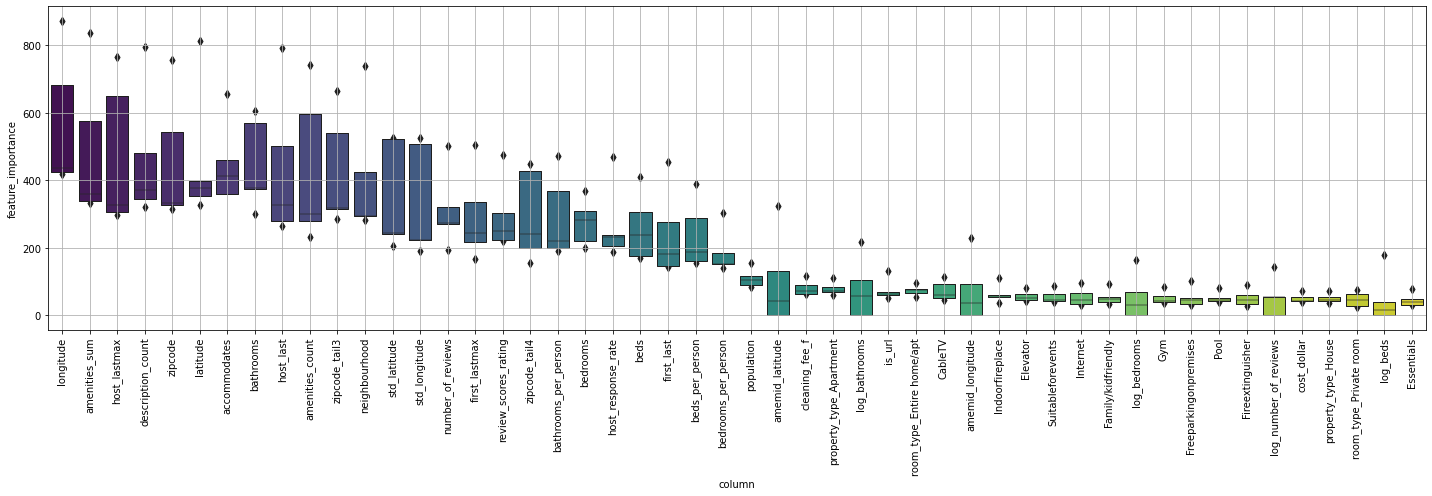

In [58]:
fig, ax = visualize_importance(models_lgbm, x)

## xgboost + nonparam_tuning

In [59]:
def fit_xgb(x, y, cv, params: dict=None, verbose=100):
        
    oofs_xgb = []
    models_xgb = []
    scores_xgb = []
    
    for i, (idx_train, idx_valid) in enumerate(cv): 
        
        # この部分が交差検証のところです。データセットを cv instance によって分割します
        # training data を trian/valid に分割
        x_train, y_train = x[idx_train], y[idx_train]
        x_valid, y_valid = x[idx_valid], y[idx_valid]
        
        oof_pred = np.zeros(len(y_valid), dtype=np.float32)
        
        trains = xgb.DMatrix(x_train, y_train)
        valids = xgb.DMatrix(x_valid, y_valid)
        watchlist = [(trains, 'train'), (valids, 'valid')]

        model = xgb.train(
            params, 
            trains,
            1000,
            watchlist,
            verbose_eval = False,
            early_stopping_rounds = 10
        )
        
        oof_pred = model.predict(valids)
        oof_pred = np.where(oof_pred < 0, 0, oof_pred)
        
        score = np.sqrt(mse(oof_pred, y_valid))
        print('*'*50)
        print('*'*50)
        print('*'*50)
        
        print('rmse:', score)
        
        print('*'*50)
        print('*'*50)
        print('*'*50)
        
        oofs_xgb.append(oof_pred)
        models_xgb.append(model)
        scores_xgb.append(score)
        
    return oofs_xgb, models_xgb, scores_xgb

params = {
    'objective':'reg:linear',
    'metric':'rmse'
}

oofs_xgb, models_xgb, scores_xgb = fit_xgb(
    x.values, 
    y.values,
    cv,
    params
)

[21:44:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:44:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "metric" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


**************************************************
**************************************************
**************************************************
rmse: 106.79273599411454
**************************************************
**************************************************
**************************************************
[21:44:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_

In [60]:
print(scores_xgb)
print(np.mean(scores_xgb))

[106.79273599411454, 104.2399563222463, 104.73909404129823, 106.3785441237012, 113.99146310124092]
107.22835871652023


## random_forest + nonparam_tuning

In [61]:
def fit_rfr(x, y, cv, params: dict=None, verbose=100):
        
    oofs_rfr = []
    models_rfr = []
    scores_rfr = []
    
    for i, (idx_train, idx_valid) in enumerate(cv): 
        
        # この部分が交差検証のところです。データセットを cv instance によって分割します
        # training data を trian/valid に分割
        x_train, y_train = x[idx_train], y[idx_train]
        x_valid, y_valid = x[idx_valid], y[idx_valid]
        
        oof_pred = np.zeros(len(y_valid), dtype=np.float32)
        
        model = rfr()
        model.fit(x_train, y_train)
        
        oof_pred = model.predict(x_valid)
        oof_pred = np.where(oof_pred < 0, 0, oof_pred)
        
        score = np.sqrt(mse(oof_pred, y_valid))
        print('*'*50)
        print('*'*50)
        print('*'*50)
        
        print('rmse:', score)
        
        print('*'*50)
        print('*'*50)
        print('*'*50)
        
        oofs_rfr.append(oof_pred)
        models_rfr.append(model)
        scores_rfr.append(score)
        
    return oofs_rfr, models_rfr, scores_rfr

params = {
    'objective':'reg:linear',
    'metric':'rmse'
}

oofs_rfr, models_rfr, scores_rfr = fit_rfr(
    x.fillna(0).values, 
    y.values,
    cv,
    params
)

**************************************************
**************************************************
**************************************************
rmse: 108.4157062220116
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
rmse: 105.93839989045607
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
rmse: 104.95039522620287
**************************************************
**************************************************
**************************************************
********

In [62]:
print(scores_rfr)
print(np.mean(scores_rfr))

[108.4157062220116, 105.93839989045607, 104.95039522620287, 108.81722844578007, 115.00139195142232]
108.62462434717459


# submit

## make_predict

In [63]:
preprocessed_test.head()

,accommodates,bathrooms,bedrooms,beds,host_response_rate,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,amenities_count,Washer/Dryer,Smokedetector,Firmmatress,Firmmattress,Outletcovers,Dryer,Grab-railsforshowerandtoilet,Iron,Petsliveonthisproperty,Privatelivingroom,Roll-inshowerwithchair,Children’sdinnerware,DoormanEntry,Kitchen,Lakeaccess,Coffeemaker,Bathtowel,Flatsmoothpathwaytofrontdoor,Shampoo,Skiin/Skiout,Flat,Lockbox,Breakfast,Handsoap,Gameconsole,Wideclearancetobed,Otherpet(s),24-hourcheck-in,Fireplaceguards,Widehallwayclearance,Dog(s),Extrapillowsandblankets,Freeparkingonstreet,Firstaidkit,Oven,Babymonitor,smoothpathwaytofrontdoor,Babybath,...,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,instant_bookable_f,instant_bookable_t,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Parking Space,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bathrooms_per_person,bedrooms_per_person,beds_per_person,log_bathrooms,log_bedrooms,log_beds,log_number_of_reviews
55583,6,2.0,2.0,2.0,100,42.359278,-71.069962,42,58,90.0,7,293,0,61726,0,0,0,42710,0,41686,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.333333,0.333333,0.333333,1.098612,1.098612,1.098612,4.077537
55584,3,1.0,1.0,1.0,100,34.084747,-118.367355,582,4,100.0,478,352,0,61726,0,0,0,0,0,41686,0,0,0,0,0,67525,0,0,0,0,49464,0,0,0,0,0,0,0,0,19014,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.333333,0.333333,0.333333,0.693147,0.693147,0.693147,1.609438
55585,2,1.0,0.0,1.0,100,40.720541,-73.959192,605,0,NaN,262,113,0,0,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.500000,0.000000,0.500000,0.693147,0.000000,0.693147,0.000000
55586,4,1.0,1.0,2.0,0,40.681117,-73.944091,44,0,NaN,221,232,0,61726,0,0,0,0,0,41686,9729,0,0,0,0,67525,0,0,0,0,49464,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.250000,0.250000,0.500000,0.693147,0.693147,1.098612,0.000000
55587,3,1.5,1.0,2.0,100,34.150995,-118.409359,619,6,92.0,671,209,0,61726,0,0,0,42710,0,0,0,0,0,0,0,67525,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.500000,0.333333,0.666667,0.916291,0.693147,1.098612,1.945910


In [64]:
y_pred_lgbm = np.array([model.predict(preprocessed_test.values) for model in models_lgbm])
y_pred_lgbm = np.mean(y_pred_lgbm, axis=0)
y_pred_lgbm = np.where(y_pred_lgbm < 0, 0, y_pred_lgbm)

In [65]:
y_pred_lgbm

array([236.12632677, 138.03993893,  99.4704467 , ..., 187.0279012 ,
       125.99218185,  37.83760228])

In [66]:
y_pred_xgb = np.array([model.predict(xgb.DMatrix(preprocessed_test.values)) for model in models_xgb])
y_pred_xgb = np.mean(y_pred_xgb, axis=0)
y_pred_xgb = np.where(y_pred_xgb < 0, 0, y_pred_xgb)

In [67]:
y_pred_xgb

array([224.55057 , 132.04489 ,  93.30972 , ..., 190.27925 , 126.213234,
        43.60778 ], dtype=float32)

In [68]:
y_pred_rfr = np.array([model.predict(preprocessed_test.fillna(0).values) for model in models_rfr])
y_pred_rfr = np.mean(y_pred_rfr, axis=0)
y_pred_rfr = np.where(y_pred_rfr < 0, 0, y_pred_rfr)

In [69]:
y_pred_rfr

array([213.944, 128.92 ,  96.524, ..., 252.662, 135.114,  39.53 ])

In [70]:
y_pred = y_pred_lgbm * 0.5 + y_pred_xgb * 0.3 + y_pred_rfr * 0.2

In [71]:
y_pred

array([228.21713672, 134.41743763,  97.03294137, ..., 201.13012898,
       127.88286264,  39.90713566])

## make_submit

In [72]:
test_submit_df = pd.read_csv(input_path + 'test.csv')
test_submit_df.head()

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode
0,0,6,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",2.0,Real Bed,2.0,2.0,strict,Boston,t,Feel free to book INSTANTLY. You can check-in ...,2017-01-09,t,f,100%,2016-08-23,t,2017-09-25,42.359278,-71.069962,Gorgeous 2BR/2BA Duplex in Beacon Hill,Beacon Hill,58,House,90.0,Entire home/apt,https://a0.muscache.com/im/pictures/7e4808b4-5...,02114
1,1,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,moderate,LA,t,The guest house is close to: Equinox West Holl...,2016-08-17,t,t,100%,2014-09-03,f,2017-05-02,34.084747,-118.367355,Luxury 1 Bedroom West Hollywood City Center,West Hollywood,4,Guesthouse,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/5392fbd6-6...,90046
2,2,2,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",1.0,Real Bed,0.0,1.0,flexible,NYC,f,Private room in a three bedroom apartment in N...,NaN,t,t,100%,2012-10-17,f,NaN,40.720541,-73.959192,Bedroom with Patio in Prime Williamsburg Locat...,Williamsburg,0,Apartment,NaN,Private room,https://a0.muscache.com/im/pictures/544d3b89-d...,11249.0
3,3,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,2.0,strict,NYC,f,The apartment is located in historic Bed Stuy ...,NaN,t,t,NaN,2013-01-23,f,NaN,40.681117,-73.944091,Cozy apartment in Brooklyn,Bedford-Stuyvesant,0,Apartment,NaN,Entire home/apt,https://a0.muscache.com/im/pictures/26baf7ba-0...,11216
4,4,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.5,Real Bed,1.0,2.0,strict,LA,t,"Our cozy, pet friendly one bedroom apartment/l...",2015-08-01,t,t,100%,2014-12-28,f,2016-09-11,34.150995,-118.409359,"Cozy, sunny, pet friendly loft/apt",NaN,6,Loft,92.0,Entire home/apt,https://a0.muscache.com/im/pictures/86107545/9...,91604


In [73]:
result = pd.DataFrame()
result['id'] = test_submit_df['id']
result['y'] = y_pred

In [74]:
result['y'] = result['y'].apply(lambda x:0 if x < 0 else x)

In [75]:
result.head()

,id,y
0,0,228.217137
1,1,134.417438
2,2,97.032941
3,3,147.025097
4,4,137.680952


In [76]:
result.to_csv(output_path + 'sample_submit.csv', index = False, header = False)